## Case Study on Lead Score:

#### 1.Problem Statement:

X Education company sells online courses to industry professionals.Once these people land on the website, they browse the courses or fill up a form for the course or watch some videos.When these people fill up a form providing their email address or phone number,they are classified to be a lead. Moreover, the company also gets leads through past referrals.Employees from the sales team start making calls, writing emails, etc.Through this process, some of the leads get converted while most do not.The typical lead conversion rate at X education is around 30%. "X Education gets a lot of leads, its lead conversion rate is very poor." select the most promising leads, i.e. the leads that are most likely to convert into paying customers.

#### 2. Import Libraries:

In [256]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [257]:
import warnings 
warnings.filterwarnings("ignore")

In [258]:
pd.set_option("display.max_columns",100)

In [259]:
df = pd.read_csv("Leads.csv")
df.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

#### 3.Data check:

In [260]:
df.shape

(9240, 37)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [262]:
df.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [263]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

1. Lead dataset has 37 columns and 9240 rows
2. Some variables have having null values also.

In [264]:
# null value percantage:
round((df.isnull().sum()/df.shape[0])*100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

variables "Tags", "Lead Quality","Asymmetrique Activity Index","Asymmetrique Profile Index","Asymmetrique Activity Score","Asymmetrique Profile Score" have null values more than 30%

#### 4.Data Preparation for EDA:

In [265]:
# Finding features containing null values: 
null_features = [feature for feature in df.columns if df[feature].isnull().sum() >1]
null_features

['Lead Source',
 'TotalVisits',
 'Page Views Per Visit',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [266]:
round((df[null_features].isnull().sum()/len(df))*100,2)

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64

1.'Lead Source','TotalVisits','Page Views Per Visit','Last Activity' have very less null value.
2.'Country','Specialization','How did you hear about X Education','What is your current occupation','What matters most to you in choosing a course','Tags','Lead Quality','Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score' are having null values with high percentage.

##### 4.1 Missing Values Treatment:

In [267]:
# Dropping rows Lead Source, Total Visits, Page views per visit, Last Activity containing null values:
df = df.dropna(subset=["Lead Source", "TotalVisits", "Page Views Per Visit", "Last Activity"], how="any")

In [268]:
df.shape

(9074, 37)

In [269]:
# Created New level Missing for na values:
df["Country"] = df["Country"].fillna("Missing")

In [270]:
df["Specialization"] = df["Specialization"].fillna("missing")

In [271]:
df = df.drop(["Asymmetrique Activity Index", "Asymmetrique Profile Index", 
              "Asymmetrique Activity Score", "Asymmetrique Profile Score"], axis=1)

In [272]:
df = df.drop("Lead Quality", axis=1)

In [273]:
df = df.drop("Tags", axis=1)

In [274]:
df["How did you hear about X Education"] = df["How did you hear about X Education"].fillna("missing")

In [275]:
df["What is your current occupation"] = df["What is your current occupation"].fillna("missing")

In [276]:
df["What matters most to you in choosing a course"] = df["What matters most to you in choosing a course"].fillna("missing")

In [277]:
df["City"] = df["City"].fillna("missing")

In [278]:
df["Lead Profile"] = df["Lead Profile"].fillna("missing")

In [279]:
round((df.isnull().sum()/df.shape[0])*100,2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

In [280]:
# Dropping Prospect ID, Lead Number:
df = df.drop(["Prospect ID","Lead Number"] ,axis=1)

<p style="color:blue"><b>Process :</b> 1."Lead Source", "TotalVisits", "Page Views Per Visit", "Last Activity" is having less number of null values so drop that columns<br>2. all the missing values in categorical variables imputed with MISSING<br>3.Droping non targeted variables "Prospect ID","Lead Number".

In [281]:
df["Lead Source"].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'google', 'Welingak Website',
       'Facebook', 'blog', 'Pay per Click Ads', 'bing', 'Social Media',
       'WeLearn', 'Click2call', 'Live Chat', 'welearnblog_Home',
       'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'],
      dtype=object)

<p style="color:blue"><b>Process :</b> As we can see "lead source" has two values "Google","google" which mean same so we need to clean unique value with same name "Google"

In [282]:
df["Lead Source"]=df["Lead Source"].replace({'google':'Google'})

In [283]:
df["Lead Source"].unique()

array(['Olark Chat', 'Organic Search', 'Direct Traffic', 'Google',
       'Referral Sites', 'Reference', 'Welingak Website', 'Facebook',
       'blog', 'Pay per Click Ads', 'bing', 'Social Media', 'WeLearn',
       'Click2call', 'Live Chat', 'welearnblog_Home', 'youtubechannel',
       'testone', 'Press_Release', 'NC_EDM'], dtype=object)

##### 4.2 Ouliers Treatment:

In [284]:
df.describe(percentiles=[0.25,0.5,0.75,0.8,0.9,0.95,0.98,0.99])

Converted  TotalVisits  Total Time Spent on Website  \
count  9074.000000  9074.000000                  9074.000000   
mean      0.378554     3.456028                   482.887481   
std       0.485053     4.858802                   545.256560   
min       0.000000     0.000000                     0.000000   
25%       0.000000     1.000000                    11.000000   
50%       0.000000     3.000000                   246.000000   
75%       1.000000     5.000000                   922.750000   
80%       1.000000     5.000000                  1078.400000   
90%       1.000000     7.000000                  1373.000000   
95%       1.000000    10.000000                  1557.000000   
98%       1.000000    13.000000                  1727.080000   
99%       1.000000    17.000000                  1839.000000   
max       1.000000   251.000000                  2272.000000   

       Page Views Per Visit  
count           9074.000000  
mean               2.370151  
std                2.160871  
min                0.000000  
25%                1.000000  
50%                2.000000  
75%                3.200000  
80%                4.000000  
90%                5.000000  
95%                6.000000  
98%                8.000000  
99%                9.000000  
max               55.000000

<AxesSubplot:xlabel='TotalVisits'>

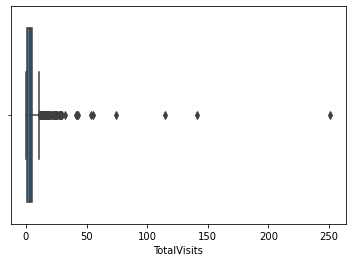

In [285]:
sns.boxplot(df["TotalVisits"])

In [286]:
#Dropping records that are above 40 in Total visits feature:
df = df[df["TotalVisits"]<40]

<AxesSubplot:xlabel='TotalVisits'>

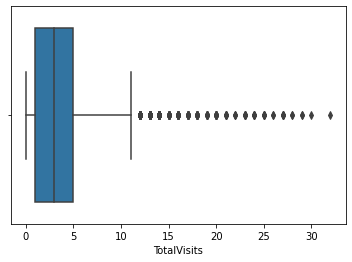

In [287]:
sns.boxplot(df["TotalVisits"])

In [288]:
df.shape

(9065, 29)

<AxesSubplot:xlabel='Total Time Spent on Website'>

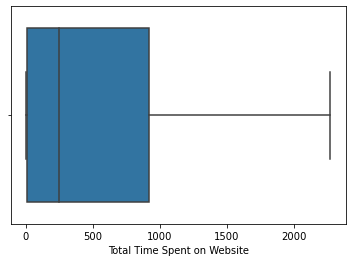

In [289]:
sns.boxplot(df["Total Time Spent on Website"])

<AxesSubplot:xlabel='Page Views Per Visit'>

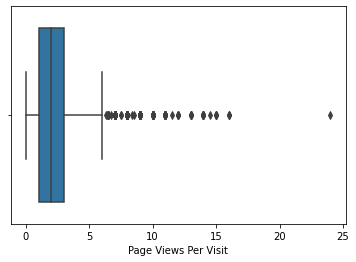

In [290]:
sns.boxplot(df["Page Views Per Visit"])

In [291]:
df.shape

(9065, 29)

In [292]:
#Dropping records that are above 10 in Page Views per visit:
df = df[df["Page Views Per Visit"]<10]

In [293]:
df.shape

(8992, 29)

<AxesSubplot:xlabel='Page Views Per Visit'>

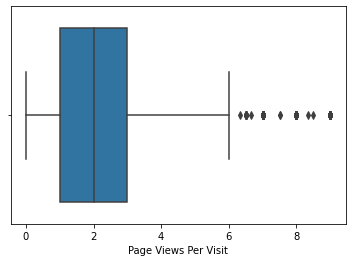

In [294]:
sns.boxplot(df["Page Views Per Visit"])

In [295]:
# Capping / Flooring:
Q1 = df["TotalVisits"].describe().loc["25%"]
Q3 = df["TotalVisits"].describe().loc["75%"]
IQR = Q3- Q1
upper = Q3 + 1.5 *IQR
lower = Q1 - 1.5 *IQR
df["TotalVisits"] = np.where(df["TotalVisits"] > upper, upper,df["TotalVisits"] )
df["TotalVisits"] = np.where(df["TotalVisits"] < lower, lower,df["TotalVisits"] )

In [296]:
# Capping / Flooring:
Q1 = df["Page Views Per Visit"].describe().loc["25%"]
Q3 = df["Page Views Per Visit"].describe().loc["75%"]
IQR = Q3- Q1
upper = Q3 + 1.5 *IQR
lower = Q1 - 1.5 *IQR
df["Page Views Per Visit"] = np.where(df["Page Views Per Visit"] > upper, upper,df["Page Views Per Visit"] )
df["Page Views Per Visit"] = np.where(df["Page Views Per Visit"] < lower, lower,df["Page Views Per Visit"] )

<p style="color:blue"></b>1. check outliers on continous data ('Total visits','Total time spent on website','page views per visit')<br>2.as we can see in graphs "Page Views Per Visit","TotalVisits" having outliers. <br> after dropping outliers more than 40 in "TotalVisits" and Capping and Flooring done Accordingly <br>3. After dropping outliers more than 10 in "Page Views Per Visit" and Capping and Flooring done Accordingly.
    

#### 5. Exploratory Data Analysis:

##### 5.1 Univariate Analysis:

In [297]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300


In [298]:
df

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                         API      Olark Chat           No          No   
1                         API  Organic Search           No          No   
2     Landing Page Submission  Direct Traffic           No          No   
3     Landing Page Submission  Direct Traffic           No          No   
4     Landing Page Submission          Google           No          No   
...                       ...             ...          ...         ...   
9235  Landing Page Submission  Direct Traffic          Yes          No   
9236  Landing Page Submission  Direct Traffic           No          No   
9237  Landing Page Submission  Direct Traffic          Yes          No   
9238  Landing Page Submission          Google           No          No   
9239  Landing Page Submission  Direct Traffic           No          No   

      Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit            Last Activity       Country  \
0                     0.00  Page Visited on Website       Missing   
1                     2.50             Email Opened         India   
2                     2.00             Email Opened         India   
3                     1.00              Unreachable         India   
4                     1.00        Converted to Lead         India   
...                    ...                      ...           ...   
9235                  2.67        Email Marked Spam  Saudi Arabia   
9236                  2.00                 SMS Sent         India   
9237                  2.00                 SMS Sent         India   
9238                  3.00                 SMS Sent         India   
9239                  3.00                 SMS Sent    Bangladesh   

                 Specialization How did you hear about X Education  \
0                        Select                             Select   
1                        Select                             Select   
2       Business Administration                             Select   
3         Media and Advertising                      Word Of Mouth   
4                        Select                              Other   
...                         ...                                ...   
9235     IT Projects Management                             Select   
9236      Media and Advertising                             Select   
9237    Business Administration                             Select   
9238  Human Resource Management                      Online Search   
9239    Supply Chain Management                             Select   

     What is your current occupation  \
0                         Unemployed   
1                         Unemployed   
2                            Student   
3                         Unemployed   
4                         Unemployed   
...                              ...   
9235                      Unemployed   
9236                      Unemployed   
9237                      Unemployed   
9238                         missing   
9239                      Unemployed   

     What matters most to you in choosing a course Search Magazine  \
0                          Better Career Prospects     No       No   
1                          Better Career Prospects     No       No   
2                          Better C

<AxesSubplot:xlabel='How did you hear about X Education', ylabel='count'>

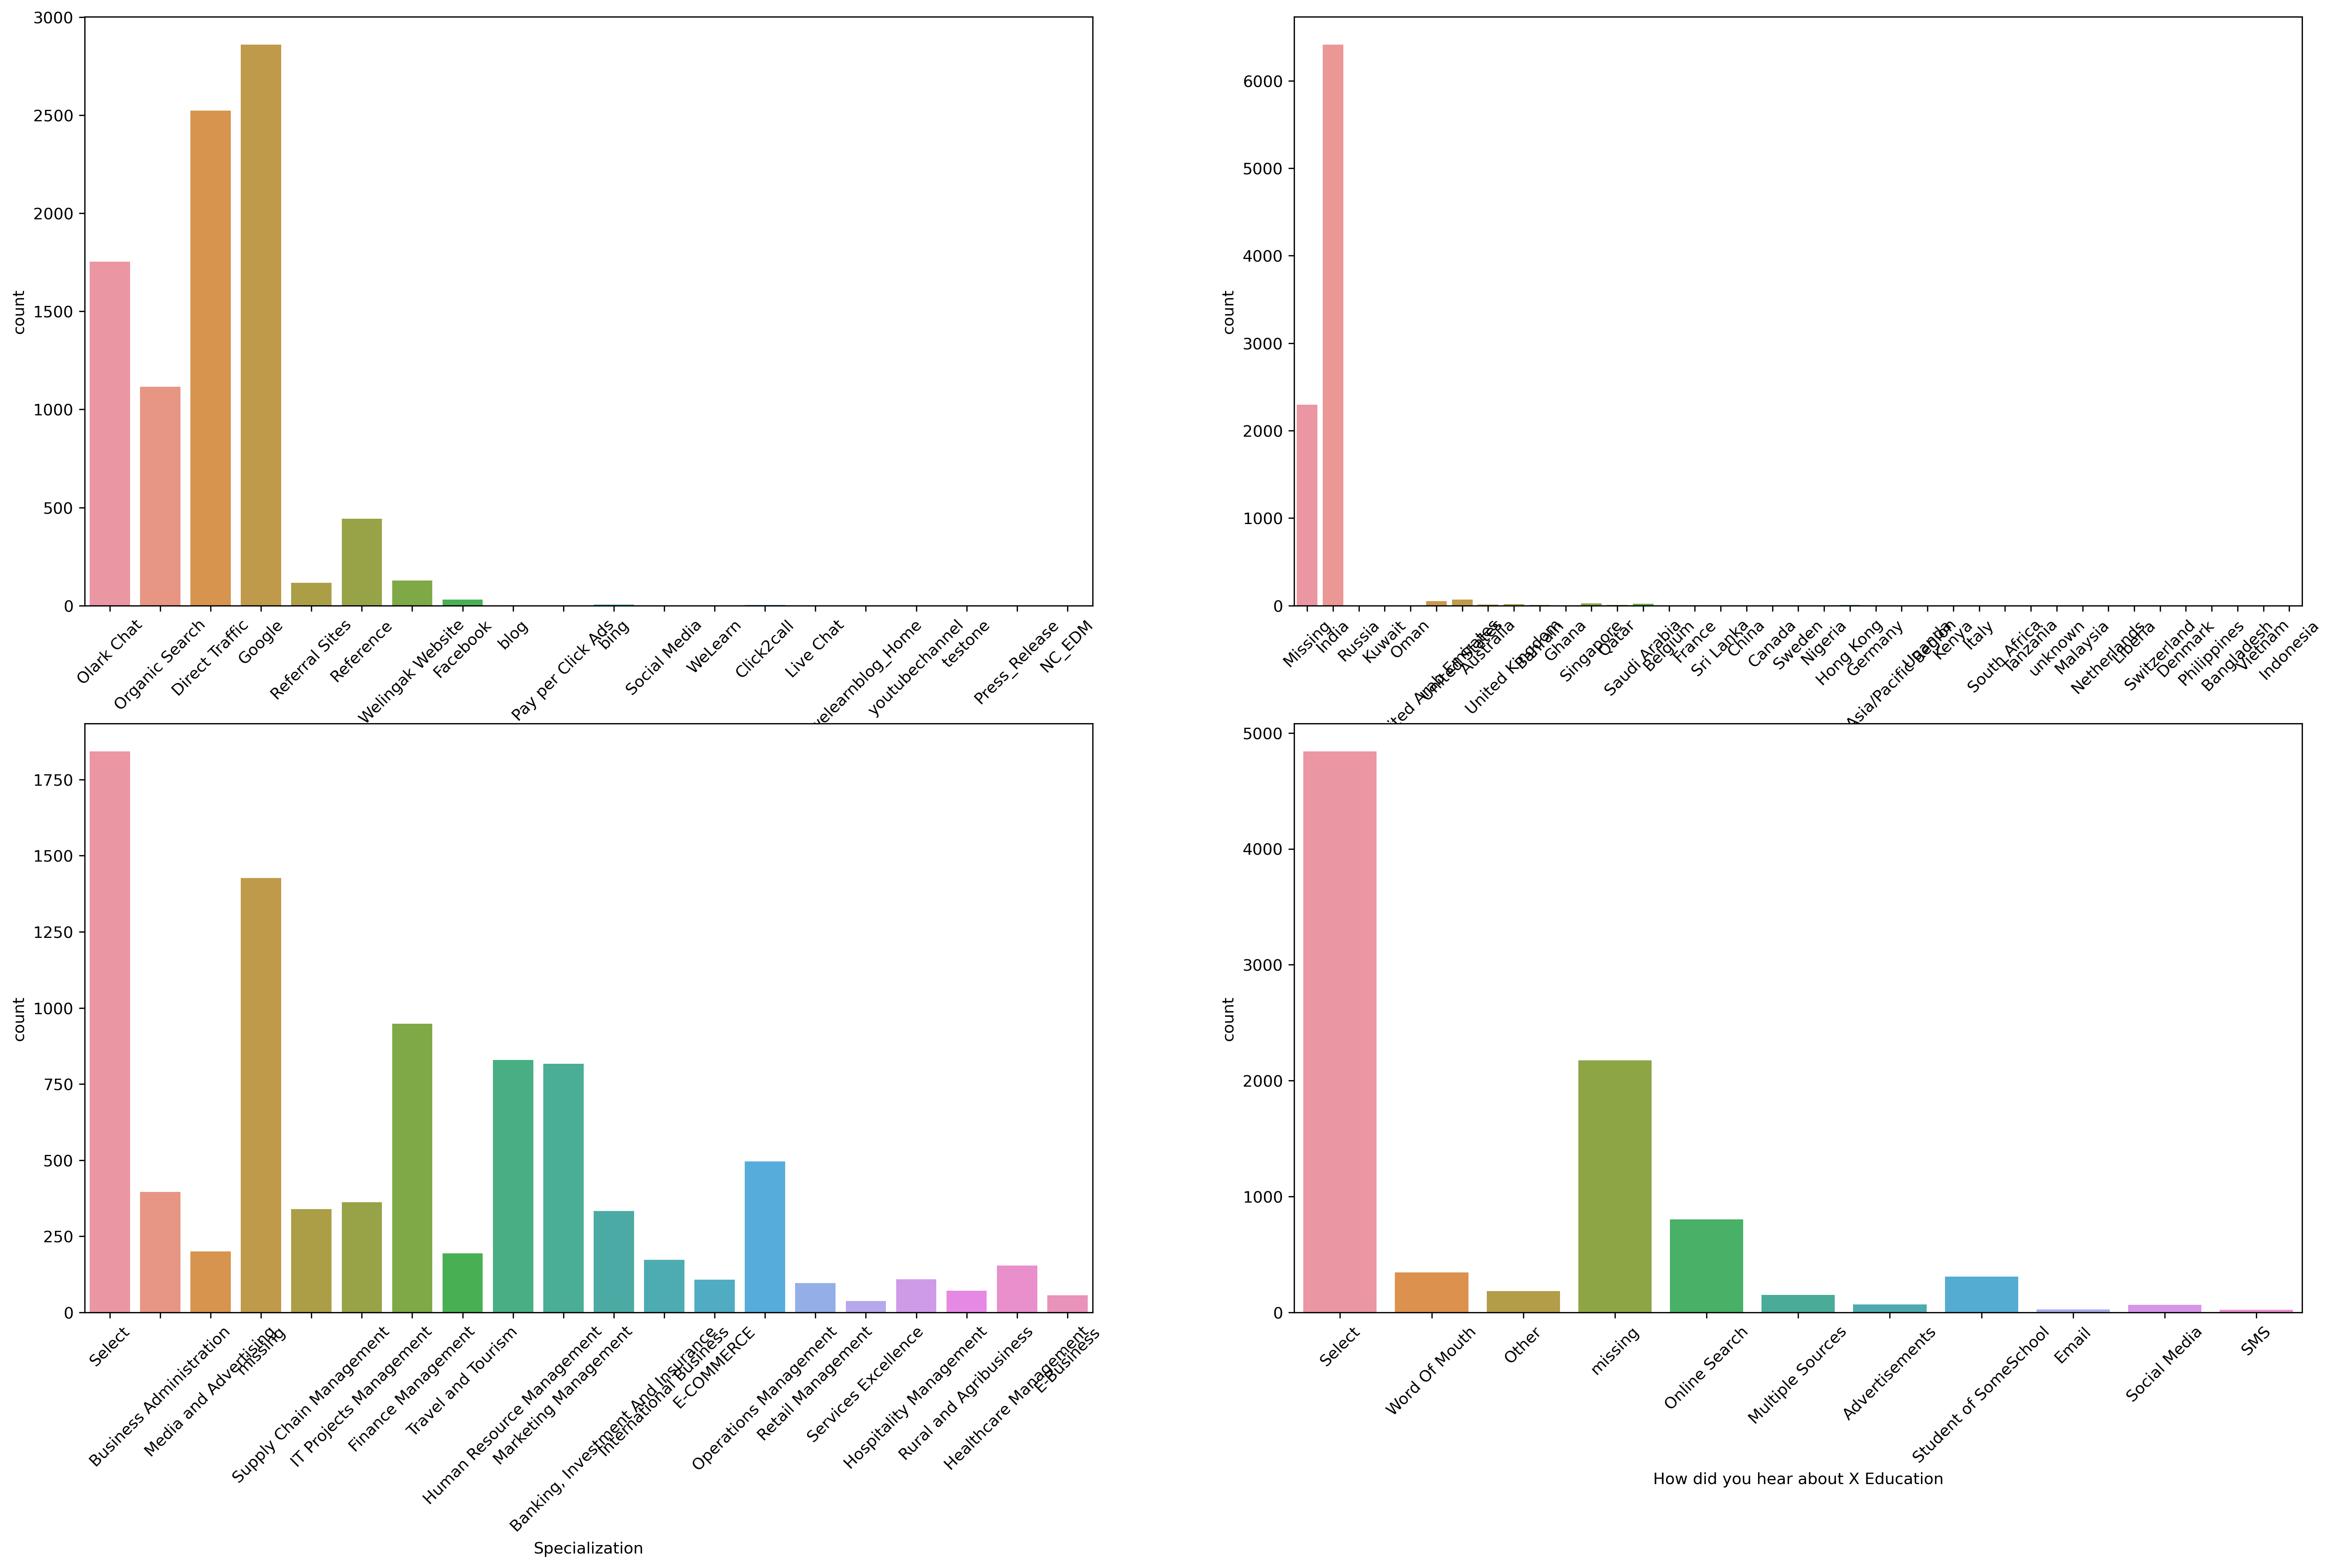

In [299]:
# Univariate Analysis:
plt.figure(figsize=(25,15))

plt.subplot(2,2,1)
plt.xticks(rotation = 45)
sns.countplot(df["Lead Source"])

plt.subplot(2,2,2)
plt.xticks(rotation = 45)
sns.countplot(df["Country"])

plt.subplot(2,2,3)
plt.xticks(rotation = 45)
sns.countplot(df["Specialization"])

plt.subplot(2,2,4)
plt.xticks(rotation = 45)
sns.countplot(df["How did you hear about X Education"])

<p style="color:blue"><b>Insight :</b>1.Lead Source graph we can observe "Google","direct traffic","Organic search","olark chat" having high value count <br>2.In Country graph most of the customer is from INDIA.<br>

<AxesSubplot:xlabel='City', ylabel='count'>

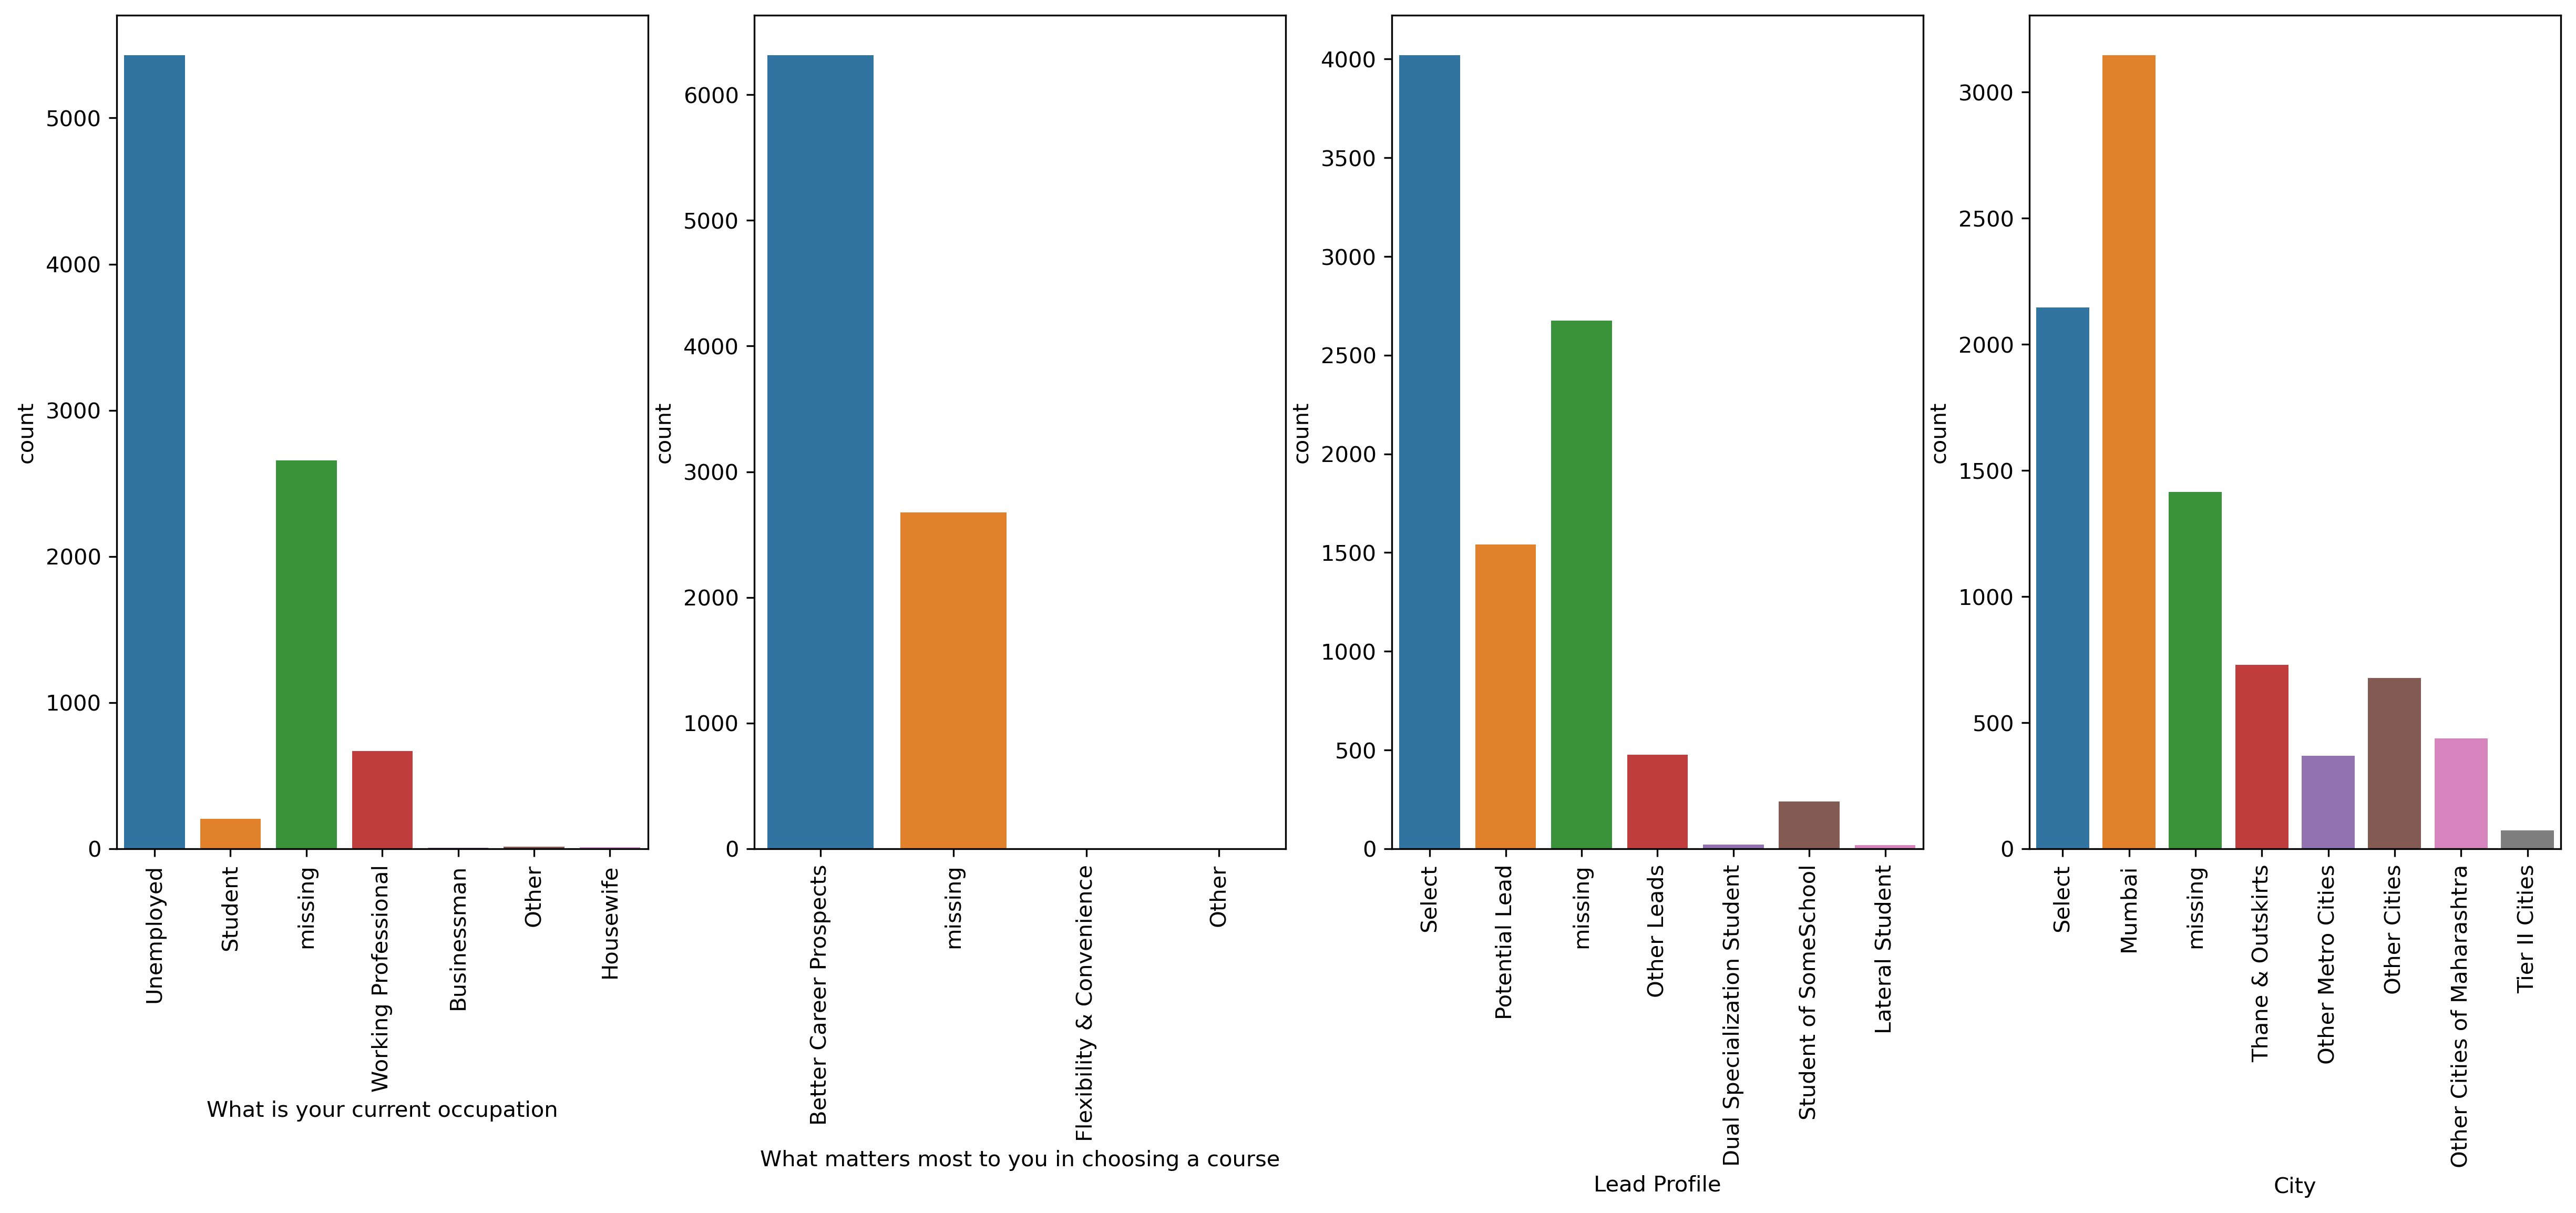

In [300]:
# Univariate Analysis:
plt.figure(figsize=(20,7))

plt.subplot(1,4,1)
plt.xticks(rotation = 90)
sns.countplot(df["What is your current occupation"])
              
plt.subplot(1,4,2)
plt.xticks(rotation = 90)
sns.countplot(df["What matters most to you in choosing a course"])

plt.subplot(1,4,3)
plt.xticks(rotation = 90)
sns.countplot(df["Lead Profile"])

plt.subplot(1,4,4)
plt.xticks(rotation = 90)
sns.countplot(df["City"])

<p style="color:blue"><b>insight:1.Most of the customers are unemployed.<br>2.most of the customer choose course for "Better Career Prospects"<br>3.Most of the customer are from "Mumbai"

<AxesSubplot:xlabel='Page Views Per Visit'>

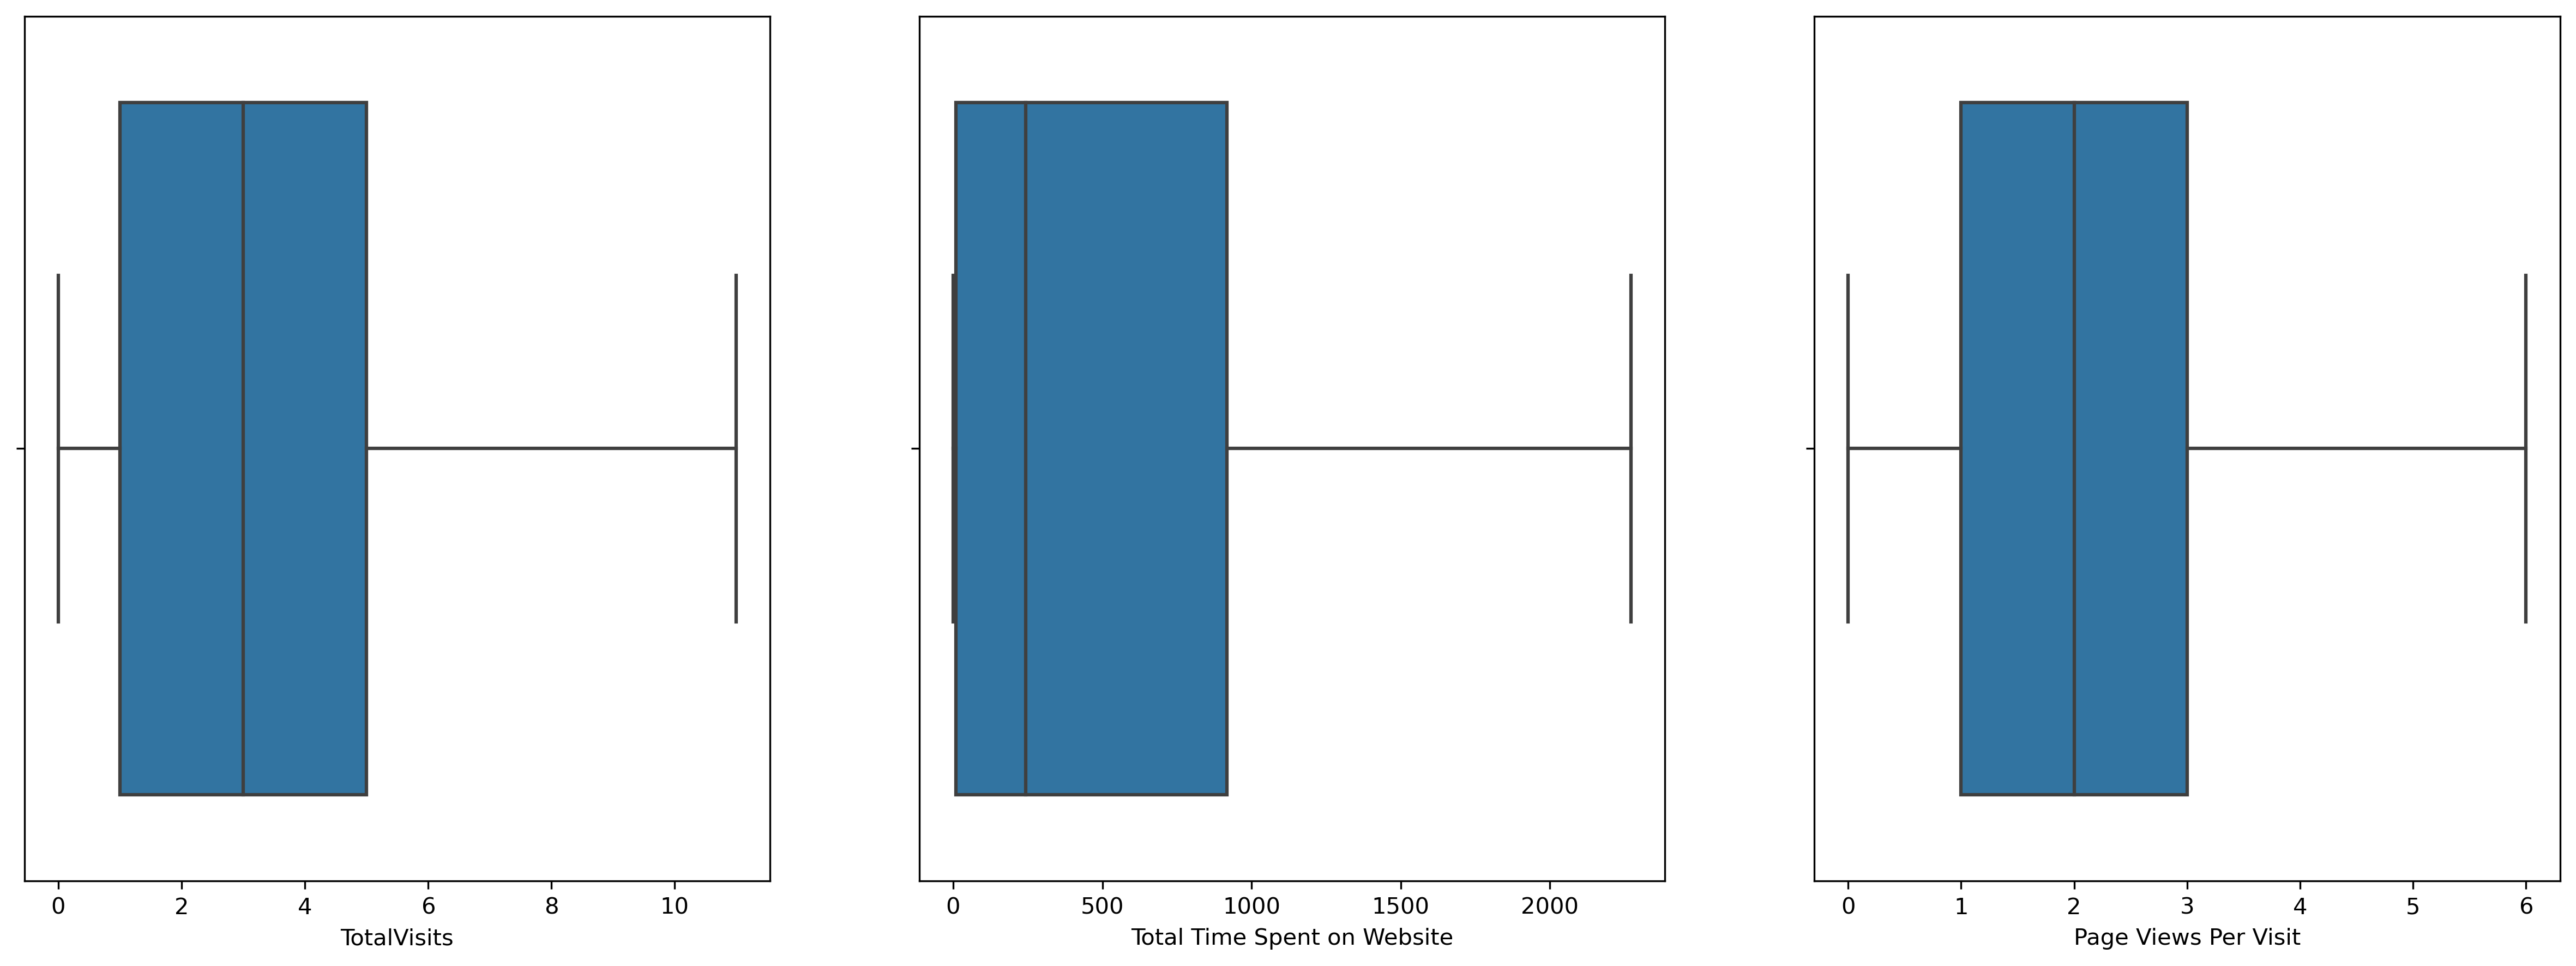

In [301]:
# Univariate Analysis on Continous features:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.boxplot(df["TotalVisits"])
plt.subplot(1,3,2)
sns.boxplot(df["Total Time Spent on Website"])
plt.subplot(1,3,3)
sns.boxplot(df["Page Views Per Visit"])

<AxesSubplot:xlabel='Page Views Per Visit', ylabel='Density'>

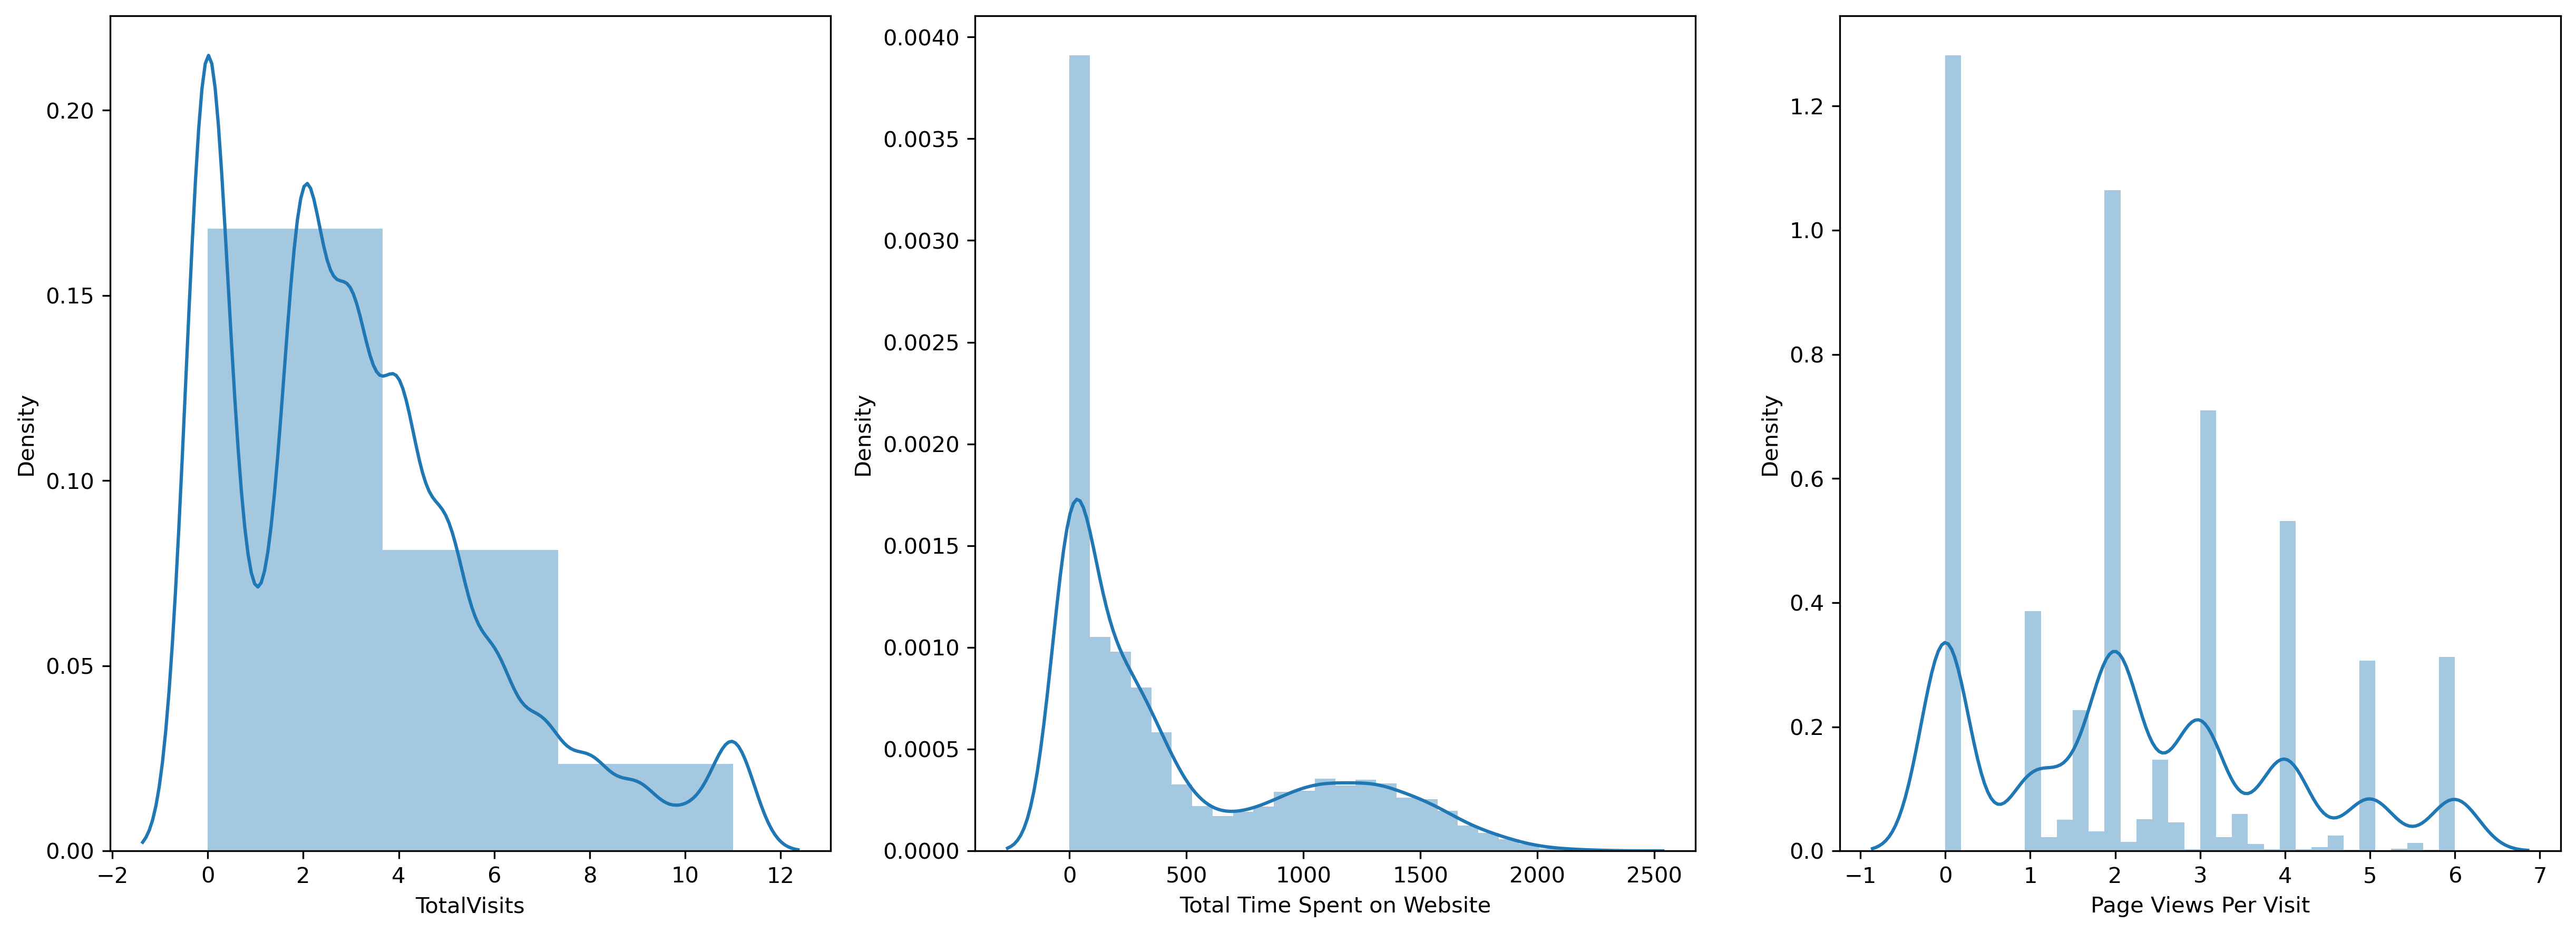

In [302]:
# univariate Analysis on Continous features:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.distplot(df["TotalVisits"], bins=3)

plt.subplot(1,3,2)
sns.distplot(df["Total Time Spent on Website"])

plt.subplot(1,3,3)
sns.distplot(df["Page Views Per Visit"])



 Total Visits and Page Views per Visit are distributed unevenly having peak at 0 where as Total time Spent on Website following Right skew distribution i.e. Positive Skewness


In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8992 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8992 non-null   object 
 1   Lead Source                                    8992 non-null   object 
 2   Do Not Email                                   8992 non-null   object 
 3   Do Not Call                                    8992 non-null   object 
 4   Converted                                      8992 non-null   int64  
 5   TotalVisits                                    8992 non-null   float64
 6   Total Time Spent on Website                    8992 non-null   int64  
 7   Page Views Per Visit                           8992 non-null   float64
 8   Last Activity                                  8992 non-null   object 
 9   Country                                        8992 

<AxesSubplot:xlabel='Last Notable Activity', ylabel='count'>

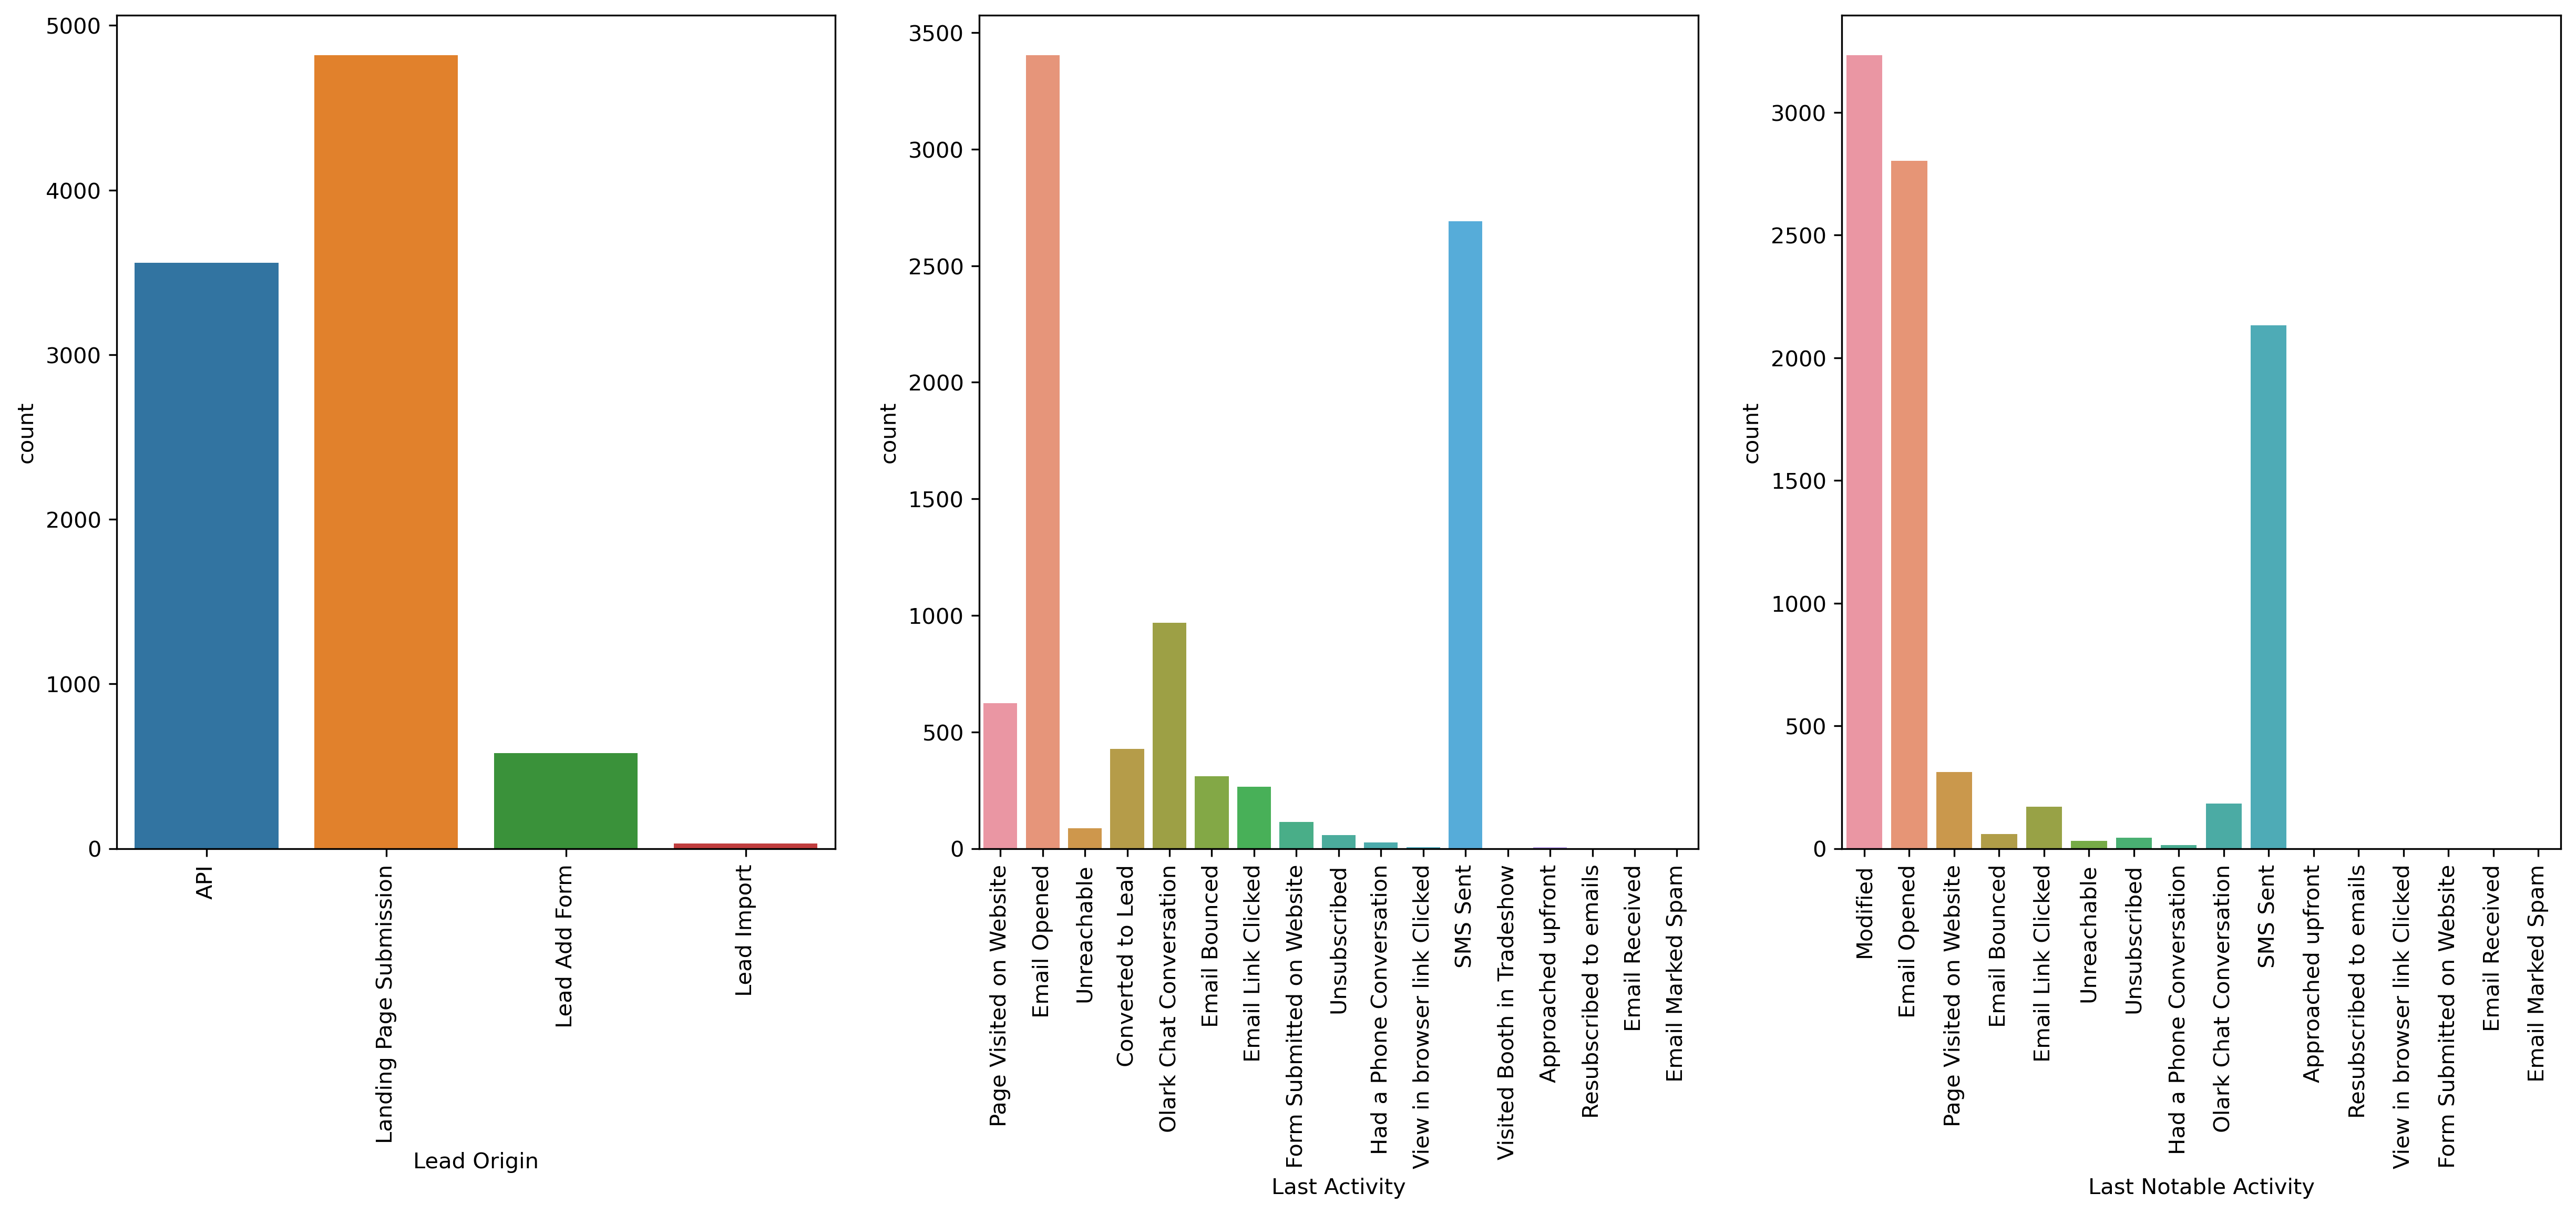

In [304]:
plt.figure(figsize=(20,7))

plt.subplot(1,3,1)
plt.xticks(rotation = 90)
sns.countplot(df["Lead Origin"])

plt.subplot(1,3,2)
plt.xticks(rotation = 90)
sns.countplot(df["Last Activity"])

plt.subplot(1,3,3)
plt.xticks(rotation = 90)
sns.countplot(df["Last Notable Activity"])

<AxesSubplot:xlabel='A free copy of Mastering The Interview', ylabel='count'>

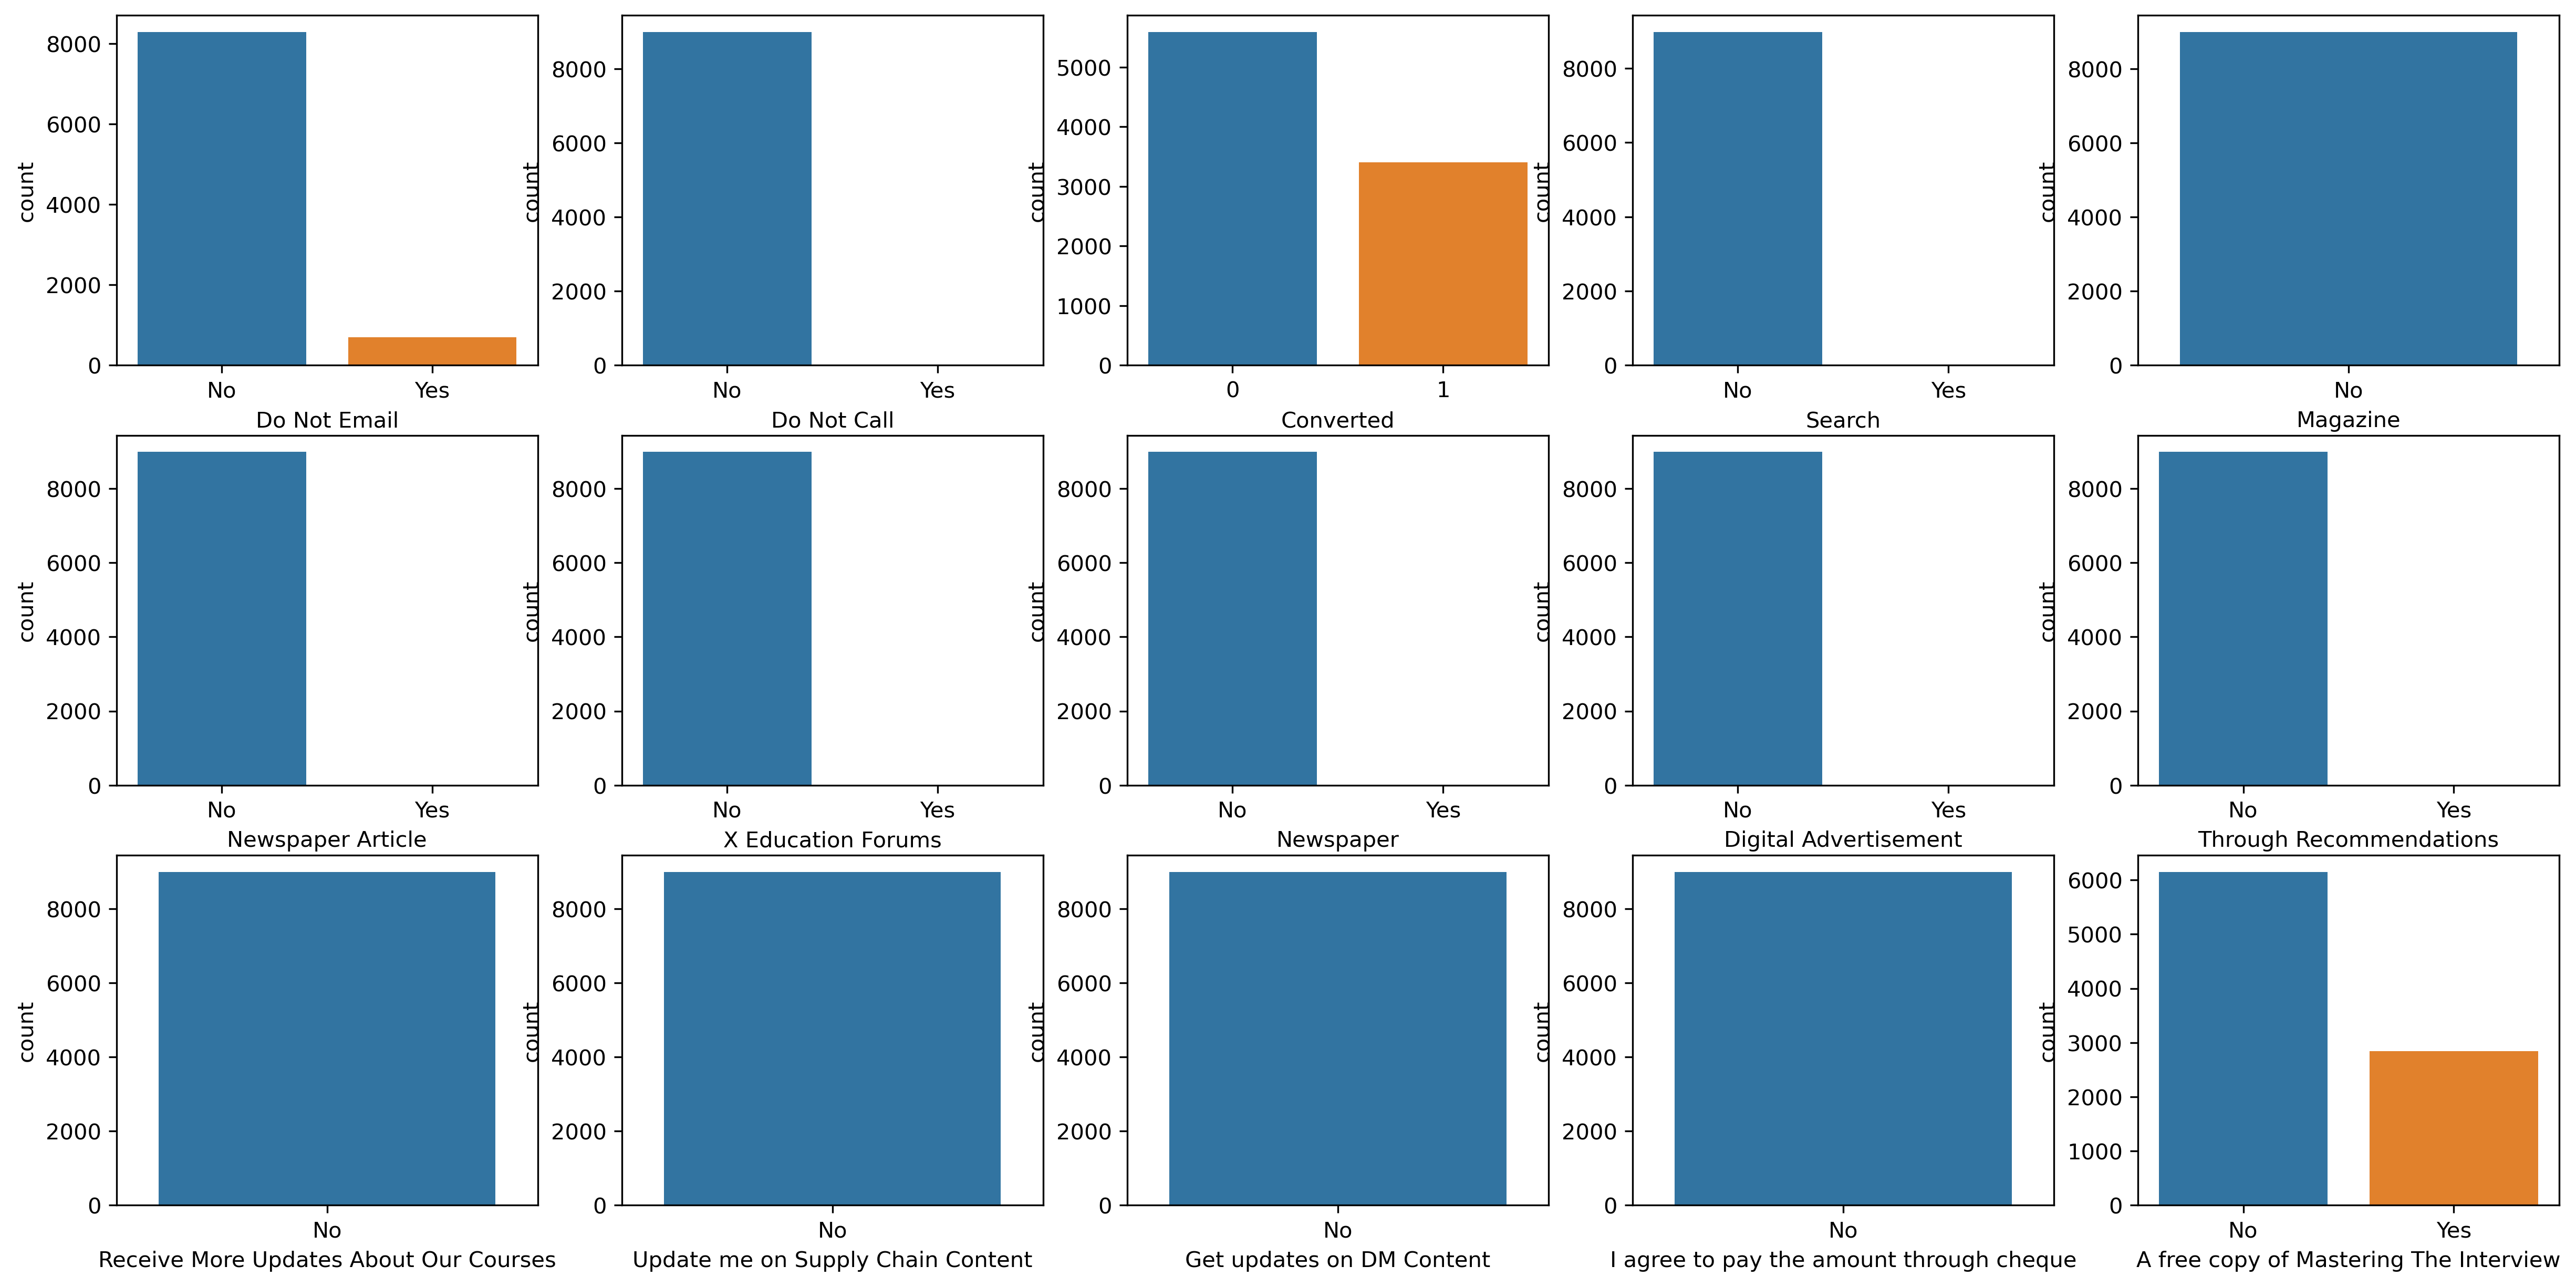

In [305]:
plt.figure(figsize=(20,10))
plt.subplot(3,5,1)
sns.countplot(df["Do Not Email"])
plt.subplot(3,5,2)
sns.countplot(df["Do Not Call"])
plt.subplot(3,5,3)
sns.countplot(df["Converted"])
plt.subplot(3,5,4)
sns.countplot(df["Search"])
plt.subplot(3,5,5)
sns.countplot(df["Magazine"])
plt.subplot(3,5,6)
sns.countplot(df["Newspaper Article"])
plt.subplot(3,5,7)
sns.countplot(df["X Education Forums"])
plt.subplot(3,5,8)
sns.countplot(df["Newspaper"])
plt.subplot(3,5,9)
sns.countplot(df["Digital Advertisement"])
plt.subplot(3,5,10)
sns.countplot(df["Through Recommendations"])
plt.subplot(3,5,11)
sns.countplot(df["Receive More Updates About Our Courses"])
plt.subplot(3,5,12)
sns.countplot(df["Update me on Supply Chain Content"])
plt.subplot(3,5,13)
sns.countplot(df["Get updates on DM Content"])
plt.subplot(3,5,14)
sns.countplot(df["I agree to pay the amount through cheque"])
plt.subplot(3,5,15)
sns.countplot(df["A free copy of Mastering The Interview"])


In [306]:
# dropping unnecessary columns:
df = df.drop("Magazine", axis=1)
df = df.drop("Receive More Updates About Our Courses",axis=1)
df = df.drop("Update me on Supply Chain Content", axis=1)
df = df.drop("Get updates on DM Content", axis=1)
df = df.drop("I agree to pay the amount through cheque", axis=1)


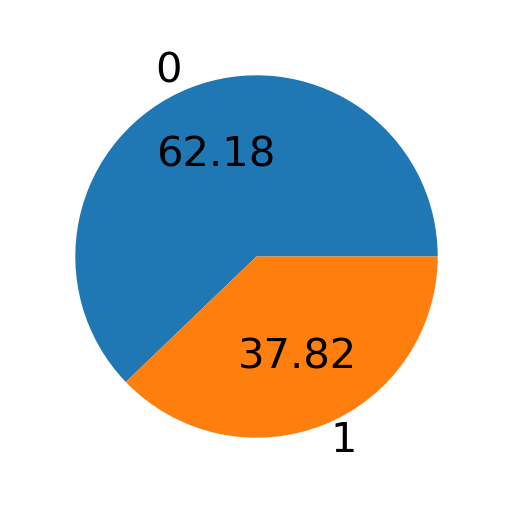

In [307]:
plt.figure(figsize=(2,2))
plt.pie(df["Converted"].value_counts().values, labels=df["Converted"].value_counts().index, autopct="%.2f")
plt.show()

<p style="color:blue"><b>Insights:</b>37.82% converted in customer only

In [308]:
df["Converted"].value_counts()

0    5591
1    3401
Name: Converted, dtype: int64

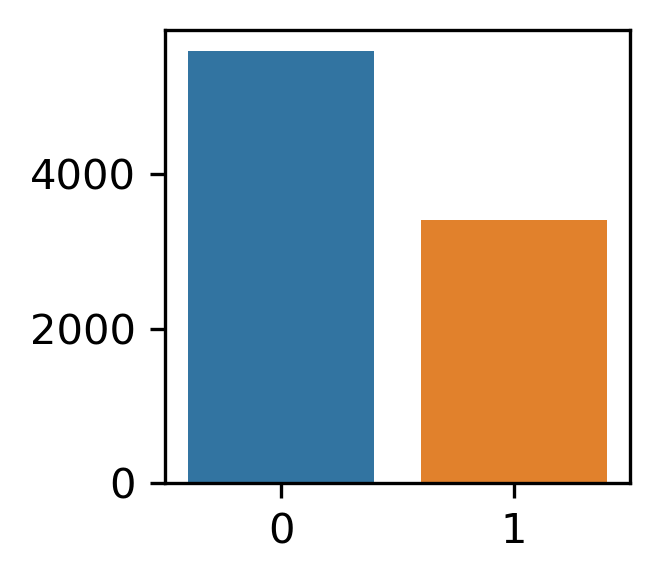

In [309]:
plt.figure(figsize=(2,2))
sns.barplot(x=df["Converted"].value_counts().index, y=df["Converted"].value_counts().values)
plt.show()

#### 5.2 Bi-Variate Analysis:

<Figure size 2100x900 with 0 Axes>

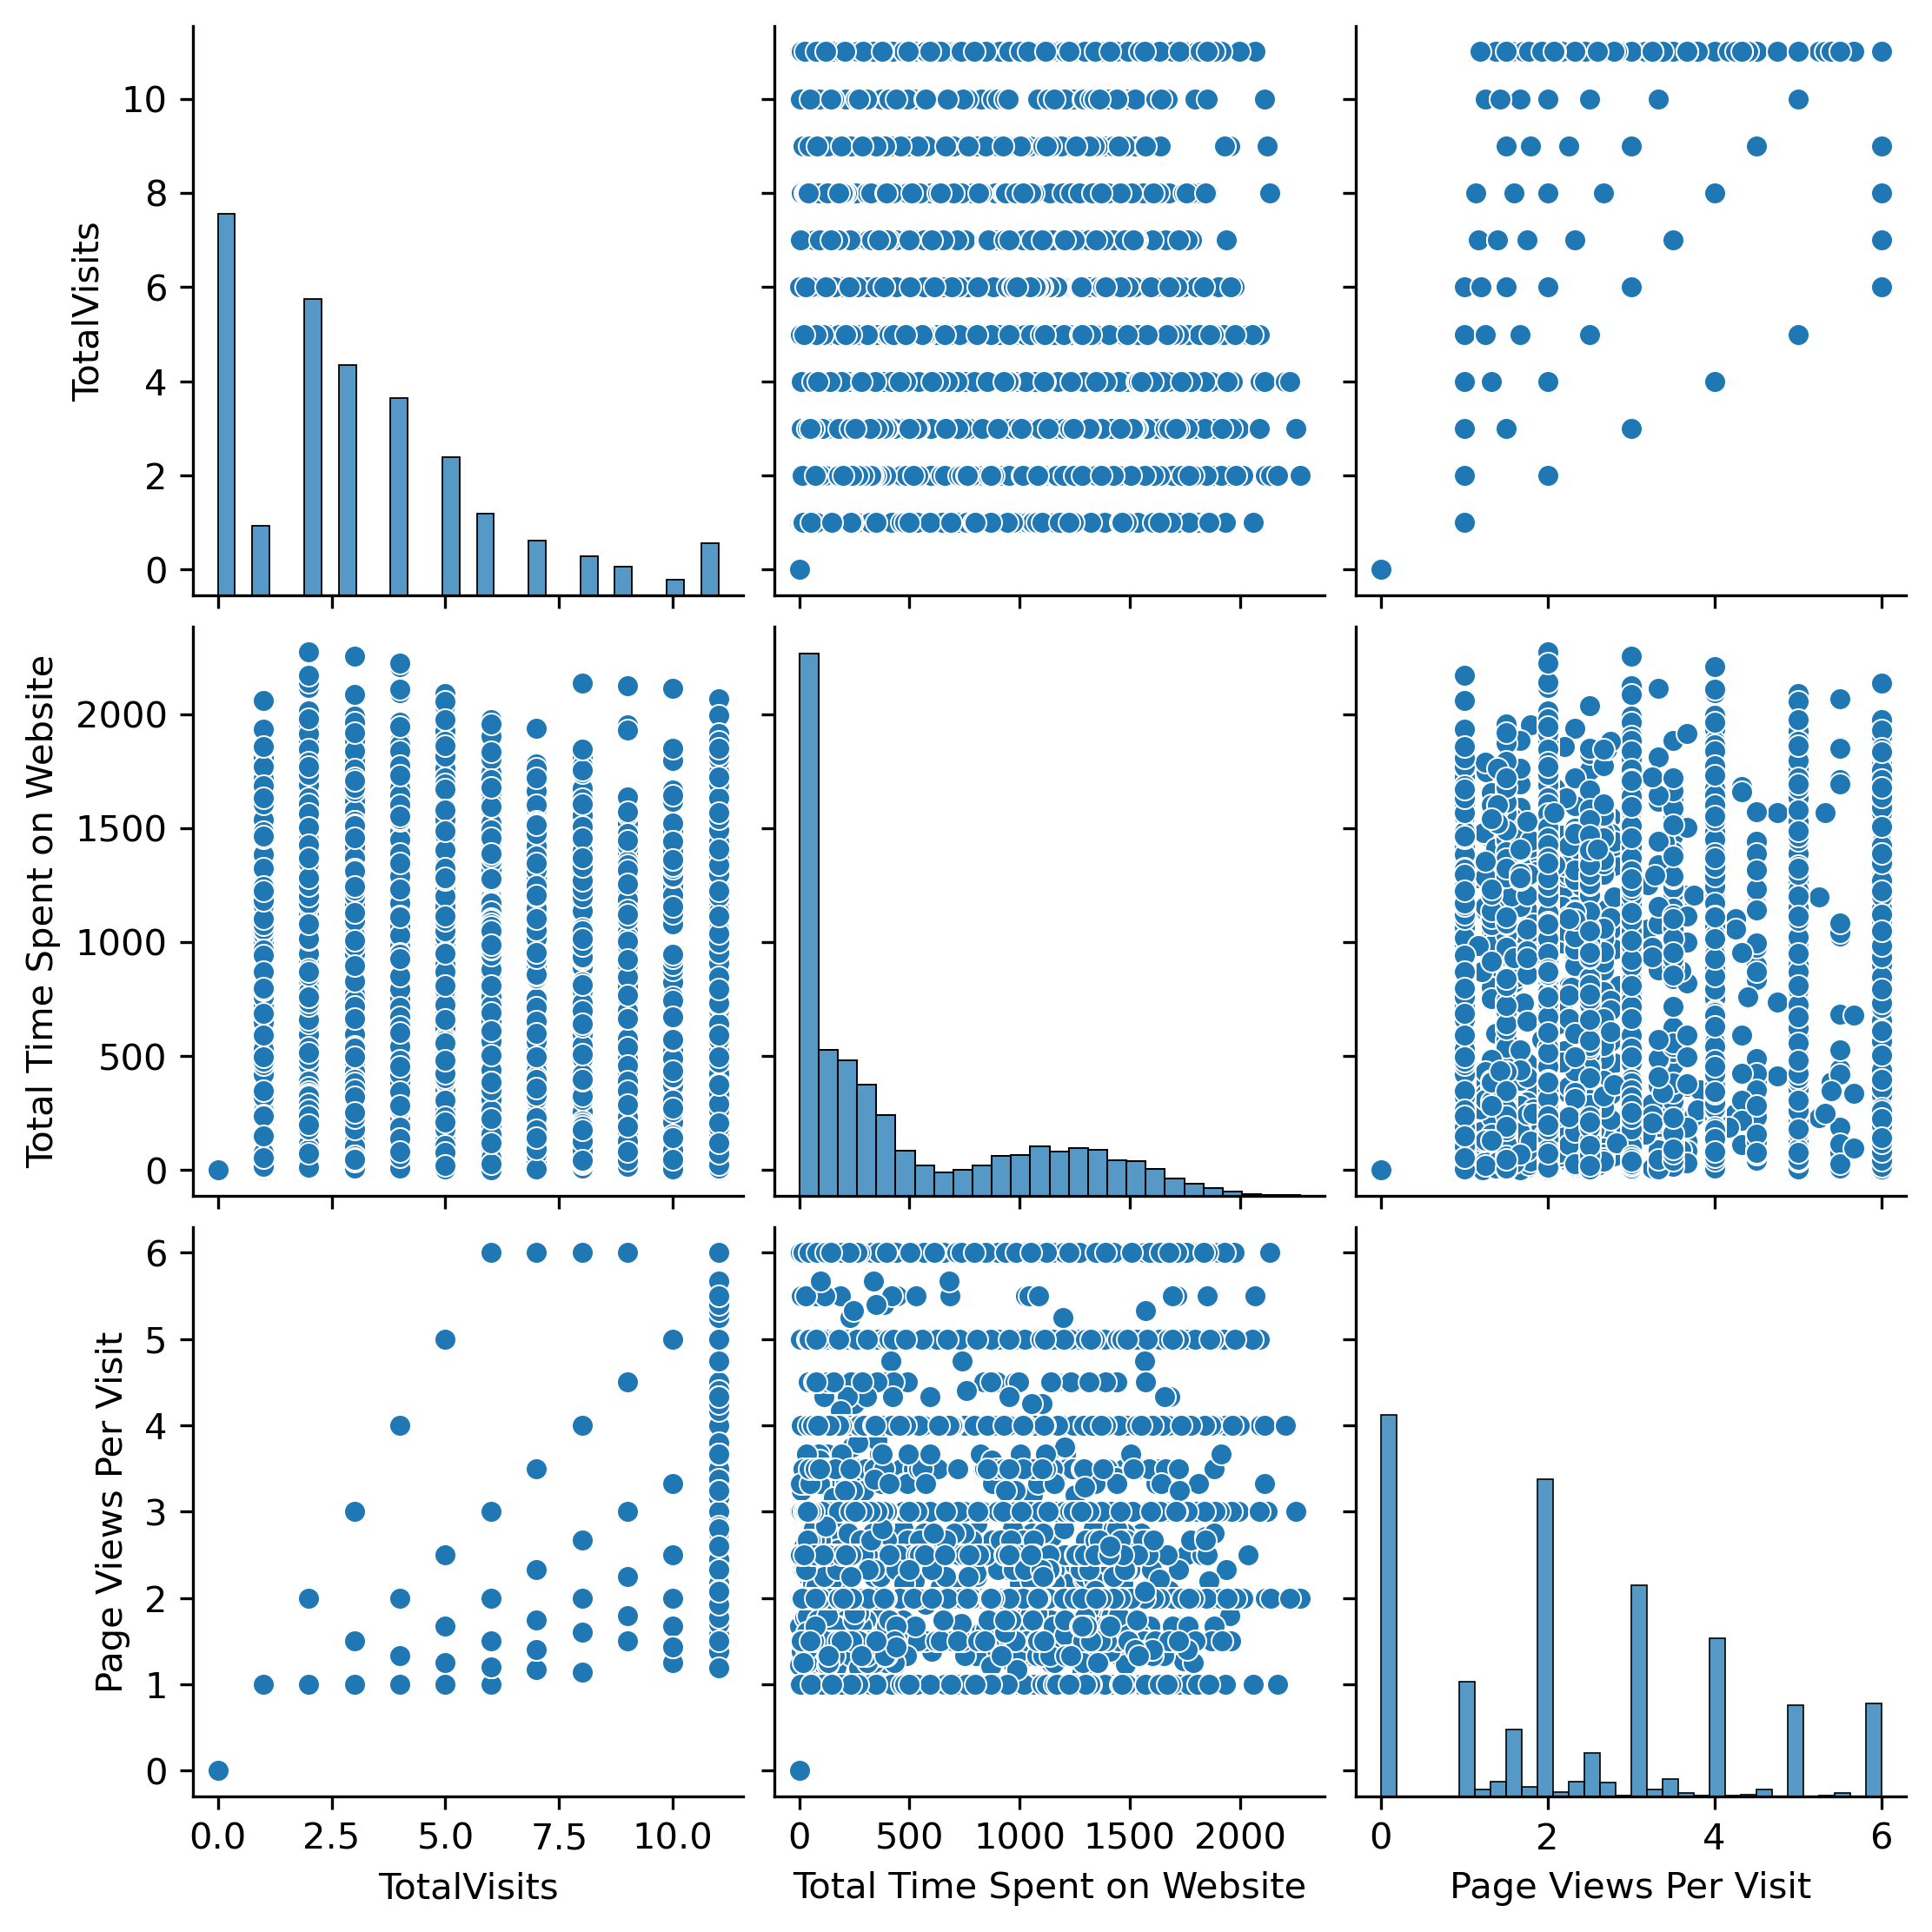

In [310]:
num_vars = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]
plt.figure(figsize=(7,3))
sns.pairplot(df[num_vars])

###### It is Observed that Page Views per Visit and Total Visits are Directly proportional to each other upto 10 Total Visits

<AxesSubplot:>

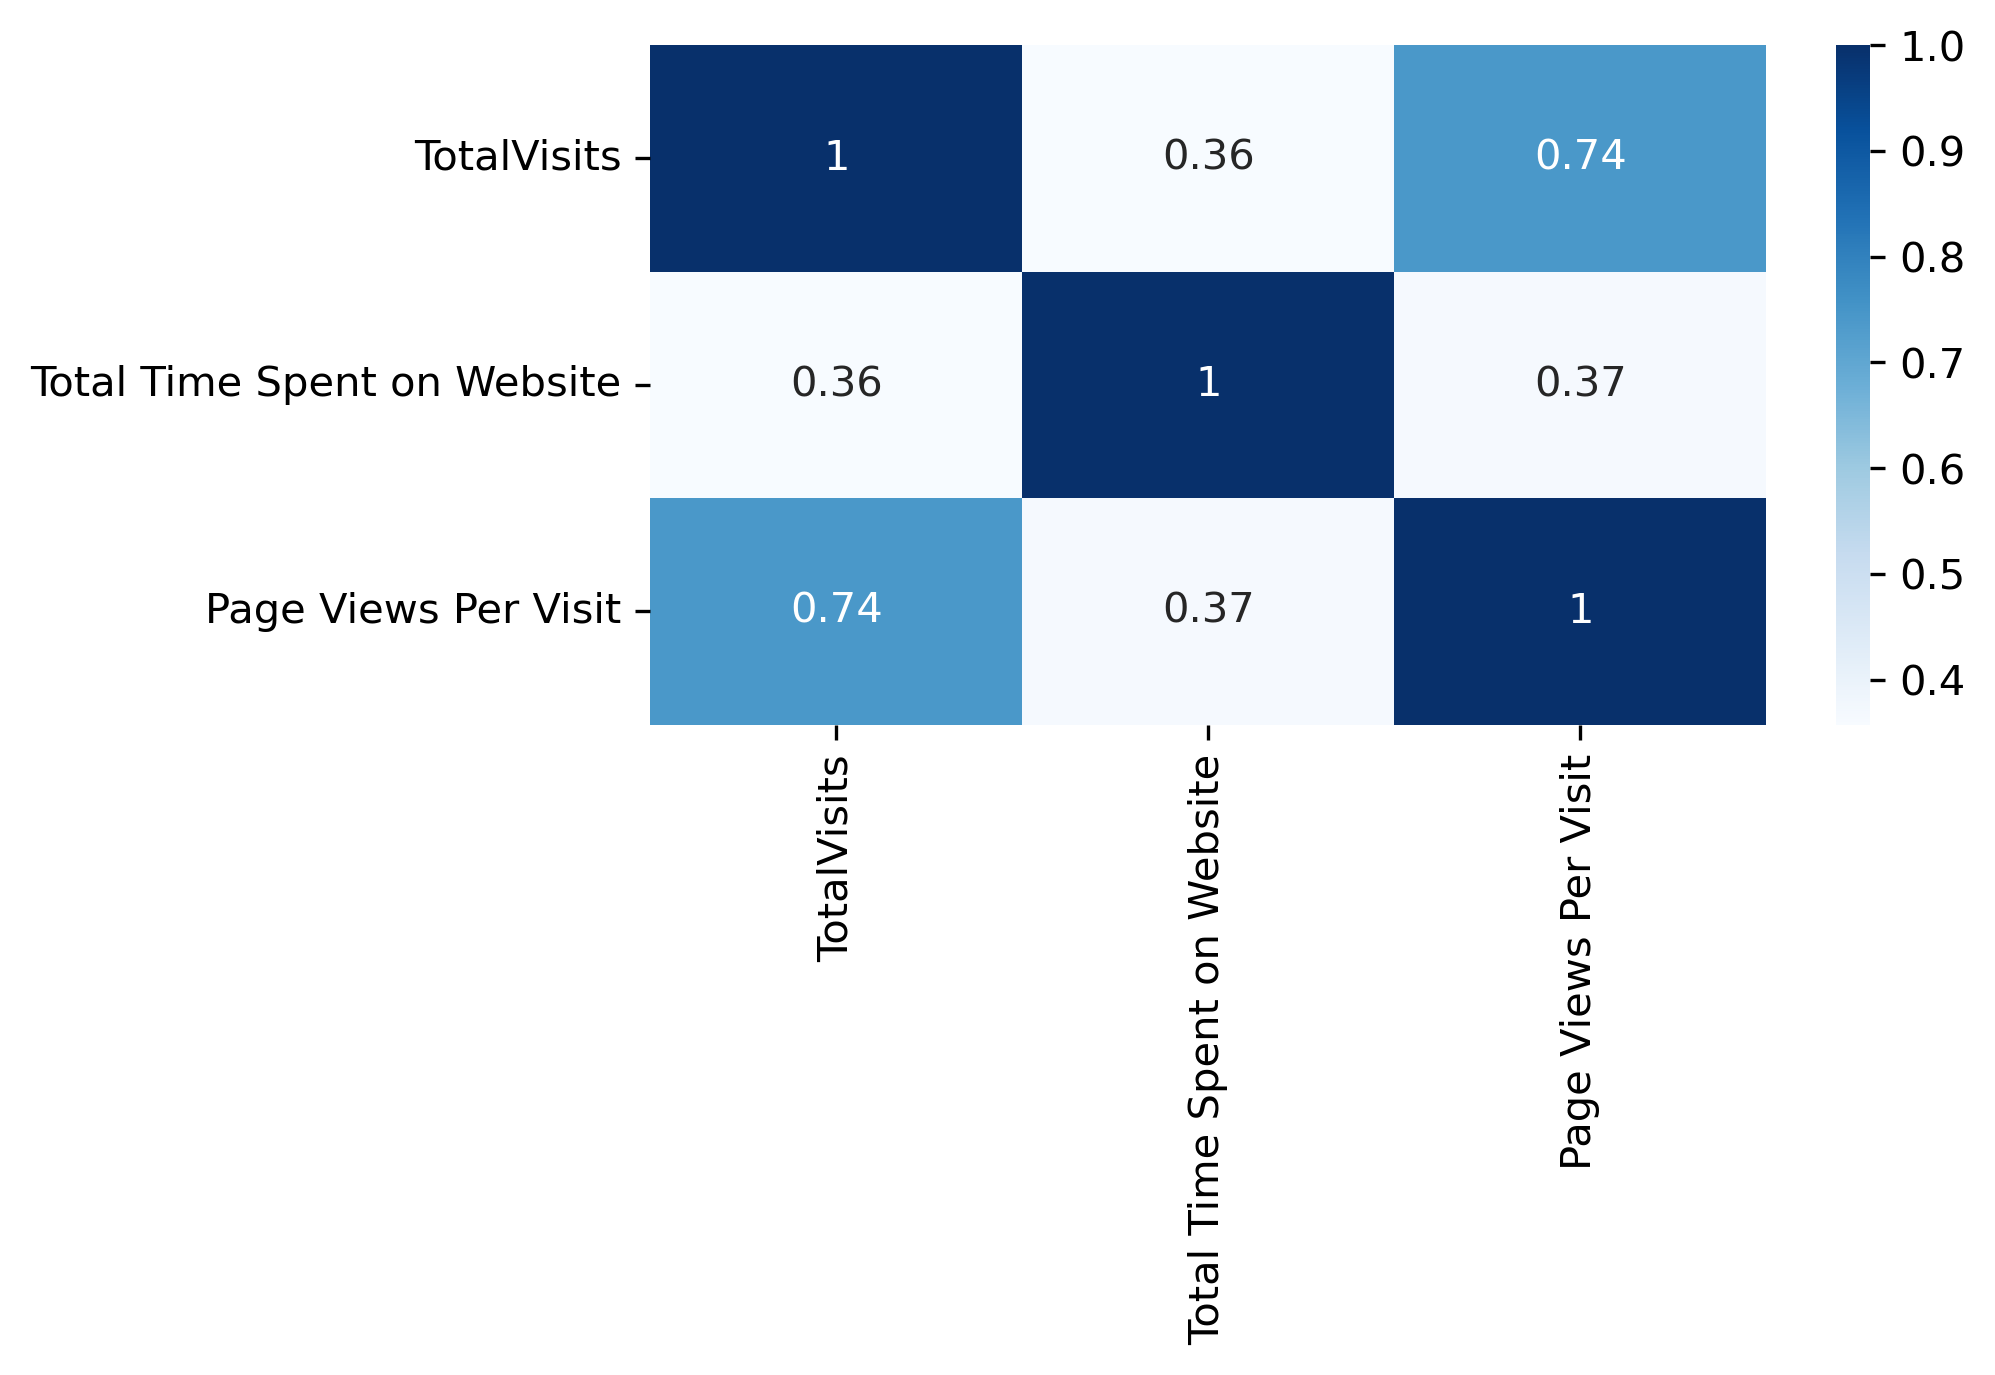

In [311]:
plt.figure(figsize=(6,3))
sns.heatmap(df[num_vars].corr(), annot=True, cmap="Blues")

<p style="color:blue"><b>Insights:</b> It is Observed that, Heat map page views per visit and total visit is highly correlated 

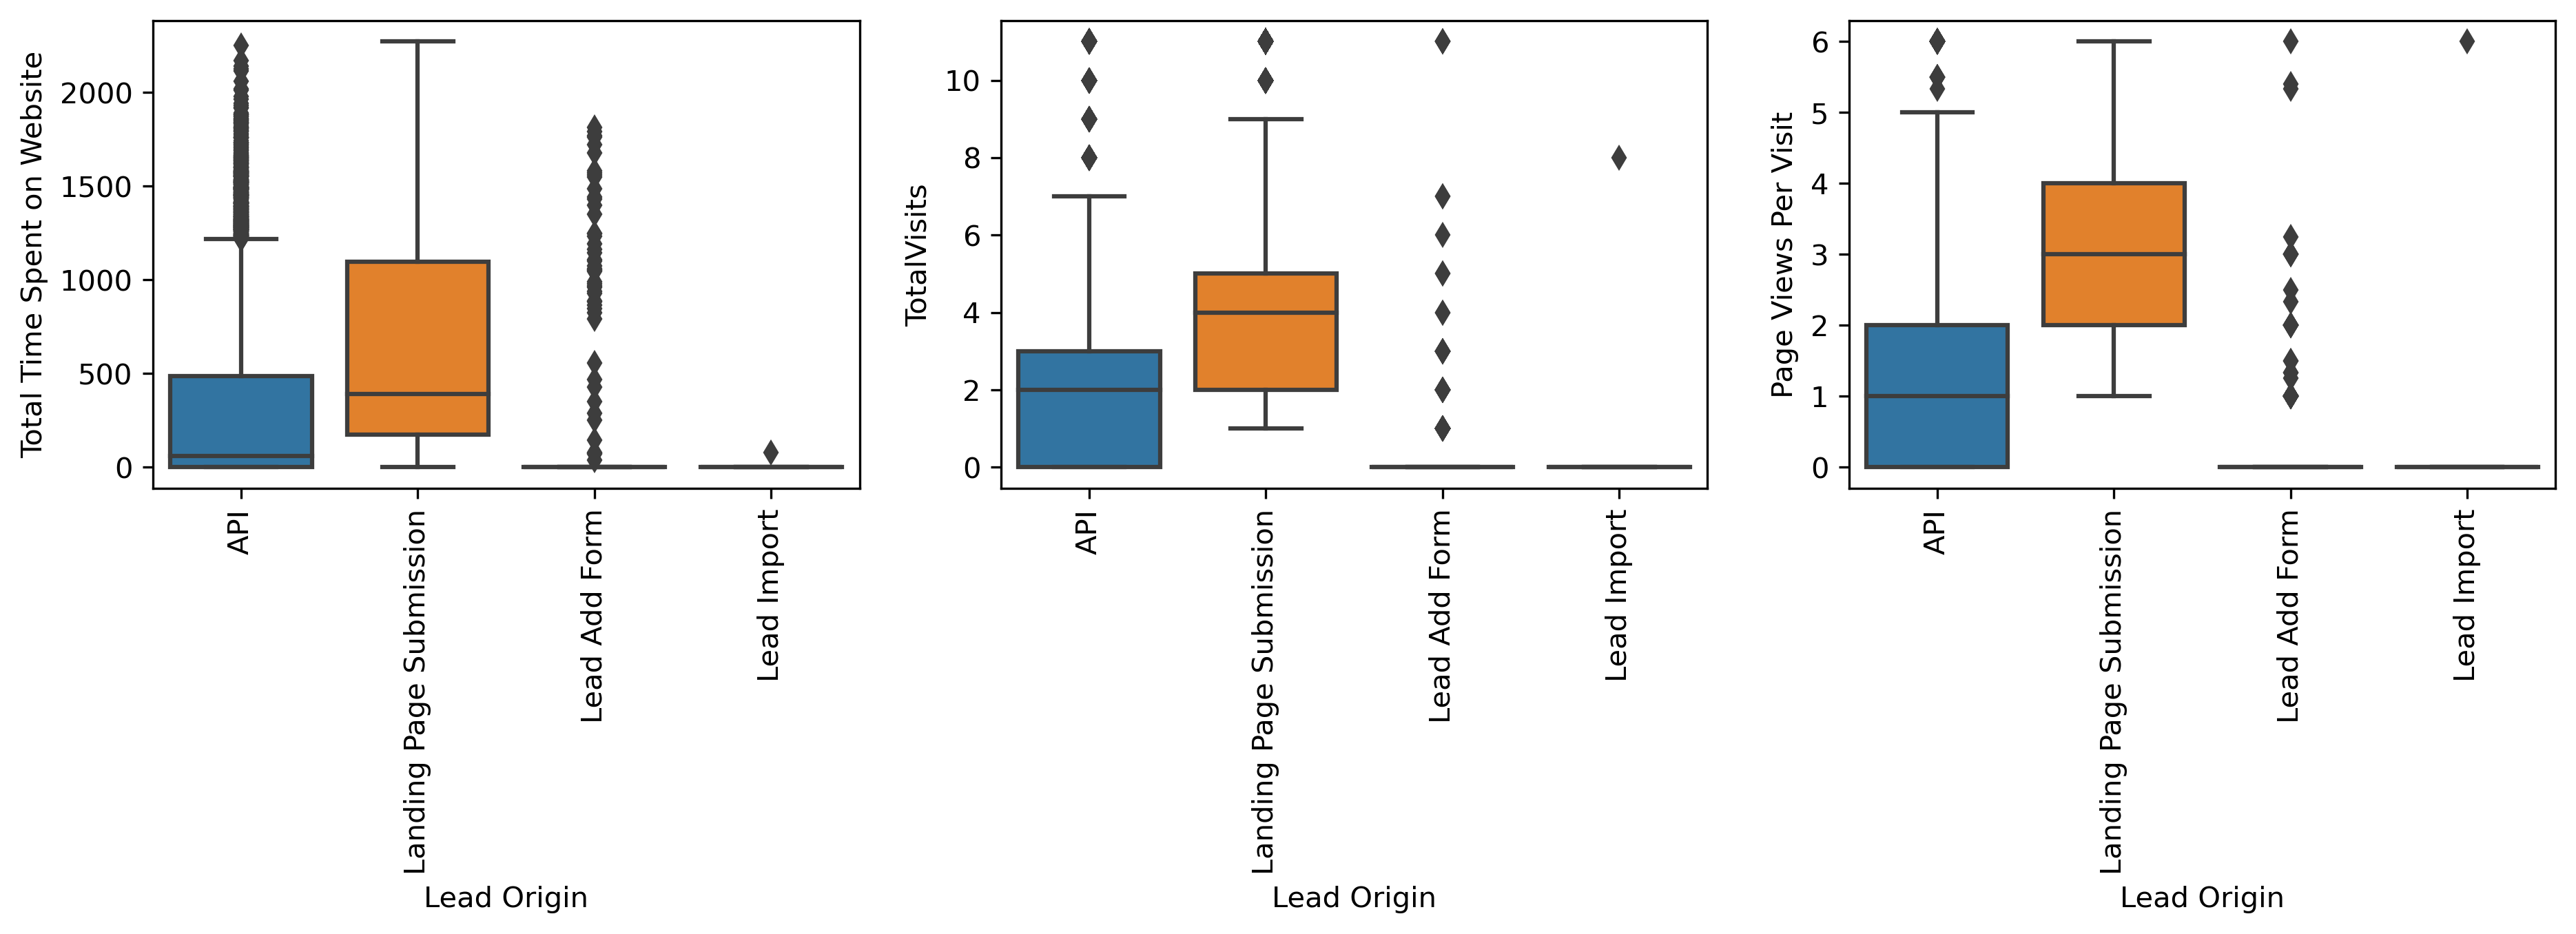

In [312]:
plt.figure(figsize=(15,3))
plt.subplot(1,3,1)
sns.boxplot(x=df["Lead Origin"],y = df["Total Time Spent on Website"], data=df)
plt.xticks(rotation = 90)
plt.subplot(1,3,2)
sns.boxplot(x=df["Lead Origin"],y = df["TotalVisits"], data=df)
plt.xticks(rotation = 90)
plt.subplot(1,3,3)
sns.boxplot(x=df["Lead Origin"],y = df["Page Views Per Visit"], data=df)
plt.xticks(rotation = 90)
plt.show()

###### Leading Page Submission from Lead Origin are Having More Total Time Spent on Website , Total Visits and Page Views Per Visit compared to other Category Levels.


<AxesSubplot:xlabel='Converted', ylabel='Page Views Per Visit'>

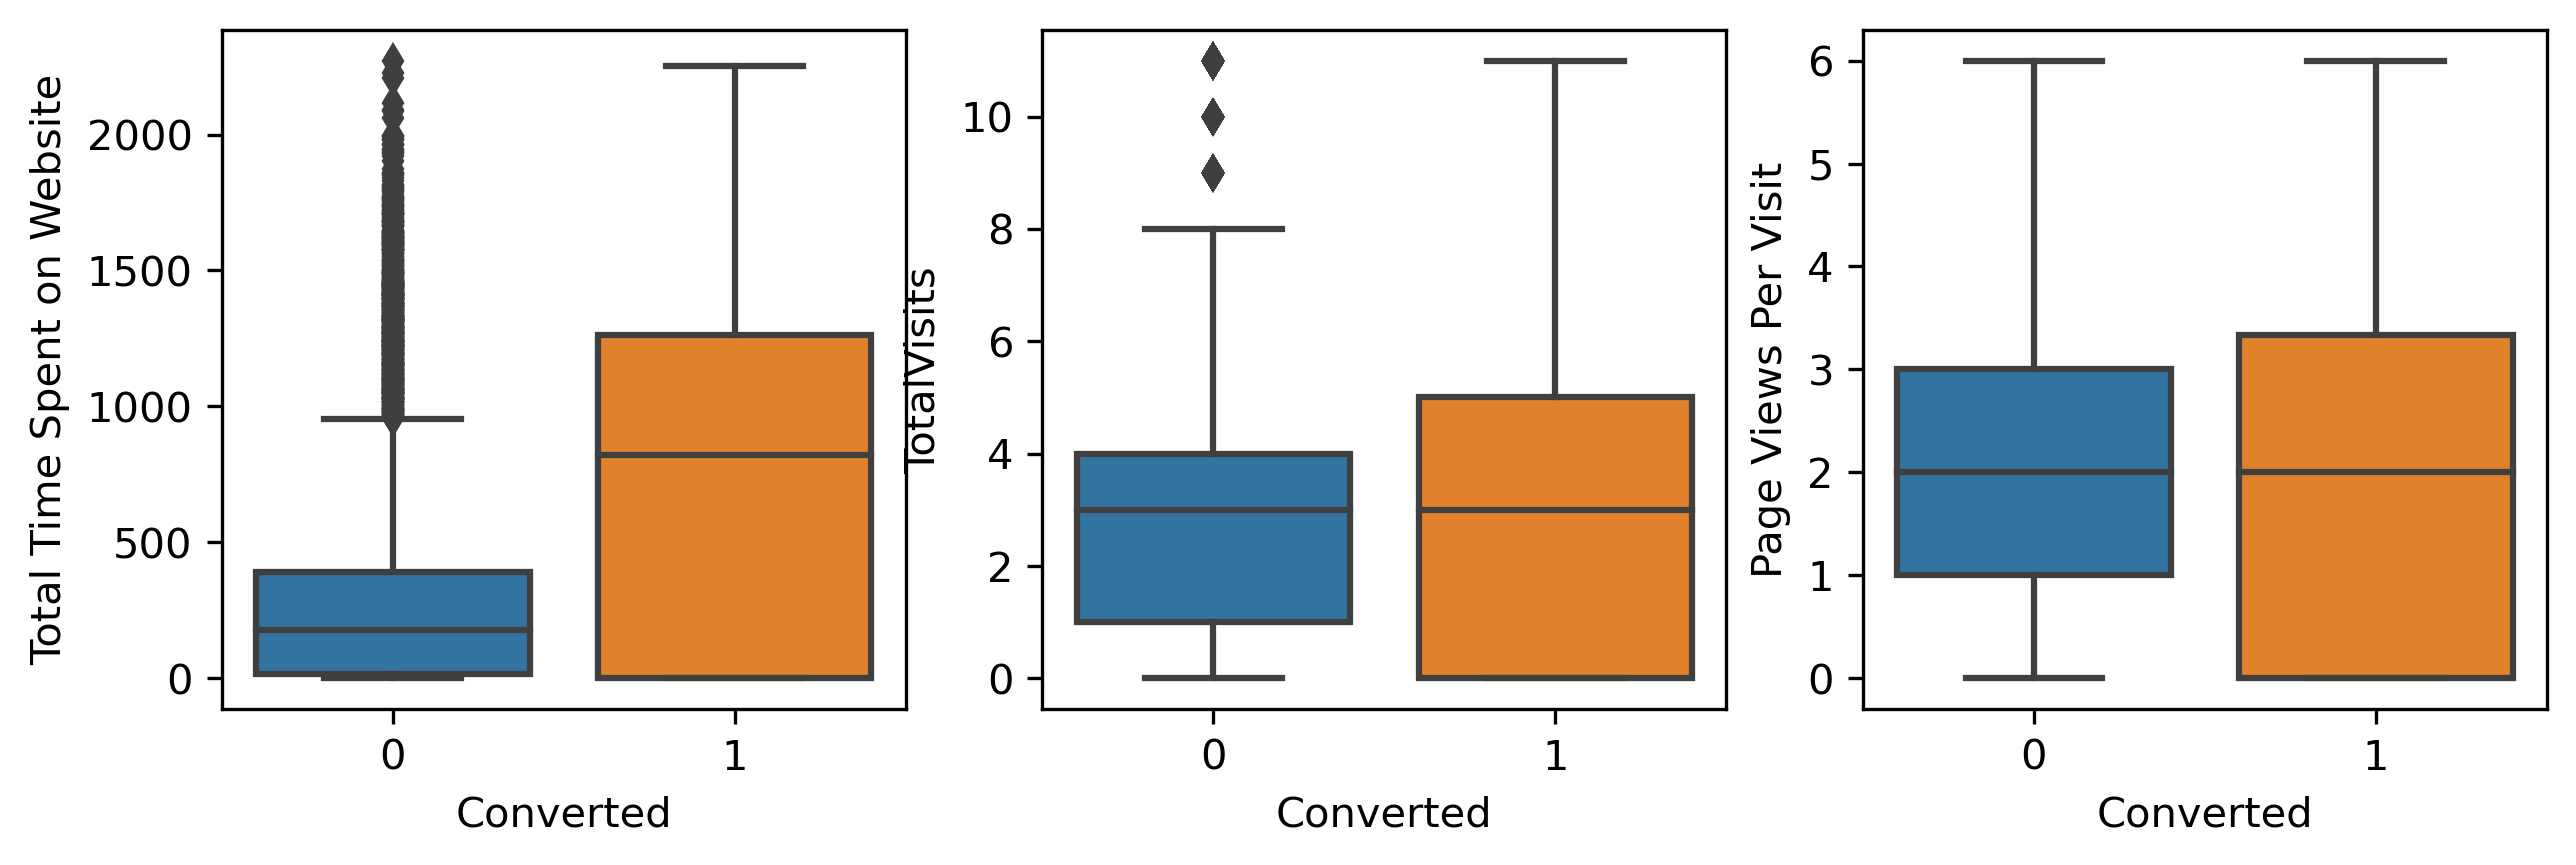

In [313]:
plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
sns.boxplot(x=df["Converted"],y = df["Total Time Spent on Website"], data=df)
plt.subplot(1,3,2)
sns.boxplot(x=df["Converted"],y = df["TotalVisits"], data=df)
plt.subplot(1,3,3)
sns.boxplot(x=df["Converted"],y = df["Page Views Per Visit"], data=df)

###### Customers who took the Course spent more time on website.


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

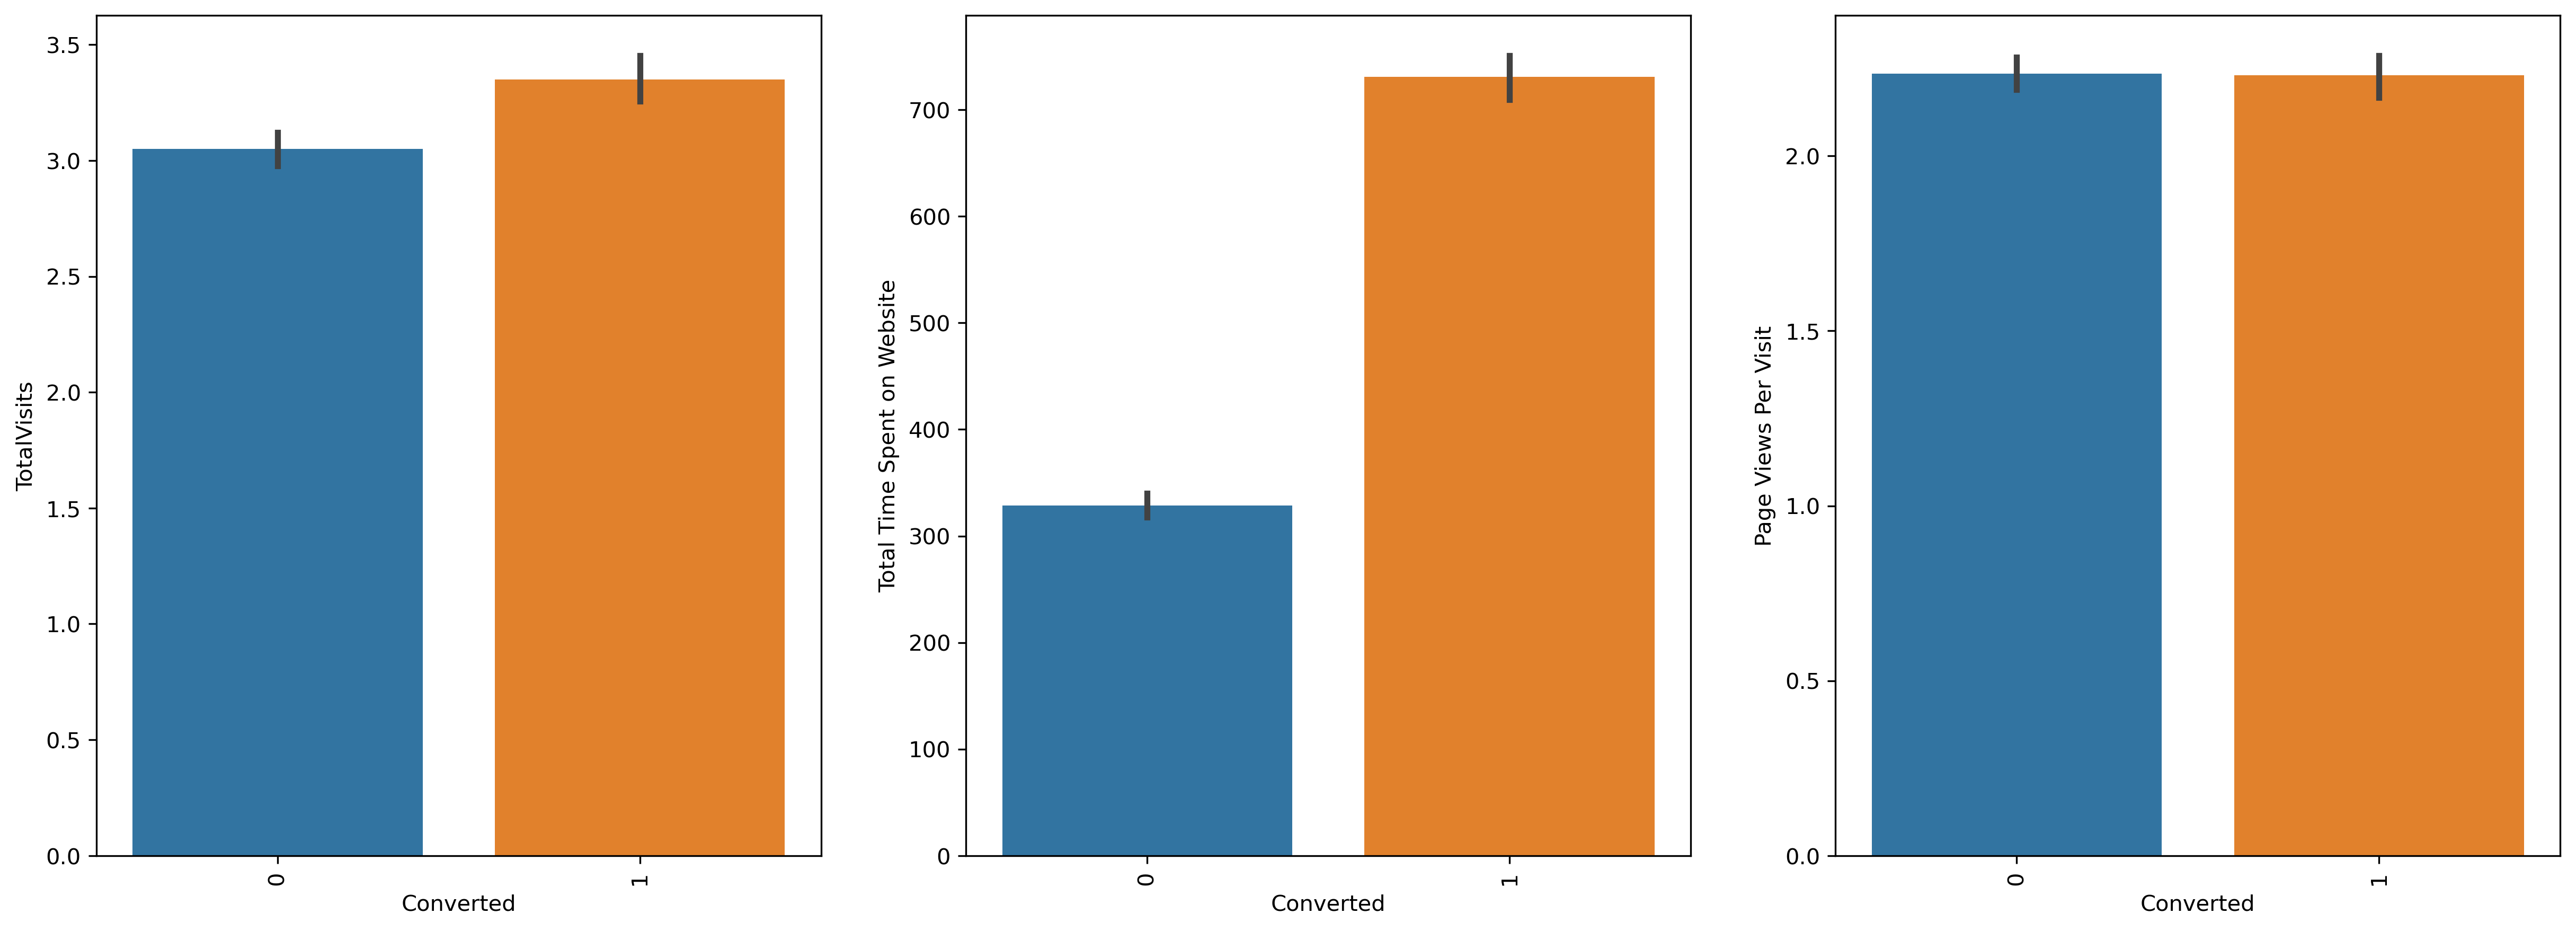

In [314]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.barplot(x=df["Converted"], y=df["TotalVisits"])
plt.xticks(rotation = 90)
plt.subplot(1,3,2)
sns.barplot(x=df["Converted"], y=df["Total Time Spent on Website"])
plt.xticks(rotation = 90)
plt.subplot(1,3,3)
sns.barplot(x=df["Converted"], y=df["Page Views Per Visit"])
plt.xticks(rotation = 90)

<p style="color:blue"><b>Insights:</b> we can observe average time spend by converted customer is double then non converted.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import')])

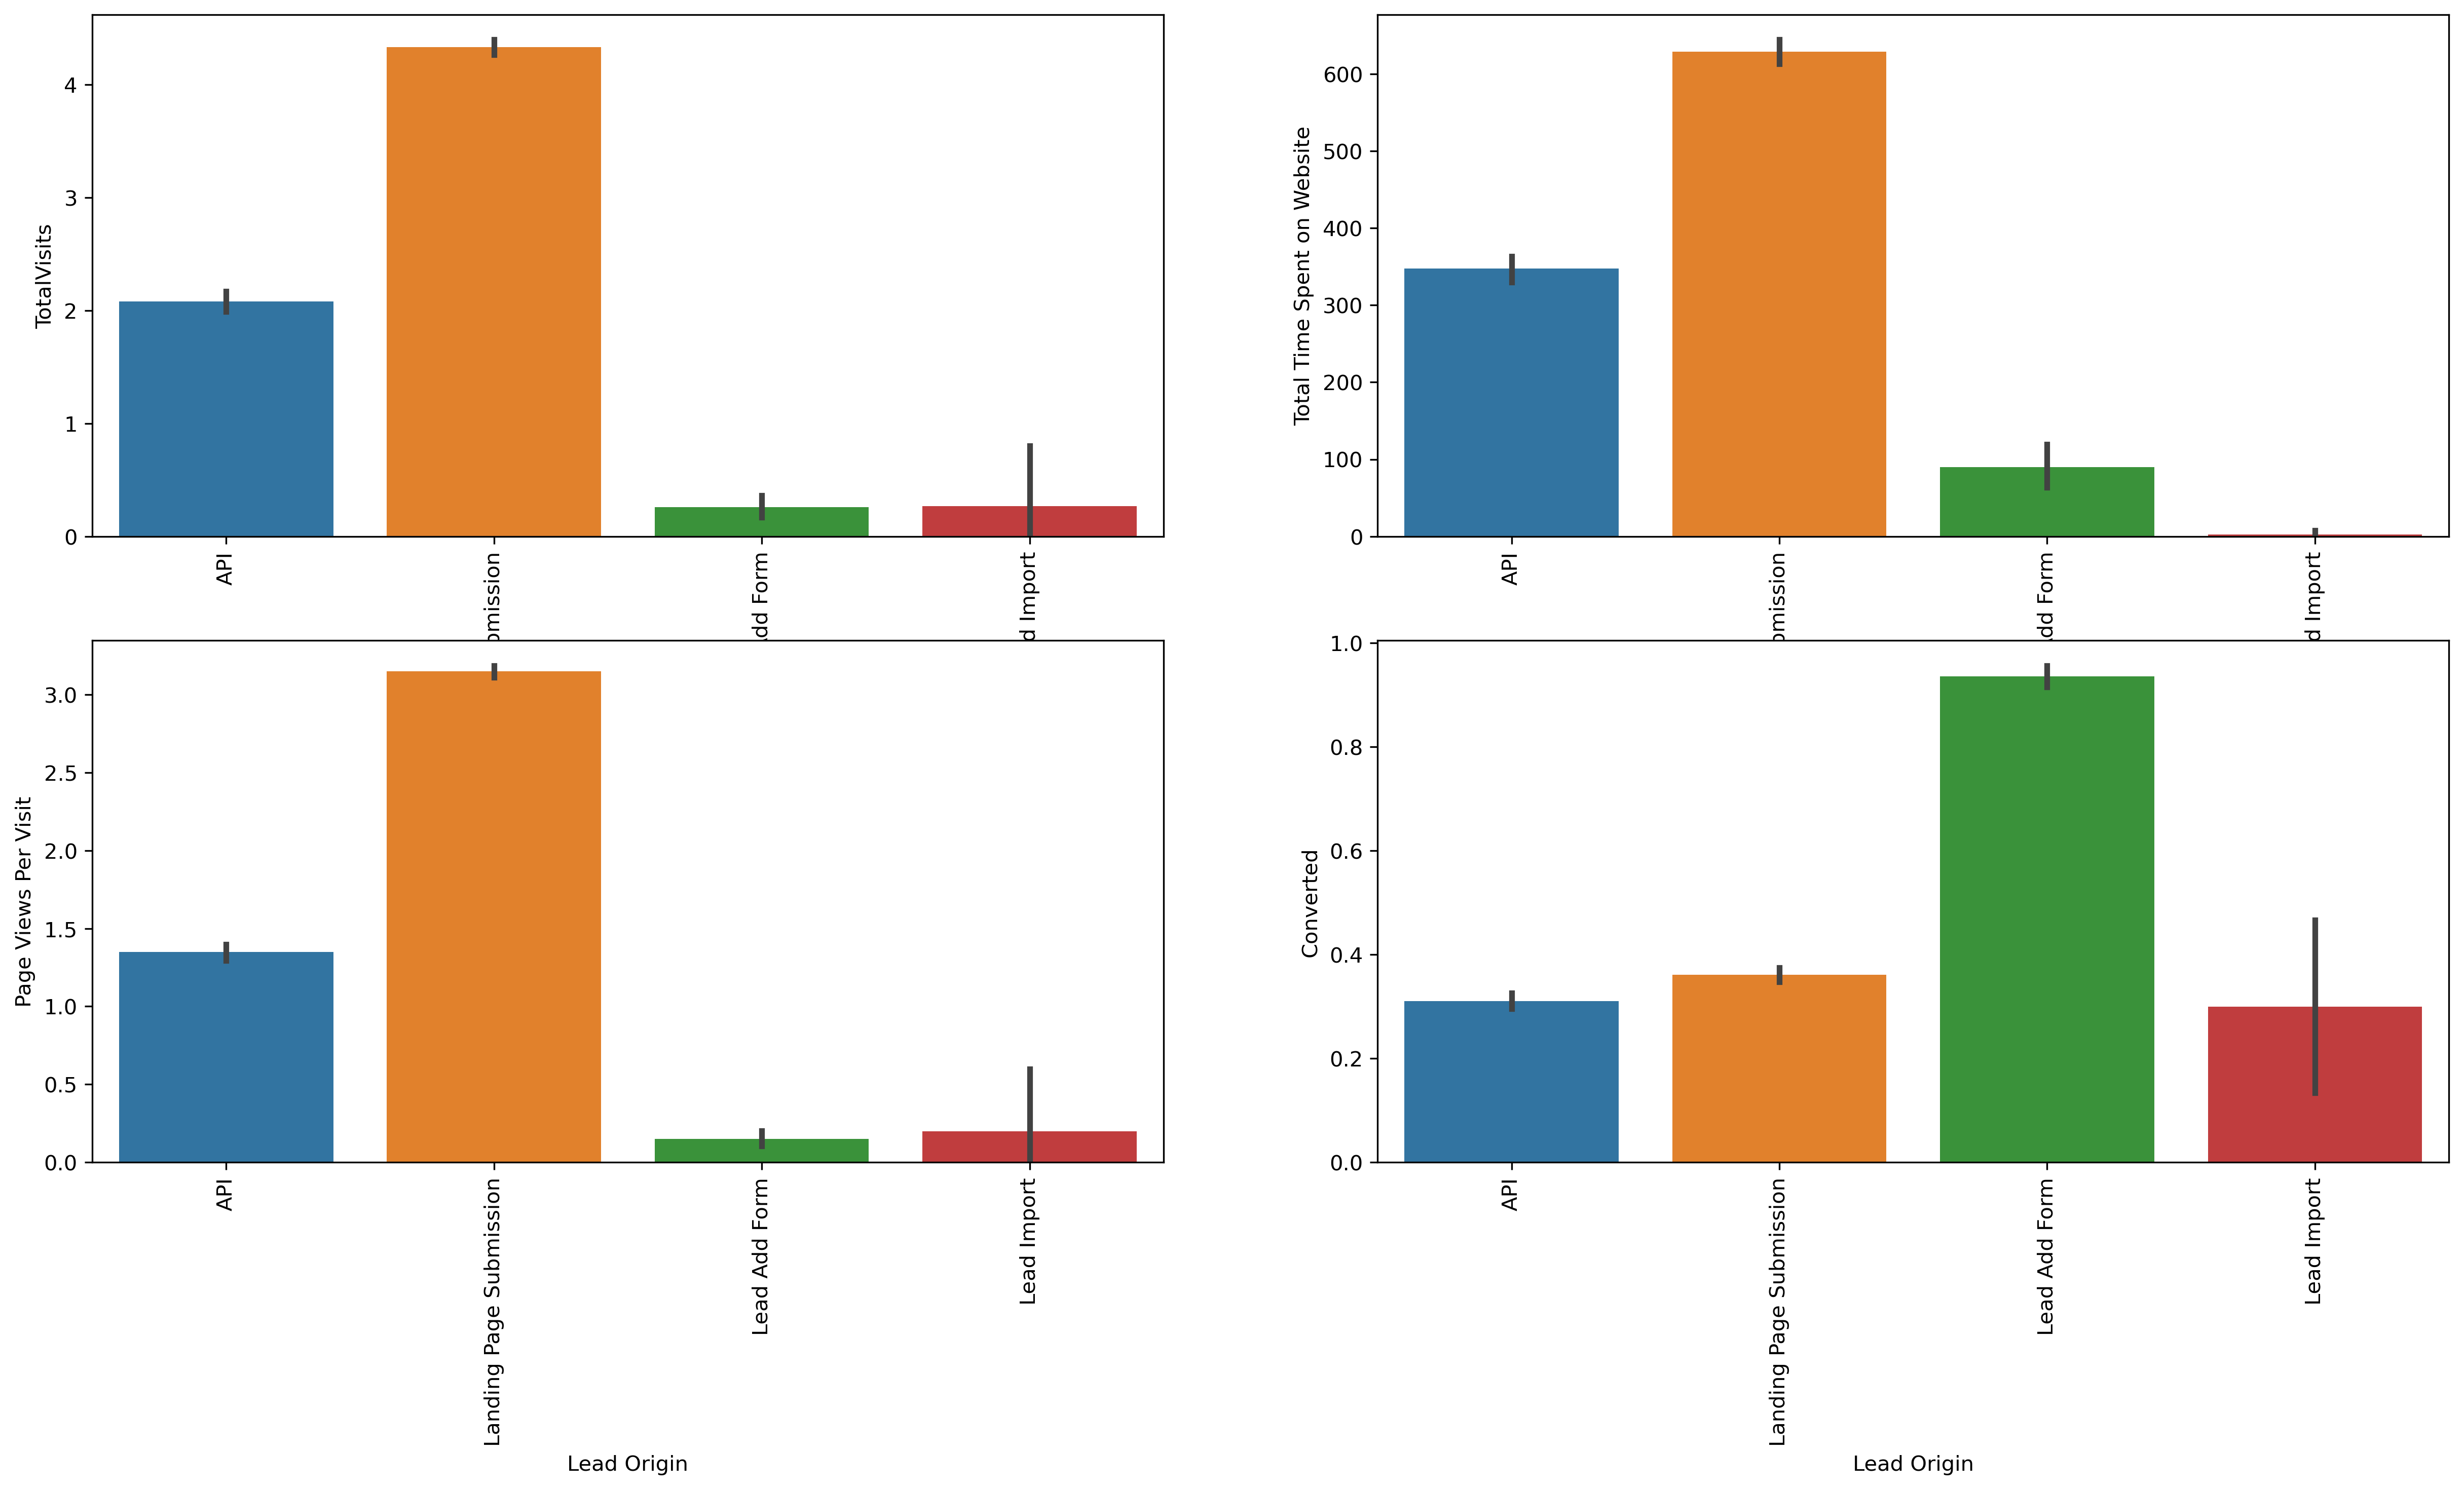

In [315]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.barplot(x=df["Lead Origin"], y=df["TotalVisits"])
plt.xticks(rotation = 90)
plt.subplot(2,2,2)
sns.barplot(x=df["Lead Origin"], y=df["Total Time Spent on Website"])
plt.xticks(rotation = 90)
plt.subplot(2,2,3)
sns.barplot(x=df["Lead Origin"], y=df["Page Views Per Visit"])
plt.xticks(rotation = 90)
plt.subplot(2,2,4)
sns.barplot(x=df["Lead Origin"], y=df["Converted"])
plt.xticks(rotation = 90)

<p style="color:blue"><b>Insights:</b>1.API and Landing Page Submission bring higher number of leads as well as conversion.
<br>2.Lead Add Form has a very high conversion rate but count of leads are not very high.
<br>3.Lead Import and Quick Add Form get very few leads.
<br>4.In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission <br>5.origin and generate more leads from Lead Add Form.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Reference'),
  Text(6, 0, 'Welingak Website'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'blog'),
  Text(9, 0, 'Pay per Click Ads'),
  Text(10, 0, 'bing'),
  Text(11, 0, 'Social Media'),
  Text(12, 0, 'WeLearn'),
  Text(13, 0, 'Click2call'),
  Text(14, 0, 'Live Chat'),
  Text(15, 0, 'welearnblog_Home'),
  Text(16, 0, 'youtubechannel'),
  Text(17, 0, 'testone'),
  Text(18, 0, 'Press_Release'),
  Text(19, 0, 'NC_EDM')])

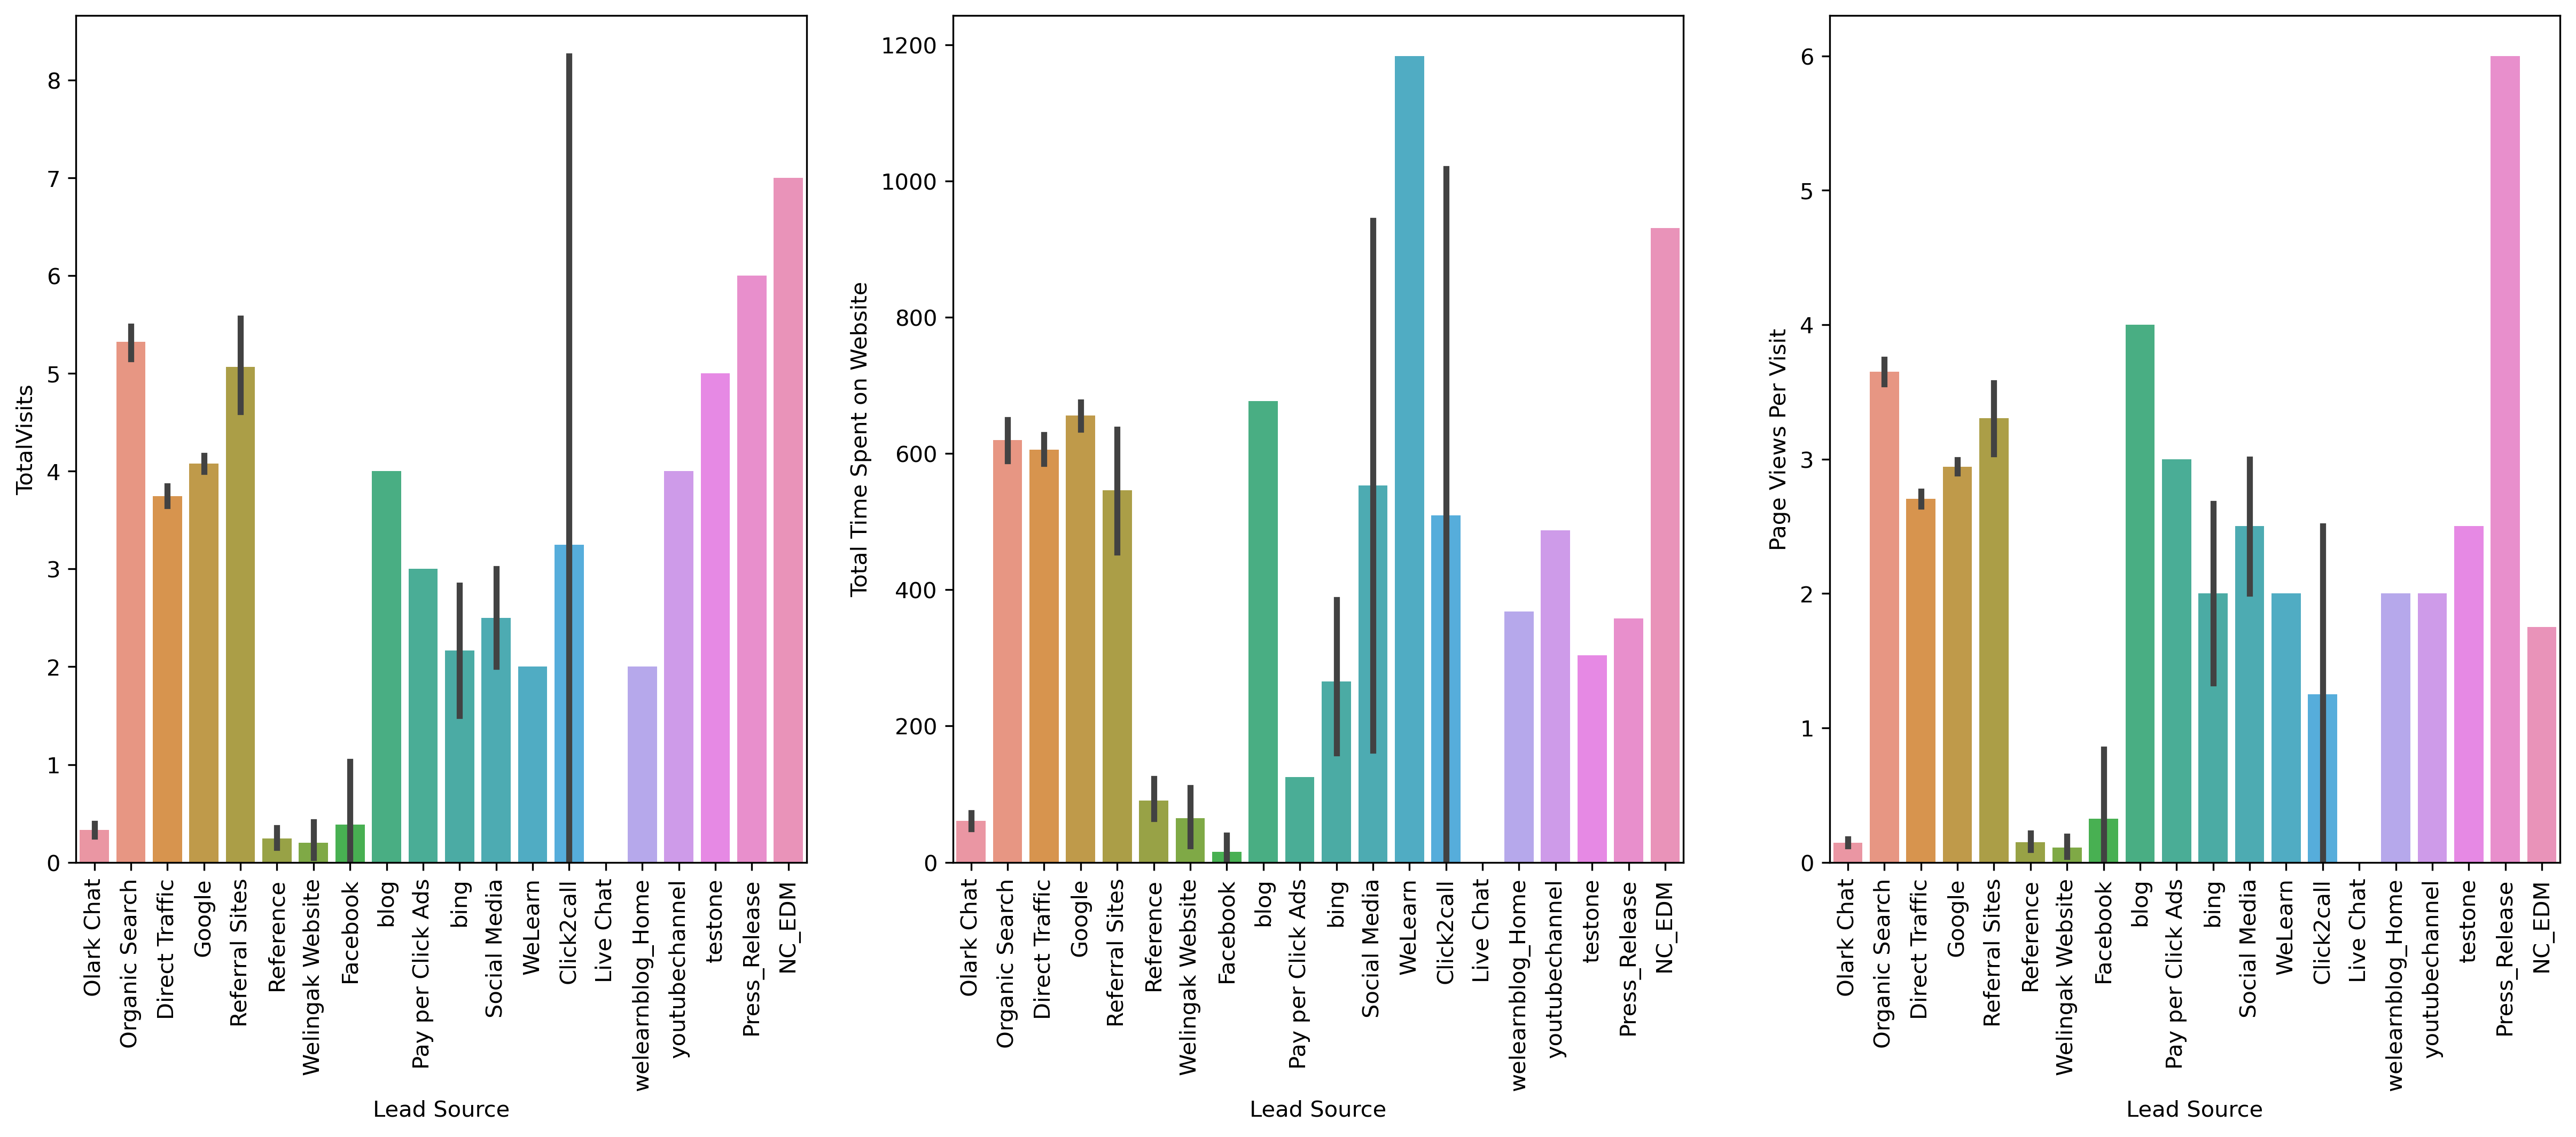

In [316]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.barplot(x=df["Lead Source"], y=df["TotalVisits"])
plt.xticks(rotation = 90)
plt.subplot(1,3,2)
sns.barplot(x=df["Lead Source"], y=df["Total Time Spent on Website"])
plt.xticks(rotation = 90)
plt.subplot(1,3,3)
sns.barplot(x=df["Lead Source"], y=df["Page Views Per Visit"])
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Select'),
  Text(1, 0, 'Mumbai'),
  Text(2, 0, 'missing'),
  Text(3, 0, 'Thane & Outskirts'),
  Text(4, 0, 'Other Metro Cities'),
  Text(5, 0, 'Other Cities'),
  Text(6, 0, 'Other Cities of Maharashtra'),
  Text(7, 0, 'Tier II Cities')])

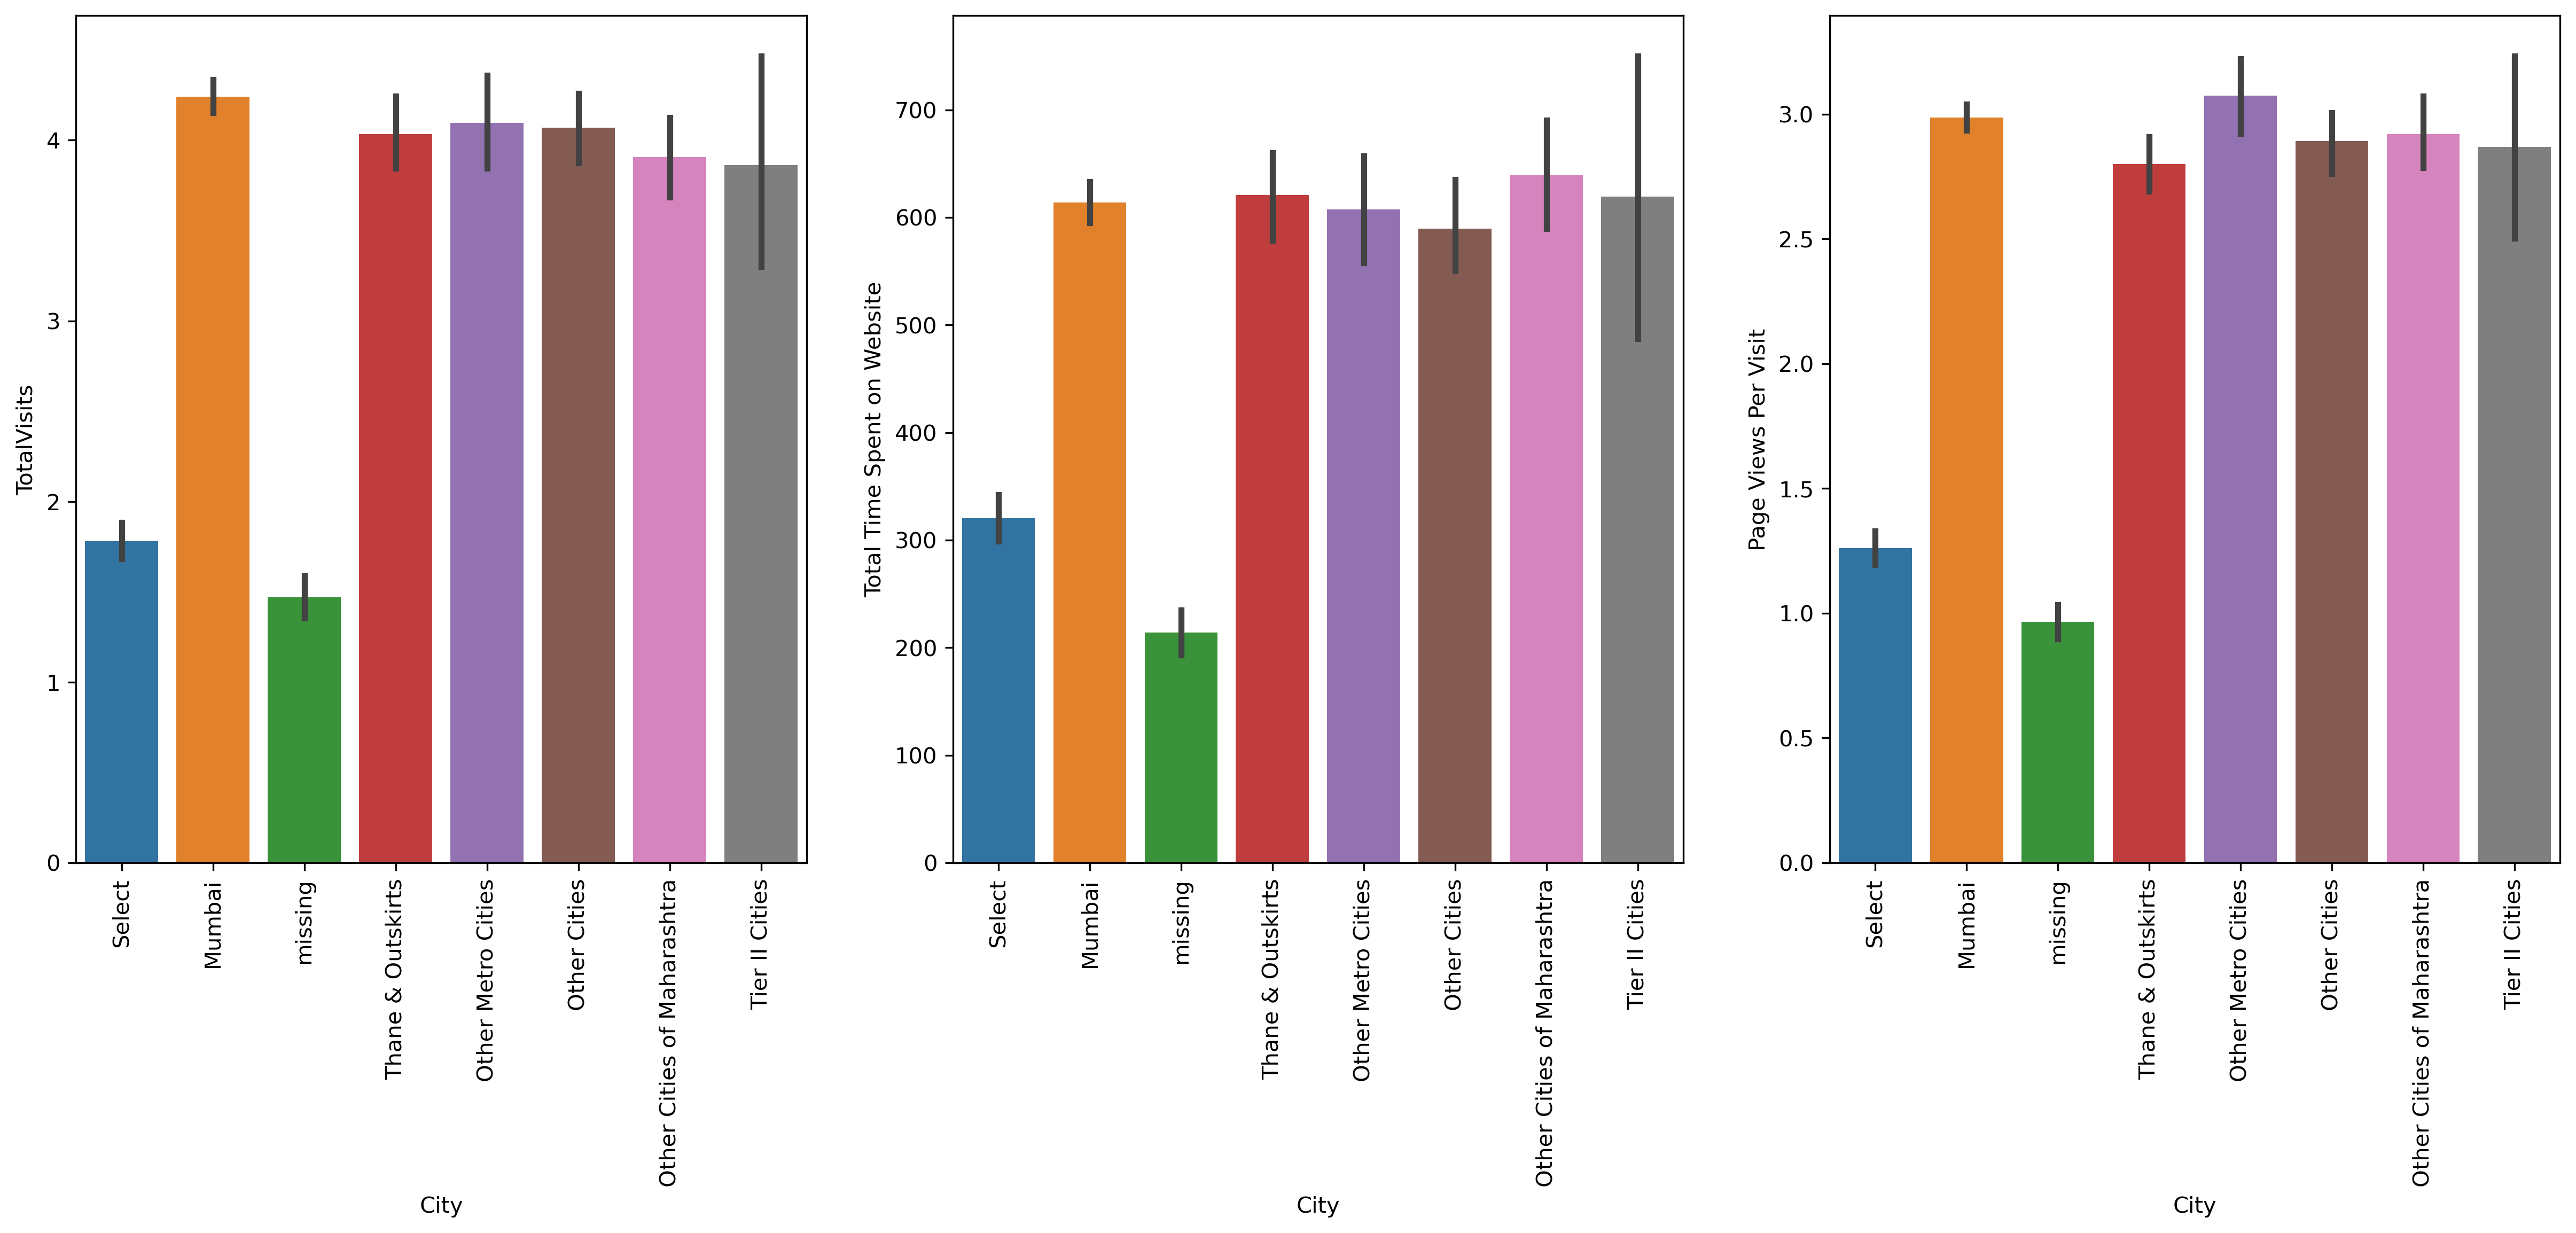

In [317]:
plt.figure(figsize=(20,7))
plt.subplot(1,3,1)
sns.barplot(x=df["City"], y=df["TotalVisits"])
plt.xticks(rotation = 90)
plt.subplot(1,3,2)
sns.barplot(x=df["City"], y=df["Total Time Spent on Website"])
plt.xticks(rotation = 90)
plt.subplot(1,3,3)
sns.barplot(x=df["City"], y=df["Page Views Per Visit"])
plt.xticks(rotation = 90)

In [318]:
df.groupby(by = ["Converted"]).sum()

TotalVisits  Total Time Spent on Website  Page Views Per Visit
Converted                                                                
0              17048.0                      1837702              12497.69
1              11389.0                      2485302               7586.63

In [319]:
df.groupby(by = ["Converted"]).max()

Lead Origin     Lead Source Do Not Email Do Not Call  TotalVisits  \
Converted                                                                      
0          Lead Import  youtubechannel          Yes          No         11.0   
1          Lead Import            bing          Yes         Yes         11.0   

           Total Time Spent on Website  Page Views Per Visit  \
Converted                                                      
0                                 2272                   6.0   
1                                 2253                   6.0   

                          Last Activity        Country Specialization  \
Converted                                                               
0            Visited Booth in Tradeshow        unknown        missing   
1          View in browser link Clicked  United States        missing   

          How did you hear about X Education What is your current occupation  \
Converted                                                                      
0                                    missing                         missing   
1                                    missing                         missing   

          What matters most to you in choosing a course Search  \
Converted                                                        
0                                               missing    Yes   
1                                               missing    Yes   

          Newspaper Article X Education Forums Newspaper  \
Converted                                                  
0                       Yes                Yes       Yes   
1                       Yes                 No        No   

          Digital Advertisement Through Recommendations Lead Profile     City  \
Converted                                                                       
0                           Yes                     Yes      missing  missing   
1                           Yes                     Yes      missing  missing   

          A free copy of Mastering The Interview         Last Notable Activity  
Converted                                                                       
0                                            Yes  View in browser link Clicked  
1                                            Yes                  Unsubscribed

In [320]:
df.groupby(by = ["City"]).sum()

Converted  TotalVisits  \
City                                                  
Mumbai                            1266      13339.0   
Other Cities                       271       2750.0   
Other Cities of Maharashtra        190       1711.0   
Other Metro Cities                 149       1511.0   
Select                            1019       3820.0   
Thane & Outskirts                  328       2944.0   
Tier II Cities                      25        282.0   
missing                            153       2080.0   

                             Total Time Spent on Website  Page Views Per Visit  
City                                                                            
Mumbai                                           1931503               9392.49  
Other Cities                                      398471               1954.56  
Other Cities of Maharashtra                       280062               1279.27  
Other Metro Cities                                224120               1134.31  
Select                                            687379               2704.03  
Thane & Outskirts                                 453157               2044.66  
Tier II Cities                                     45213                209.40  
missing                                           303099               1365.60

In [321]:
df.groupby(by = ["Country"]).sum()

Converted  TotalVisits  Total Time Spent on Website  \
Country                                                                     
Asia/Pacific Region           1          3.0                         1667   
Australia                     3         60.0                         8694   
Bahrain                       4         29.0                         5294   
Bangladesh                    1          8.0                         2192   
Belgium                       0          9.0                          310   
Canada                        0         22.0                         1079   
China                         0          4.0                          383   
Denmark                       1          4.0                         1200   
France                        3         34.0                         4480   
Germany                       1         18.0                         2028   
Ghana                         0          4.0                          431   
Hong Kong                     4         30.0                         5896   
India                      2368      26895.0                      4065476   
Indonesia                     0          6.0                          169   
Italy                         0          8.0                         1723   
Kenya                         0          2.0                          204   
Kuwait                        0         13.0                         1713   
Liberia                       0          1.0                          468   
Malaysia                      0          4.0                           32   
Missing                     951        460.0                        97296   
Netherlands                   0          3.0                         1328   
Nigeria                       0         14.0                         2029   
Oman                          3         17.0                         2718   
Philippines                   0          5.0                          626   
Qatar                         1         29.0                         5094   
Russia                        0          1.0                          481   
Saudi Arabia                  4         77.0                        11355   
Singapore                    11         92.0                        16085   
South Africa                  1         17.0                         2228   
Sri Lanka                     0          5.0                          320   
Sweden                        1         14.0                         1196   
Switzerland                   0          2.0                          621   
Tanzania                      0          2.0                          295   
Uganda                        0          4.0                          410   
United Arab Emirates         20        226.0                        29242   
United Kingdom                5         64.0                         8979   
United States                18        237.0                        37596   
Vietnam                       0          2.0                          151   
unknown                       0         12.0                         1515   

                      Page Views Per Visit  
Country                                     
Asia/Pacific Region                   2.00  
Australia                            48.00  
Bahrain                              18.00  
Bangladesh                            5.00  
Belgium                               6.00  
Canada                               11.33  
China                                 3.00  
Denmark                               4.00  
France                               16.73  
Germany                              13.50  
Ghana                                 4.00  
Hong Kong                            22.00  
India                             19008.60  
Indonesia                             6.00  
Italy                                 4.00  
Kenya                                 2.00  
Kuwait                               10.00  
Liberia  

In [322]:
df.groupby(by=["Lead Origin"]).sum()

Converted  TotalVisits  Total Time Spent on Website  \
Lead Origin                                                                    
API                           1106       7401.0                      1237085   
Landing Page Submission       1742      20879.0                      3033617   
Lead Add Form                  544        149.0                        52226   
Lead Import                      9          8.0                           76   

                         Page Views Per Visit  
Lead Origin                                    
API                                   4801.02  
Landing Page Submission              15189.58  
Lead Add Form                           87.72  
Lead Import                              6.00

In [323]:
df.groupby(by=["Lead Source"]).sum()

Converted  TotalVisits  Total Time Spent on Website  \
Lead Source                                                              
Click2call                 3         13.0                         2036   
Direct Traffic           814       9449.0                      1527372   
Facebook                   9         12.0                          464   
Google                  1142      11663.0                      1874587   
Live Chat                  2          0.0                            0   
NC_EDM                     1          7.0                          931   
Olark Chat               448        580.0                       106958   
Organic Search           413       5942.0                       691951   
Pay per Click Ads          0          3.0                          125   
Press_Release              0          6.0                          358   
Reference                410        108.0                        40227   
Referral Sites            29        593.0                        63894   
Social Media               1          5.0                         1106   
WeLearn                    1          2.0                         1184   
Welingak Website         127         26.0                         8381   
bing                       1         13.0                         1594   
blog                       0          4.0                          677   
testone                    0          5.0                          304   
welearnblog_Home           0          2.0                          368   
youtubechannel             0          4.0                          487   

                   Page Views Per Visit  
Lead Source                              
Click2call                         5.00  
Direct Traffic                  6820.11  
Facebook                          10.00  
Google                          8411.67  
Live Chat                          0.00  
NC_EDM                             1.75  
Olark Chat                       256.20  
Organic Search                  4073.87  
Pay per Click Ads                  3.00  
Press_Release                      6.00  
Reference                         66.47  
Referral Sites                   386.50  
Social Media                       5.00  
WeLearn                            2.00  
Welingak Website                  14.25  
bing                              12.00  
blog                               4.00  
testone                            2.50  
welearnblog_Home                   2.00  
youtubechannel                     2.00

In [324]:
df.groupby(by = ["What is your current occupation"]).sum()

Converted  TotalVisits  \
What is your current occupation                           
Businessman                              4         28.0   
Housewife                                9         22.0   
Other                                    9         85.0   
Student                                 72        521.0   
Unemployed                            2330      18207.0   
Working Professional                   615       2109.0   
missing                                362       7465.0   

                                 Total Time Spent on Website  \
What is your current occupation                                
Businessman                                             4067   
Housewife                                               5421   
Other                                                  13563   
Student                                                88997   
Unemployed                                           2820962   
Working Professional                                  446652   
missing                                               943342   

                                 Page Views Per Visit  
What is your current occupation                        
Businessman                                     16.80  
Housewife                                       16.50  
Other                                           47.33  
Student                                        365.82  
Unemployed                                   12921.63  
Working Professional                          1454.34  
missing                                       5261.90

#### 5.3 Multi- variate Analysis:

<AxesSubplot:>

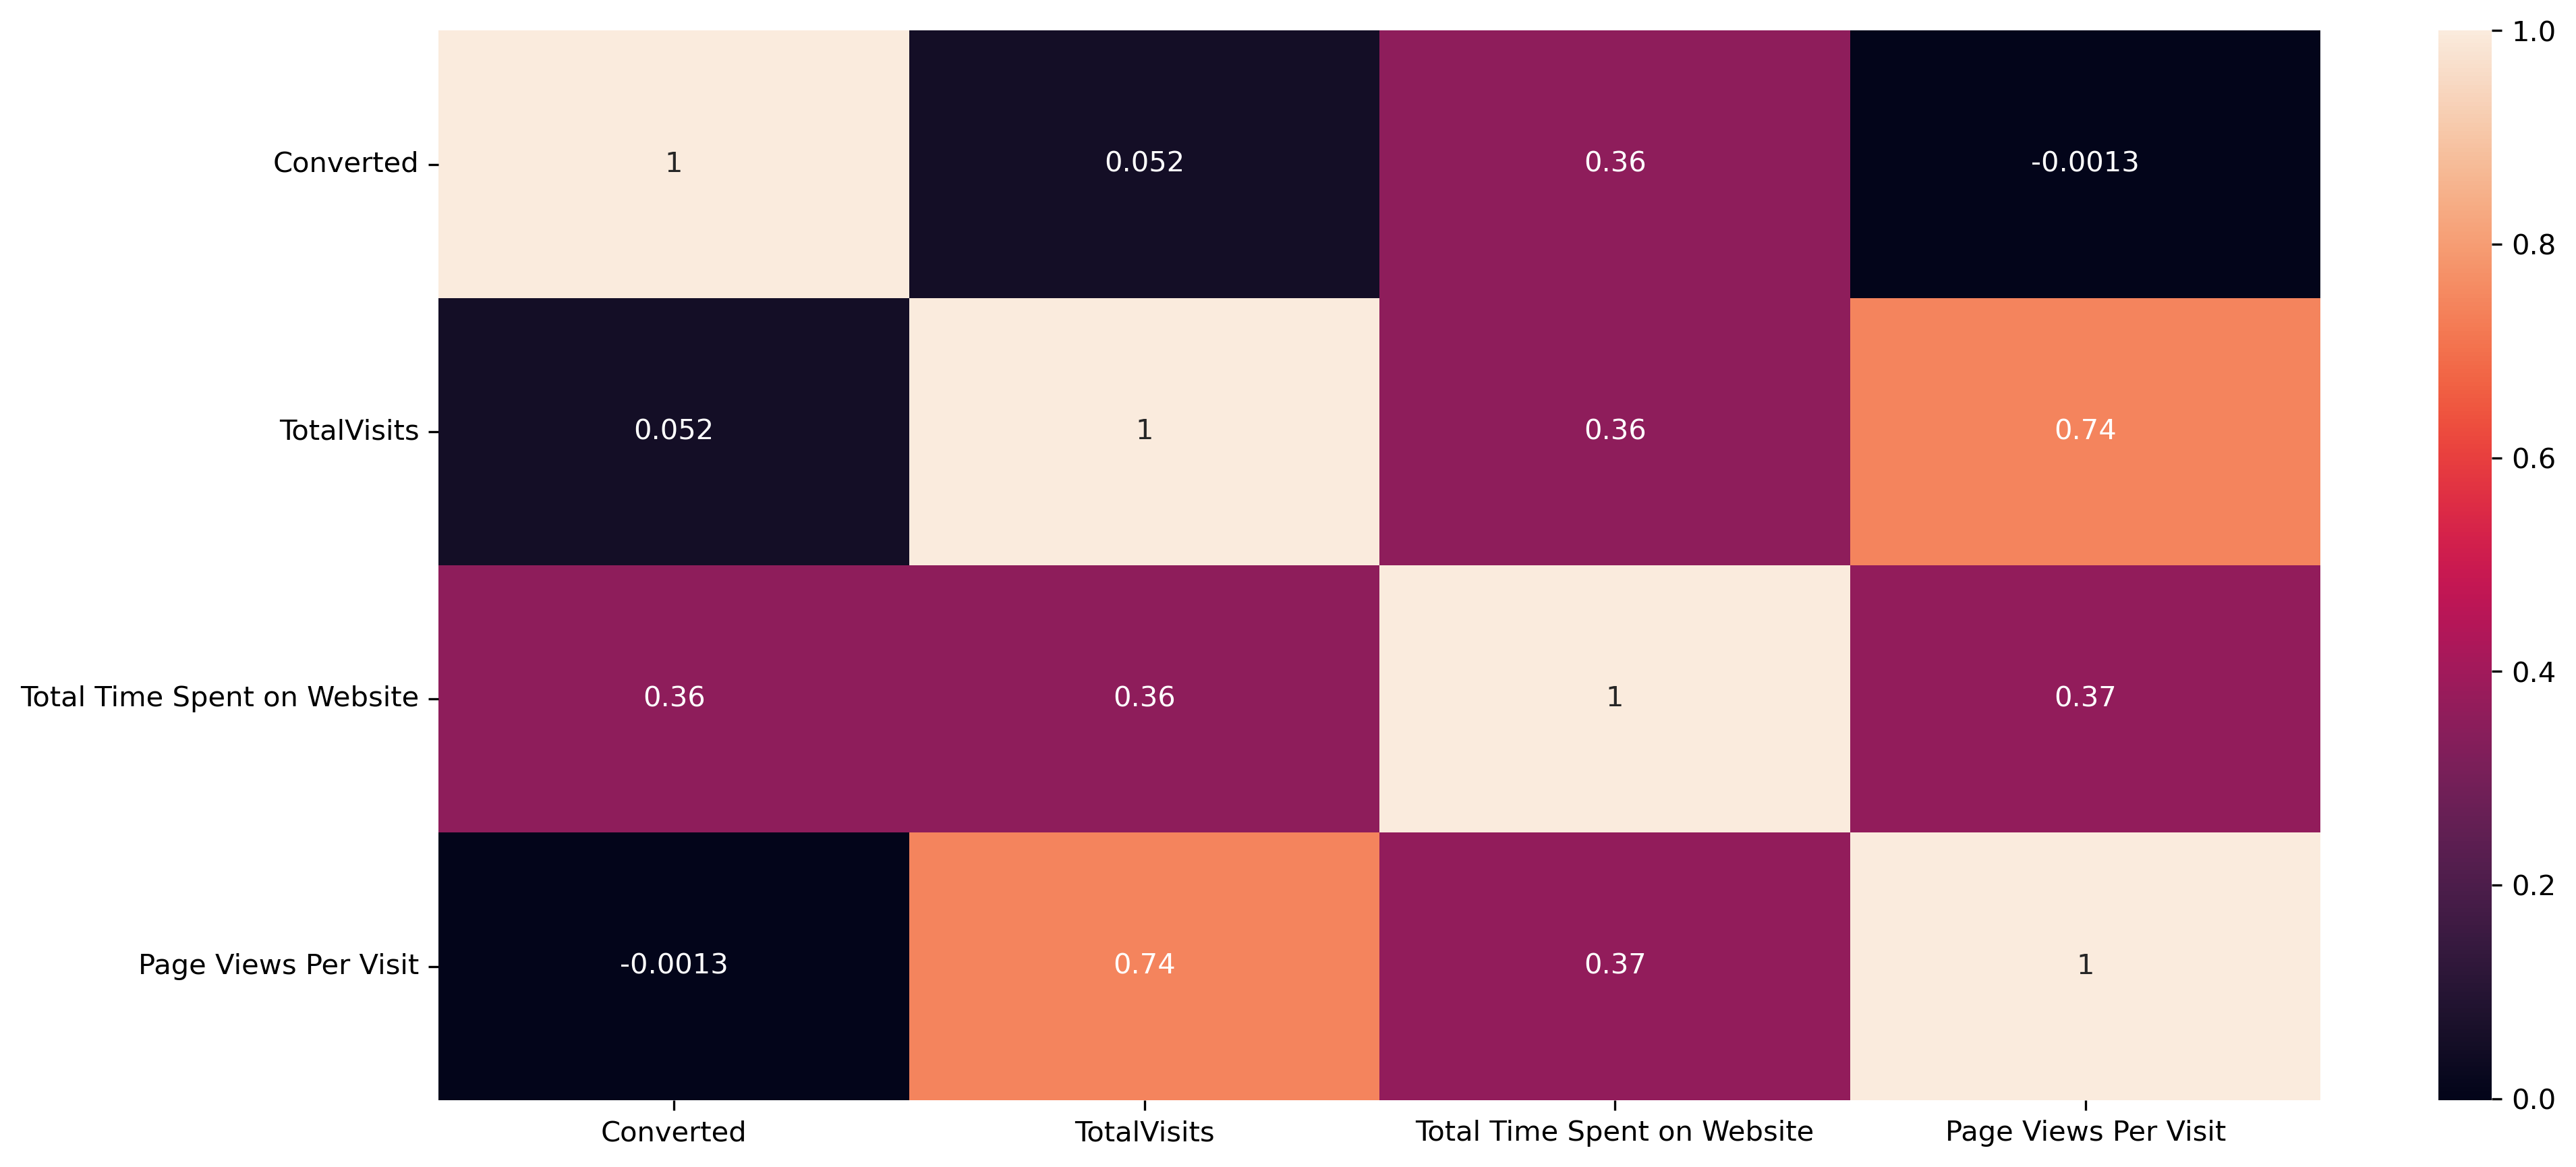

In [325]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

<p style="color:blue"><b>Insights:</b>1.Total time spend of converted is 2485302 and non converted is 1837702<br>2.Mumbai has max converted 1266, total visits 13339, total time spent on website 1931503, page views per visit 9392.49 <br>3.India has max number of converted rate 2368, Total visits 26895, Total time spent on website 4065476, page per visit 19008.60<br>4.total visits and page per visits are highly correlated.

### 6. Data preparation for Machine Learning:

#### 6.1 Mapping:

In [326]:
lead = df

In [327]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8992 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8992 non-null   object 
 1   Lead Source                                    8992 non-null   object 
 2   Do Not Email                                   8992 non-null   object 
 3   Do Not Call                                    8992 non-null   object 
 4   Converted                                      8992 non-null   int64  
 5   TotalVisits                                    8992 non-null   float64
 6   Total Time Spent on Website                    8992 non-null   int64  
 7   Page Views Per Visit                           8992 non-null   float64
 8   Last Activity                                  8992 non-null   object 
 9   Country                                        8992 

In [328]:
lead["Do Not Call"].value_counts()

No     8990
Yes       2
Name: Do Not Call, dtype: int64

In [329]:
lead["Do Not Email"].value_counts()

No     8292
Yes     700
Name: Do Not Email, dtype: int64

In [330]:
# mapping yes/ no to 1/0:
lead["Do Not Call"] = lead["Do Not Call"].map({"Yes":1,"No":0})

In [331]:
lead["Do Not Email"] = lead["Do Not Email"].map({"Yes":1,"No":0})

In [332]:
lead["Search"] = lead["Search"].map({"Yes":1,"No":0})

In [333]:
lead["Newspaper"] = lead["Newspaper"].map({"Yes":1,"No":0})

In [334]:
lead["Newspaper Article"] = lead["Newspaper Article"].map({"Yes":1,"No":0})

In [335]:
lead["X Education Forums"] = lead["X Education Forums"].map({"Yes":1,"No":0})

In [336]:
lead["Digital Advertisement"] = lead["Digital Advertisement"].map({"Yes":1,"No":0})

In [337]:
lead["Through Recommendations"] = lead["Through Recommendations"].map({"Yes":1,"No":0})

In [338]:
lead["A free copy of Mastering The Interview"] = lead["A free copy of Mastering The Interview"].map({"Yes":1,"No":0})

In [339]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8992 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8992 non-null   object 
 1   Lead Source                                    8992 non-null   object 
 2   Do Not Email                                   8992 non-null   int64  
 3   Do Not Call                                    8992 non-null   int64  
 4   Converted                                      8992 non-null   int64  
 5   TotalVisits                                    8992 non-null   float64
 6   Total Time Spent on Website                    8992 non-null   int64  
 7   Page Views Per Visit                           8992 non-null   float64
 8   Last Activity                                  8992 non-null   object 
 9   Country                                        8992 

<p style="color:blue"><b>Insights:</b>1.Mapped all the YES and No values into 1,0

#### 6.2 Creating Dummy features:

In [340]:
# dummy variables:
Lead_origin =pd.get_dummies(df["Lead Origin"],prefix="Lead Origin", drop_first=True)

In [341]:
lead = pd.concat([lead,Lead_origin], axis=1)


In [342]:
lead.head()

Lead Origin     Lead Source  Do Not Email  Do Not Call  \
0                      API      Olark Chat             0            0   
1                      API  Organic Search             0            0   
2  Landing Page Submission  Direct Traffic             0            0   
3  Landing Page Submission  Direct Traffic             0            0   
4  Landing Page Submission          Google             0            0   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity  Country           Specialization  \
0  Page Visited on Website  Missing                   Select   
1             Email Opened    India                   Select   
2             Email Opened    India  Business Administration   
3              Unreachable    India    Media and Advertising   
4        Converted to Lead    India                   Select   

  How did you hear about X Education What is your current occupation  \
0                             Select                      Unemployed   
1                             Select                      Unemployed   
2                             Select                         Student   
3                      Word Of Mouth                      Unemployed   
4                              Other                      Unemployed   

  What matters most to you in choosing a course  Search  Newspaper Article  \
0                       Better Career Prospects       0                  0   
1                       Better Career Prospects       0                  0   
2                       Better Career Prospects       0                  0   
3                       Better Career Prospects       0                  0   
4                       Better Career Prospects       0                  0   

   X Education Forums  Newspaper  Digital Advertisement  \
0                   0          0                      0   
1                   0          0                      0   
2                   0          0                      0   
3                   0          0                      0   
4                   0          0                      0   

   Through Recommendations    Lead Profile    City  \
0                        0          Select  Select   
1                        0          Select  Select   
2                        0  Potential Lead  Mumbai   
3                        0          Select  Mumbai   
4                        0          Select  Mumbai   

   A free copy of Mastering The Interview Last Notable Activity  \
0                                       0              Modified   
1                                       0          Email Opened   
2                                       1          Email Opened   
3                                       0              Modified   
4                                       0              Modified   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0

In [343]:
Lead_Source =pd.get_dummies(df["Lead Source"], prefix="Lead Source",drop_first=True)
lead = pd.concat([lead,Lead_Source], axis=1)


In [344]:
Lead_ =pd.get_dummies(df["Last Activity"], prefix = "Last Activity",drop_first=True)
lead = pd.concat([lead,Lead_], axis=1)

In [345]:
Lead_ =pd.get_dummies(df["Country"], prefix="Country", drop_first=True)
lead = pd.concat([lead,Lead_], axis=1)

In [346]:
Lead_ =pd.get_dummies(df["Specialization"],prefix = "Specialization", drop_first=True)
lead = pd.concat([lead,Lead_], axis=1)

In [347]:
Lead_ =pd.get_dummies(df["How did you hear about X Education"],prefix = "How did you hear about X Education" ,drop_first=True)
lead = pd.concat([lead,Lead_], axis=1)

In [348]:
Lead_ =pd.get_dummies(df["What is your current occupation"],prefix="What is your current occupation" ,drop_first=True)
lead = pd.concat([lead,Lead_], axis=1)

In [349]:
Lead_ =pd.get_dummies(df["What matters most to you in choosing a course"],prefix = "What matters most to you in choosing a course" ,drop_first=True)
lead = pd.concat([lead,Lead_], axis=1)

In [350]:
Lead_ =pd.get_dummies(df["Lead Profile"],prefix="Lead Profile" ,drop_first=True)
lead = pd.concat([lead,Lead_], axis=1)

In [351]:
Lead_ =pd.get_dummies(df["City"],prefix = "City" , drop_first=True)
lead = pd.concat([lead,Lead_], axis=1)

In [352]:
Lead_ =pd.get_dummies(df["Last Notable Activity"], prefix="Last Notable Activity",drop_first=True)
lead = pd.concat([lead,Lead_], axis=1)

In [353]:
lead.drop(["Lead Origin","Lead Source","Last Activity","Country","Specialization","How did you hear about X Education",
          "What is your current occupation","What matters most to you in choosing a course","Lead Profile","City","Last Notable Activity"], axis=1,inplace=True)

<AxesSubplot:>

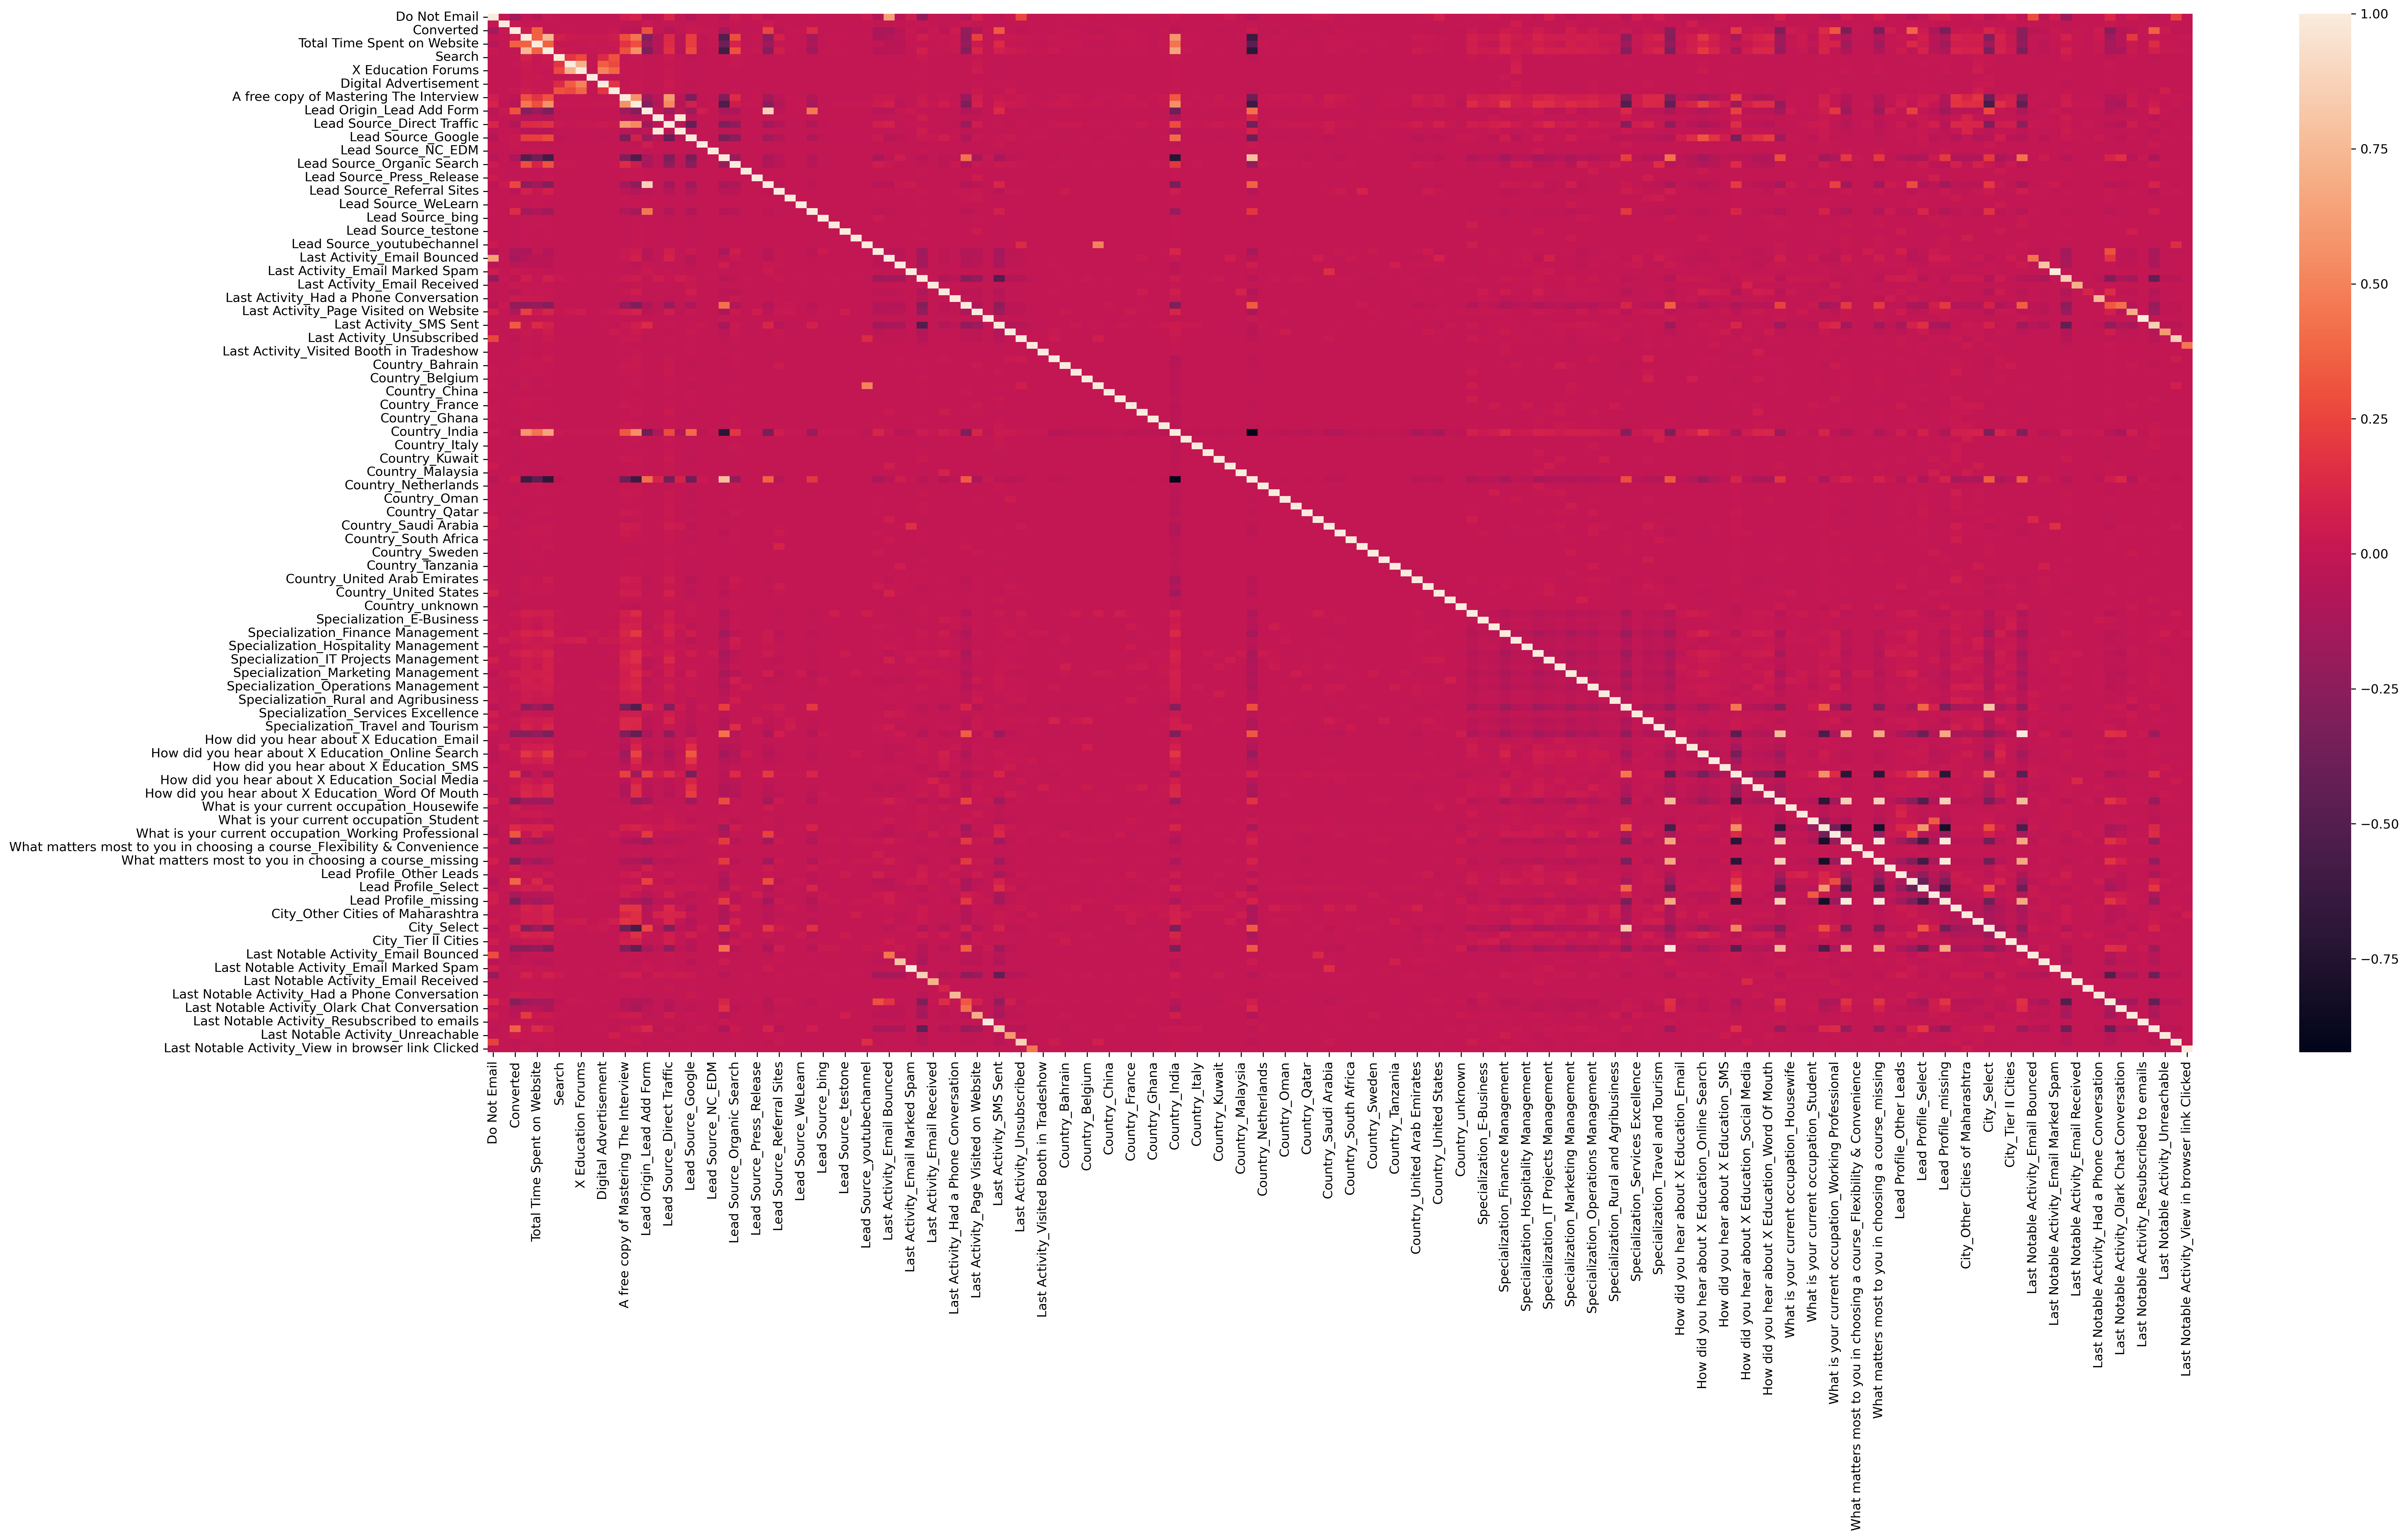

In [354]:
plt.figure(figsize=(30,15))
sns.heatmap(lead.corr())

In [355]:
lead.head()

Do Not Email  Do Not Call  Converted  TotalVisits  \
0             0            0          0          0.0   
1             0            0          0          5.0   
2             0            0          1          2.0   
3             0            0          0          1.0   
4             0            0          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  Search  \
0                            0                   0.0       0   
1                          674                   2.5       0   
2                         1532                   2.0       0   
3                          305                   1.0       0   
4                         1428                   1.0       0   

   Newspaper Article  X Education Forums  Newspaper  Digital Advertisement  \
0                  0                   0          0                      0   
1                  0                   0          0                      0   
2                  0                   0          0                      0   
3                  0                   0          0                      0   
4                  0                   0          0                      0   

   Through Recommendations  A free copy of Mastering The Interview  \
0                        0                                       0   
1                        0                                       0   
2                        0                                       1   
3                        0                                       0   
4                        0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_NC_EDM  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Social Media

#### 6.3 Test- Train Split:

In [356]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

In [357]:
x = lead.drop(["Converted"], axis = 1)
x.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
0             0            0          0.0                            0   
1             0            0          5.0                          674   
2             0            0          2.0                         1532   
3             0            0          1.0                          305   
4             0            0          2.0                         1428   

   Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
0                   0.0       0                  0                   0   
1                   2.5       0                  0                   0   
2                   2.0       0                  0                   0   
3                   1.0       0                  0                   0   
4                   1.0       0                  0                   0   

   Newspaper  Digital Advertisement  Through Recommendations  \
0          0                      0                        0   
1          0                      0                        0   
2          0                      0                        0   
3          0                      0                        0   
4          0                      0                        0   

   A free copy of Mastering The Interview  \
0                                       0   
1                                       0   
2                                       1   
3                                       0   
4                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  Lead Source_Direct Traffic  Lead Source_Facebook  \
0                        0                           0                     0   
1                        0                           0                     0   
2                        0                           1                     0   
3                        0                           1                     0   
4                        0                           0                     0   

   Lead Source_Google  Lead Source_Live Chat  Lead Source_NC_EDM  \
0                   0                      0                   0   
1                   0                      0                   0   
2                   0                      0                   0   
3                   0                      0                   0   
4                   1                      0                   0   

   Lead Source_Olark Chat  Lead Source_Organic Search  \
0                       1                           0   
1                       0                           1   
2                       0                           0   
3                       0                           0   
4                       0                           0   

   Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
0                              0                          0   
1                              0                          0   
2                              0                          0   
3                              0                          0   
4                              0                          0   

   Lead Source_Reference  Lead Source_Referral Sites  \
0                      0                           0   
1                      0                           0   
2                      0                           0   
3                      0                           0   
4                      0                           0   

   Lead Source_Social Media  Lead Source_WeLearn  \
0                         0              

In [358]:
y = lead["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [359]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7,random_state=100)

#### 6.4 Feature Scaling:

In [360]:
scaler = MinMaxScaler()
x_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(x_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])
x_train.head()

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
4854             0            0     0.454545                     0.186862   
1216             0            0     0.000000                     0.000000   
987              0            0     0.090909                     0.361740   
1479             0            0     0.545455                     0.416334   
110              0            0     0.545455                     0.397248   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
4854              0.416667       0                  0                   0   
1216              0.000000       0                  0                   0   
987               0.166667       0                  0                   0   
1479              1.000000       0                  0                   0   
110               1.000000       0                  0                   0   

      Newspaper  Digital Advertisement  Through Recommendations  \
4854          0                      0                        0   
1216          0                      0                        0   
987           0                      0                        0   
1479          0                      0                        0   
110           0                      0                        0   

      A free copy of Mastering The Interview  \
4854                                       1   
1216                                       0   
987                                        0   
1479                                       1   
110                                        1   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4854                                    1                          0   
1216                                    0                          0   
987                                     0                          0   
1479                                    1                          0   
110                                     1                          0   

      Lead Origin_Lead Import  Lead Source_Direct Traffic  \
4854                        0                           0   
1216                        0                           0   
987                         0                           0   
1479                        0                           0   
110                         0                           0   

      Lead Source_Facebook  Lead Source_Google  Lead Source_Live Chat  \
4854                     0                   1                      0   
1216                     0                   0                      0   
987                      0                   0                      0   
1479                     0                   1                      0   
110                      0                   0                      0   

      Lead Source_NC_EDM  Lead Source_Olark Chat  Lead Source_Organic Search  \
4854                   0                       0                           0   
1216                   0                       1                           0   
987                    0                       0                           0   
1479                   0                       0                           0   
110                    0                       0                           1   

      Lead Source_Pay per Click Ads  Lead Source_Press_Release  \
4854                              0                          0   
1216                              0                          0   
987                               0                          0   
1479                              0                          0   
110                               0                          0   

      Lead Source_Reference  Lead Source_Referral Sites  \
4854                      0                           0   
1216                      0                           0   
987                       0                           1   
1479                      0        

### 7. Model Building:

In [361]:
import statsmodels.api as sm

In [362]:
# first model:
log1 = sm.GLM(y_train, sm.add_constant(x_train),family=sm.families.Binomial())
log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6294
Model:                            GLM   Df Residuals:                     6152
Model Family:                Binomial   Df Model:                          141
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 12 Jun 2022   Deviance:                   1.2369e+05
Time:                        18:42:46   Pearson chi2:                 6.05e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    1.583e+16   1.08e+08   1.47e+08      0.000    1.58e+16    1.58e+16
Do Not Email                                                            -5.821e+14   4.54e+06  -1.28e+08      0.000   -5.82e+14   -5.82e+14
Do Not Call                                                              1.572e+15   6.77e+07   2.32e+07      0.000    1.57e+15    1.57e+15
TotalVisits                                                              2.034e+14   5.55e+06   3.66e+07      0.000    2.03e+14    2.03e+14
Total Time Spent on Website                                              5.434e+14   4.16e+06   1.31e+08      0.000    5.43e+14    5.43e+14
Page Views Per Visit                                                    -2.866e+13   5.29e+06  -5.42e+06      0.000   -2.87e+13   -2.87e+13
Search                                                                   -5.85e+12    2.3e+07  -2.54e+05      0.000   -5.85e+12   -5.85e+12
Newspaper Article                                                       -1.513e+15   4.36e+07  -3.47e+07      0.000   -1.51e+15   -1.51e+15
X Education Forums                                                      -1.513e+15   4.36e+07  -3.47e+07      0.000   -1.51e+15   -1.51e+15
Newspaper                                                               -6.694e+15   6.75e+07  -9.92e+07      0.000   -6.69e+15   -6.69e+15
Digital Advertisement                                                    7.645e+14   3.91e+07   1.95e+07      0.000    7.64e+14    7.64e+14
Through Recommendations                                                  4.777e+14   3.44e+07   1.39e+07      0.000    4.78e+14    4.78e+14
A free copy of Mastering The Interview                                   2.055e+13   3.55e+06   5.79e+06      0.000    2.05e+13    2.05e+13
Lead Origin_Landing Page Submission                                     -2.909e+14   4.32e+06  -6.74e+07      0.000   -2.91e+14   -2.91e+14
Lead Origin_Lead Add Form                                                5.324e+14   3.96e+07   1.34e+07      0.000    5.32e+14    5.32e+14
Lead Origin_Lead Import                                                  2.485e+15    7.2e+07   3.45e+07      0.000    2.49e+15    2.49e+15
Lead Source_Direct Traffic                                               3.218e+13   5.57e+07   5.78e+05      0.000    3.22e+13    3.22e+13
Lead Source_Facebook                                                    -4.099e+15   8.95e+07  -4.58e+07      0.000    -4.1e+15    -4.1e+15
Lead Source_Google                                                       1.727e+14   5.56e+07    3.1e+06      0.000    1.73e+14    1.73e+14
Lea

#### 7.1 Feature Selection using RFE:

In [363]:
logreg = LogisticRegression()
rfe = RFE(logreg,15)
rfe = rfe.fit(x_train,y_train)

In [364]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 55),
 ('TotalVisits', False, 7),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Search', False, 30),
 ('Newspaper Article', False, 112),
 ('X Education Forums', False, 108),
 ('Newspaper', False, 13),
 ('Digital Advertisement', False, 40),
 ('Through Recommendations', False, 72),
 ('A free copy of Mastering The Interview', False, 90),
 ('Lead Origin_Landing Page Submission', False, 26),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 81),
 ('Lead Source_Direct Traffic', False, 59),
 ('Lead Source_Facebook', False, 24),
 ('Lead Source_Google', False, 74),
 ('Lead Source_Live Chat', False, 71),
 ('Lead Source_NC_EDM', False, 28),
 ('Lead Source_Olark Chat', False, 105),
 ('Lead Source_Organic Search', False, 62),
 ('Lead Source_Pay per Click Ads', False, 132),
 ('Lead Source_Press_Release', False, 131),
 ('Lead Source_Reference', False, 61),
 ('Lead Source_Referral Sites',

In [365]:
features = x_train.columns[rfe.support_]

In [366]:
features

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Lead Profile_Lateral Student', 'Lead Profile_Potential Lead',
       'Lead Profile_Student of SomeSchool',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [367]:
x_train

Do Not Email  Do Not Call  TotalVisits  Total Time Spent on Website  \
4854             0            0     0.454545                     0.186862   
1216             0            0     0.000000                     0.000000   
987              0            0     0.090909                     0.361740   
1479             0            0     0.545455                     0.416334   
110              0            0     0.545455                     0.397248   
...            ...          ...          ...                          ...   
378              0            0     0.181818                     0.166889   
84               0            0     0.272727                     0.504217   
8274             0            0     0.363636                     0.005326   
7141             1            0     0.000000                     0.000000   
5805             0            0     0.000000                     0.000000   

      Page Views Per Visit  Search  Newspaper Article  X Education Forums  \
4854              0.416667       0                  0                   0   
1216              0.000000       0                  0                   0   
987               0.166667       0                  0                   0   
1479              1.000000       0                  0                   0   
110               1.000000       0                  0                   0   
...                    ...     ...                ...                 ...   
378               0.333333       0                  0                   0   
84                0.500000       0                  0                   0   
8274              0.333333       0                  0                   0   
7141              0.000000       0                  0                   0   
5805              0.000000       0                  0                   0   

      Newspaper  Digital Advertisement  Through Recommendations  \
4854          0                      0                        0   
1216          0                      0                        0   
987           0                      0                        0   
1479          0                      0                        0   
110           0                      0                        0   
...         ...                    ...                      ...   
378           0                      0                        0   
84            0                      0                        0   
8274          0                      0                        0   
7141          0                      0                        0   
5805          0                      0                        0   

      A free copy of Mastering The Interview  \
4854                                       1   
1216                                       0   
987                                        0   
1479                                       1   
110                                        1   
...                                      ...   
378                                        0   
84                                         0   
8274                                       0   
7141                                       0   
5805                                       0   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4854                                    1                          0   
1216                                    0                          0   
987                                     0                          0   
1479                                    1                          0   
110                                     1                          0   
...                                   ...                        ...   
378                                     0                          0   
84                                      1                          0   
8274                                    1                          0   
7141                                    0             

In [368]:
x_train[features]

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4854             0                     0.186862                          0   
1216             0                     0.000000                          0   
987              0                     0.361740                          0   
1479             0                     0.416334                          0   
110              0                     0.397248                          0   
...            ...                          ...                        ...   
378              0                     0.166889                          0   
84               0                     0.504217                          0   
8274             0                     0.005326                          0   
7141             1                     0.000000                          0   
5805             0                     0.000000                          1   

      Lead Source_Welingak Website  Last Activity_Had a Phone Conversation  \
4854                             0                                       0   
1216                             0                                       0   
987                              0                                       0   
1479                             0                                       0   
110                              0                                       0   
...                            ...                                     ...   
378                              0                                       0   
84                               0                                       0   
8274                             0                                       0   
7141                             0                                       0   
5805                             0                                       0   

      What is your current occupation_Housewife  \
4854                                          0   
1216                                          0   
987                                           0   
1479                                          0   
110                                           0   
...                                         ...   
378                                           0   
84                                            0   
8274                                          0   
7141                                          0   
5805                                          0   

      What is your current occupation_Working Professional  \
4854                                                  0      
1216                                                  0      
987                                                   0      
1479                                                  0      
110                                                   0      
...                                                 ...      
378                                                   0      
84                                                    0      
8274                                                  0      
7141                                                  0      
5805                                                  1      

      Lead Profile_Lateral Student  Lead Profile_Potential Lead  \
4854                             0                            0   
1216                             0                            0   
987                              0                            0   
1479                             0                            1   
110                              0                            0   
...                            ...                          ...   
378                              0                            0   
84                               0                            0   
8274                             0                            0   
7141                             0                            0   
5805                             0   

In [369]:
# 2nd model:
x_train_sm = sm.add_constant(x_train[features])
log2 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
log_2 = log2.fit()
log_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6294
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2503.7
Date:                Sun, 12 Jun 2022   Deviance:                       5007.4
Time:                        18:43:08   Pearson chi2:                 6.51e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6665      0.077     -8.677      0.000      -0.817      -0.516
Do Not Email                                            -1.7255      0.183     -9.440      0.000      -2.084      -1.367
Total Time Spent on Website                              3.8176      0.149     25.584      0.000       3.525       4.110
Lead Origin_Lead Add Form                                3.0896      0.235     13.160      0.000       2.629       3.550
Lead Source_Welingak Website                             3.4217      1.046      3.273      0.001       1.373       5.471
Last Activity_Had a Phone Conversation                   2.4478      0.998      2.453      0.014       0.492       4.404
What is your current occupation_Housewife               23.6402   2.93e+04      0.001      0.999   -5.74e+04    5.74e+04
What is your current occupation_Working Professional     2.3874      0.192     12.442      0.000       2.011       2.763
Lead Profile_Lateral Student                            23.4974   2.05e+04      0.001      0.999   -4.01e+04    4.02e+04
Lead Profile_Potential Lead                              1.7397      0.099     17.612      0.000       1.546       1.933
Lead Profile_Student of SomeSchool                      -2.4646      0.555     -4.437      0.000      -3.553      -1.376
Last Notable Activity_Email Link Clicked                -1.6415      0.270     -6.073      0.000      -2.171      -1.112
Last Notable Activity_Email Opened                      -1.4624      0.091    -16.078      0.000      -1.641      -1.284
Last Notable Activity_Modified                          -2.0453      0.095    -21.584      0.000      -2.231      -1.860
Last Notable Activity_Olark Chat Conversation           -2.4379      0.349     -6.995      0.000      -3.121      -1.755
Last Notable Activity_Page Visited on Website           -1.5784      0.197     -8.004      0.000      -1.965      -1.192
========================================================================================================================
"""

In [370]:
features = features.drop("What is your current occupation_Housewife")

In [371]:
#3rd model:
x_train_sm = sm.add_constant(x_train[features])
log3 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
log_3 = log3.fit()
log_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6294
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2507.9
Date:                Sun, 12 Jun 2022   Deviance:                       5015.7
Time:                        18:43:08   Pearson chi2:                 6.52e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6679      0.077     -8.695      0.000      -0.818      -0.517
Do Not Email                                            -1.7279      0.183     -9.452      0.000      -2.086      -1.370
Total Time Spent on Website                              3.8237      0.149     25.635      0.000       3.531       4.116
Lead Origin_Lead Add Form                                3.1071      0.234     13.258      0.000       2.648       3.566
Lead Source_Welingak Website                             3.4023      1.045      3.254      0.001       1.353       5.451
Last Activity_Had a Phone Conversation                   2.4443      0.998      2.449      0.014       0.488       4.400
What is your current occupation_Working Professional     2.3837      0.192     12.422      0.000       2.008       2.760
Lead Profile_Lateral Student                            22.4910   1.24e+04      0.002      0.999   -2.43e+04    2.44e+04
Lead Profile_Potential Lead                              1.7399      0.099     17.626      0.000       1.546       1.933
Lead Profile_Student of SomeSchool                      -2.4698      0.556     -4.444      0.000      -3.559      -1.381
Last Notable Activity_Email Link Clicked                -1.6421      0.270     -6.071      0.000      -2.172      -1.112
Last Notable Activity_Email Opened                      -1.4583      0.091    -16.041      0.000      -1.636      -1.280
Last Notable Activity_Modified                          -2.0401      0.095    -21.545      0.000      -2.226      -1.854
Last Notable Activity_Olark Chat Conversation           -2.4382      0.349     -6.993      0.000      -3.122      -1.755
Last Notable Activity_Page Visited on Website           -1.5787      0.197     -8.003      0.000      -1.965      -1.192
========================================================================================================================
"""

In [372]:
features = features.drop("Lead Profile_Lateral Student")

In [373]:
#4th model:
x_train_sm = sm.add_constant(x_train[features])
log4 = sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
log_4 = log4.fit()
log_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6294
Model:                            GLM   Df Residuals:                     6280
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.5
Date:                Sun, 12 Jun 2022   Deviance:                       5029.0
Time:                        18:43:08   Pearson chi2:                 6.54e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.6684      0.077     -8.703      0.000      -0.819      -0.518
Do Not Email                                            -1.7302      0.183     -9.460      0.000      -2.089      -1.372
Total Time Spent on Website                              3.8268      0.149     25.688      0.000       3.535       4.119
Lead Origin_Lead Add Form                                3.1449      0.234     13.450      0.000       2.687       3.603
Lead Source_Welingak Website                             3.3841      1.045      3.239      0.001       1.336       5.432
Last Activity_Had a Phone Conversation                   2.4935      0.986      2.529      0.011       0.561       4.426
What is your current occupation_Working Professional     2.3844      0.192     12.440      0.000       2.009       2.760
Lead Profile_Potential Lead                              1.7324      0.099     17.553      0.000       1.539       1.926
Lead Profile_Student of SomeSchool                      -2.4804      0.557     -4.456      0.000      -3.571      -1.389
Last Notable Activity_Email Link Clicked                -1.6428      0.271     -6.070      0.000      -2.173      -1.112
Last Notable Activity_Email Opened                      -1.4463      0.091    -15.936      0.000      -1.624      -1.268
Last Notable Activity_Modified                          -2.0373      0.095    -21.526      0.000      -2.223      -1.852
Last Notable Activity_Olark Chat Conversation           -2.4379      0.349     -6.990      0.000      -3.121      -1.754
Last Notable Activity_Page Visited on Website           -1.5777      0.197     -7.999      0.000      -1.964      -1.191
========================================================================================================================
"""

In [374]:
# Predicted values:
y_train_pred = log_4.predict(x_train_sm)

In [375]:
y_train_pred

4854    0.197869
1216    0.062636
987     0.210579
1479    0.770447
110     0.355587
          ...   
378     0.186017
84      0.315136
8274    0.063843
7141    0.007872
5805    0.998632
Length: 6294, dtype: float64

In [376]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.19786909, 0.06263588, 0.21057867, 0.77044717, 0.35558736,
       0.01625459, 0.10986305, 0.13511454, 0.4874617 , 0.09648175])

In [377]:
# DataFrame Creation with probabilities:
y_train_pred_final = pd.DataFrame({"Converted": y_train.values, "Conv_prob":y_train_pred})
y_train_pred_final["ID"] = y_train.index
y_train_pred_final.head()

Converted  Conv_prob    ID
0          0   0.197869  4854
1          0   0.062636  1216
2          0   0.210579   987
3          1   0.770447  1479
4          1   0.355587   110

In [378]:
# Creating new Column Predicted with 0.5 cutoff:
y_train_pred_final["Predicted"] = y_train_pred_final["Conv_prob"].map(lambda x: 1 if x >0.5 else 0)

y_train_pred_final.head()

Converted  Conv_prob    ID  Predicted
0          0   0.197869  4854          0
1          0   0.062636  1216          0
2          0   0.210579   987          0
3          1   0.770447  1479          1
4          1   0.355587   110          0

#### 6.2 Confusion Matrix:

In [379]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print(confusion)

[[3535  392]
 [ 770 1597]]


In [380]:
# predicted       not converted         converted
# Actual
#not converted      3535                  392
#converted           770                  1597

In [381]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.815379726723864


#### 6.3 VIF check:

In [382]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [383]:
# VIF values of Features:
vif = pd.DataFrame()
vif["Features"] = x_train[features].columns
vif["VIF"] = [variance_inflation_factor(x_train[features].values,i) for i in range(x_train[features].shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending=False)
vif

Features   VIF
1                         Total Time Spent on Website  1.55
2                           Lead Origin_Lead Add Form  1.54
6                         Lead Profile_Potential Lead  1.39
3                        Lead Source_Welingak Website  1.33
9                  Last Notable Activity_Email Opened  1.26
10                     Last Notable Activity_Modified  1.26
5   What is your current occupation_Working Profes...  1.22
0                                        Do Not Email  1.10
7                  Lead Profile_Student of SomeSchool  1.05
12      Last Notable Activity_Page Visited on Website  1.04
4              Last Activity_Had a Phone Conversation  1.01
8            Last Notable Activity_Email Link Clicked  1.01
11      Last Notable Activity_Olark Chat Conversation  1.01

### 8. Model Evaluation:

#### 8.1 Accuracy:

In [384]:
# Accuracy :
print(metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.Predicted))

0.815379726723864


#### 8.2 Specificity:

In [385]:
confusion

array([[3535,  392],
       [ 770, 1597]], dtype=int64)

In [386]:
# Specificity:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [387]:
specificity  = TN/float(TN+FP)
print("Specificity is", specificity)

Specificity is 0.9001782531194296


In [388]:
y_train_pred_final

Converted  Conv_prob    ID  Predicted
0             0   0.197869  4854          0
1             0   0.062636  1216          0
2             0   0.210579   987          0
3             1   0.770447  1479          1
4             1   0.355587   110          0
...         ...        ...   ...        ...
6289          0   0.186017   378          0
6290          1   0.315136    84          0
6291          0   0.063843  8274          0
6292          0   0.007872  7141          0
6293          1   0.998632  5805          1

[6294 rows x 4 columns]

#### 8.3 Sensitivity:

In [389]:
#sensititvity:
sensitivity = TP/float(TP+FN)
# True Positive rate:
TPR = sensitivity
print("Sensititvity is", sensitivity)

Sensititvity is 0.674693705111956


#### 8.4 False Positive rate:

In [390]:
FPR = FP/float(TN+FP)
print("False Positive rate is", FPR)

False Positive rate is 0.09982174688057041


#### 8.6 Positive Predicted Value:

In [391]:
PPV = TP / float(TP+FP)
print("Positive predicted value is", PPV)

Positive predicted value is 0.8029160382101559


#### 8.7 Negative Predicted Value:

In [392]:
NPV = TN/float(TN+FN)
print("Negative Predicted value is", NPV)

Negative Predicted value is 0.8211382113821138


#### 8.8 Plotting ROC curve:

In [393]:
def roc(actual, probability):
    FPR,TPR, thresholds = metrics.roc_curve(actual,probability,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probability)
    plt.figure(figsize=(3,3))
    plt.plot(FPR,TPR,label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

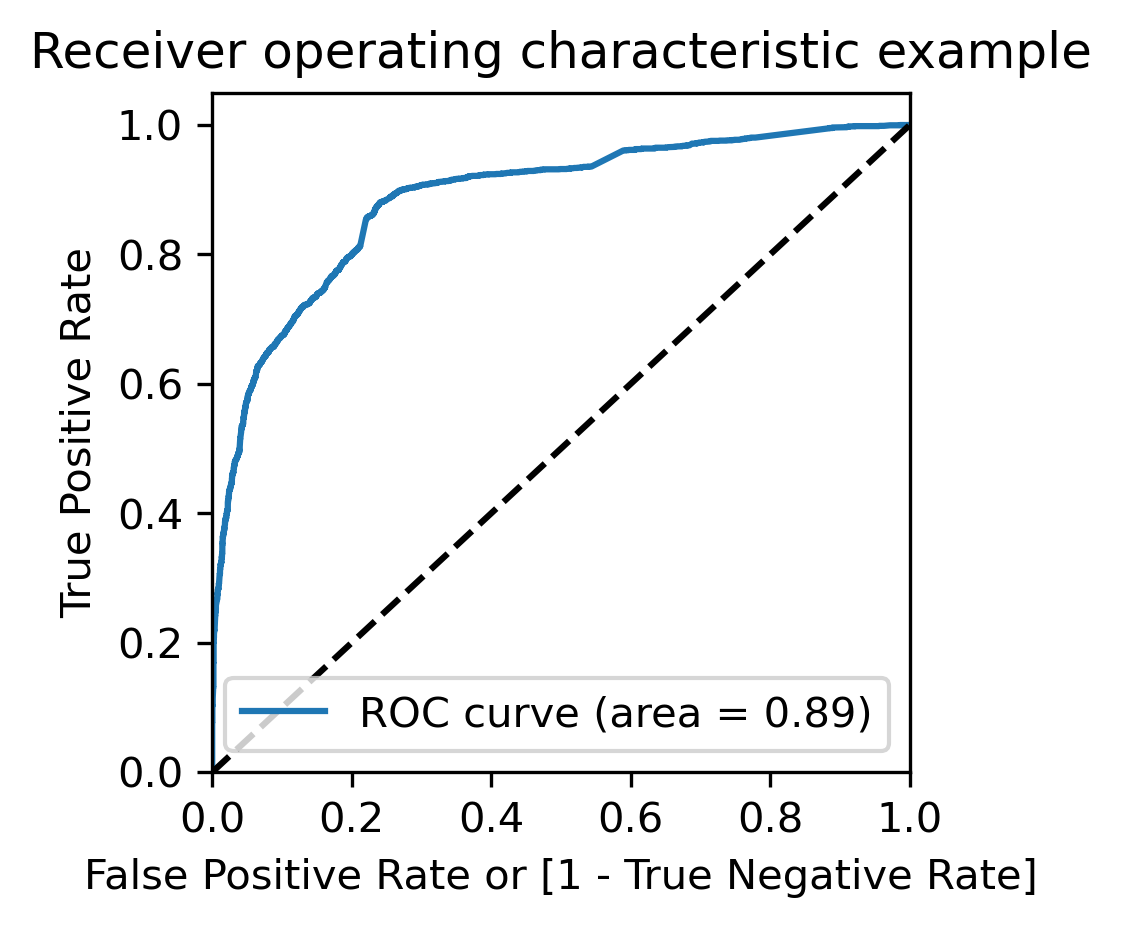

In [394]:
roc(y_train_pred_final.Converted,y_train_pred_final.Conv_prob)

It is found that area under the curve (AUC) is 0.89

#### 8.9 Optimal Cutoff:

In [395]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Conv_prob.map(lambda x: 1 if x>i else 0)
y_train_pred_final.head()

Converted  Conv_prob    ID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0   0.197869  4854          0    1    1    0    0    0    0    0   
1          0   0.062636  1216          0    1    0    0    0    0    0    0   
2          0   0.210579   987          0    1    1    1    0    0    0    0   
3          1   0.770447  1479          1    1    1    1    1    1    1    1   
4          1   0.355587   110          0    1    1    1    1    0    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    0    0    0  
2    0    0    0  
3    1    0    0  
4    0    0    0

In [396]:
df_cutoff = pd.DataFrame(columns=["Probability", "Accuracy", "Sensititvity","Specificity"])

numb = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numb:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    accuracy = (cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1])
    sensitivity = cm[1,1]/(cm[1,1]+cm[1,0])
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    df_cutoff.loc[i] = [i,accuracy,sensitivity,specificity]
print(df_cutoff)

     Probability  Accuracy  Sensititvity  Specificity
0.0          0.0  0.376072      1.000000     0.000000
0.1          0.1  0.603114      0.962822     0.386300
0.2          0.2  0.782491      0.904520     0.708938
0.3          0.3  0.805370      0.871990     0.765215
0.4          0.4  0.805052      0.760879     0.831678
0.5          0.5  0.815380      0.674694     0.900178
0.6          0.6  0.817604      0.621884     0.935574
0.7          0.7  0.803305      0.553021     0.954163
0.8          0.8  0.772641      0.438952     0.973771
0.9          0.9  0.726406      0.288128     0.990578


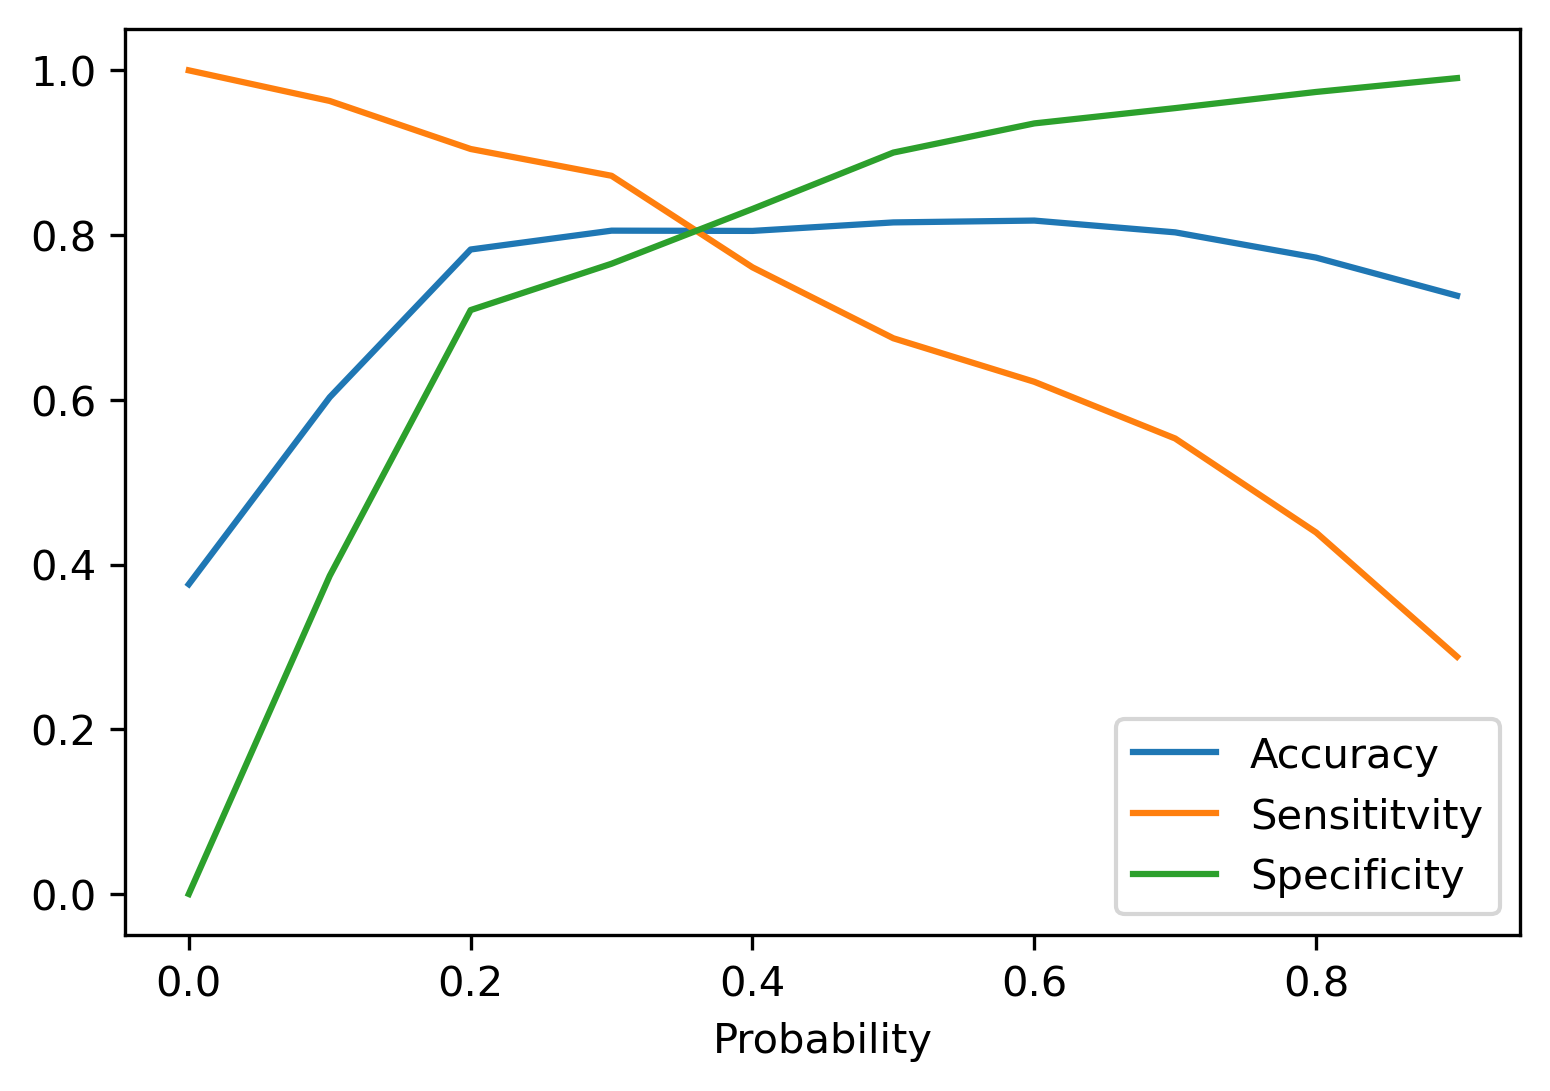

In [397]:
df_cutoff.plot.line(x = "Probability", y=["Accuracy", "Sensititvity","Specificity"])
plt.show()

<p style="color:blue"><b>Insights:</b>1.

From Curve 0.4 is taken as cutoff

In [398]:
y_train_pred_final["Final Prediction"] = y_train_pred_final.Conv_prob.map(lambda x: 1 if x>0.4 else 0)
y_train_pred_final.head()

Converted  Conv_prob    ID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0   0.197869  4854          0    1    1    0    0    0    0    0   
1          0   0.062636  1216          0    1    0    0    0    0    0    0   
2          0   0.210579   987          0    1    1    1    0    0    0    0   
3          1   0.770447  1479          1    1    1    1    1    1    1    1   
4          1   0.355587   110          0    1    1    1    1    0    0    0   

   0.7  0.8  0.9  Final Prediction  
0    0    0    0                 0  
1    0    0    0                 0  
2    0    0    0                 0  
3    1    0    0                 1  
4    0    0    0                 0

In [399]:
#Accuracy:
metrics.accuracy_score(y_train_pred_final["Converted"],y_train_pred_final["Final Prediction"])

0.8050524308865586

In [400]:
confusion_2 = metrics.confusion_matrix(y_train_pred_final["Converted"],y_train_pred_final["Final Prediction"])

In [401]:
print(confusion_2)

[[3266  661]
 [ 566 1801]]


In [402]:
#sensititvity:
sensi = confusion_2[1,1]/(confusion_2[1,1]+confusion_2[1,0])
print(sensi)

0.7608787494719054


In [403]:
#specificity:
speci = confusion_2[0,0]/(confusion_2[0,0]+confusion_2[0,1])
print(speci)

0.8316781257957728


In [404]:
# false positive rate:
FPR = confusion_2[0,1]/(confusion_2[0,1]+confusion_2[0,0])
print(FPR)

0.16832187420422715


In [405]:
#Positive predicted rate:
PPR = confusion_2[1,1]/(confusion_2[1,1]+confusion_2[0,1])
print(PPR)

0.731519090170593


In [406]:
#Negative Predicte rate:
NPR = confusion_2[0,0]/(confusion_2[0,0]+confusion_2[1,0])
print(NPR)

0.8522964509394572


In [407]:
def roc(actual, probability):
    FPR,TPR, thresholds = metrics.roc_curve(actual,probability,drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probability)
    plt.figure(figsize=(3,3))
    plt.plot(FPR,TPR,label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return None

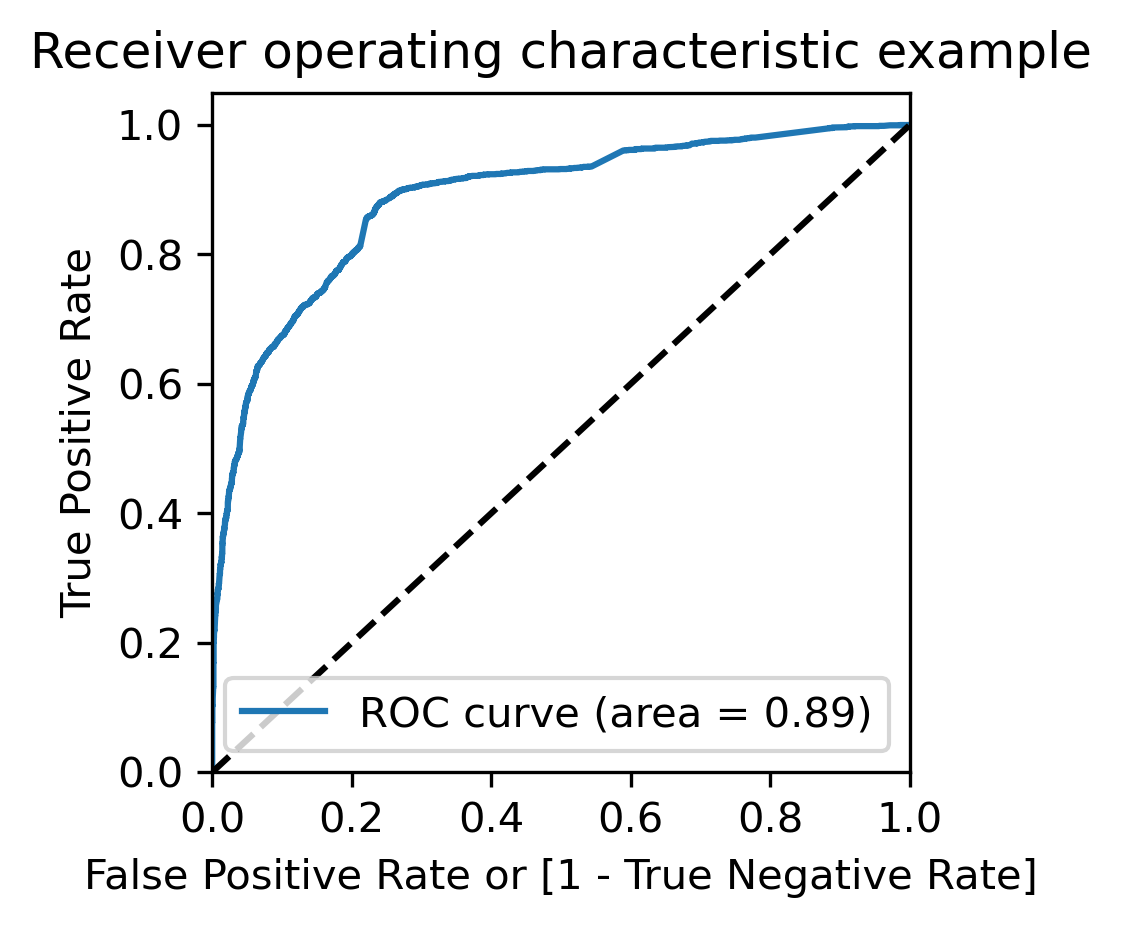

In [408]:
roc(y_train_pred_final.Converted,y_train_pred_final.Conv_prob)

#### 9. Precision and Recall:

In [409]:
#Precision:
Precision = confusion_2[1,1]/(confusion_2[1,1]+confusion_2[0,1])
print(Precision)

0.731519090170593


In [410]:
#Recall:
Recall = confusion_2[1,1]/(confusion_2[1,1]+confusion_2[1,0])
print(Recall)

0.7608787494719054


#### 9.1 Precision and Recall Tradeoff:

In [411]:
from sklearn.metrics import precision_recall_curve

In [412]:
y_train_pred_final.head()

Converted  Conv_prob    ID  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0   0.197869  4854          0    1    1    0    0    0    0    0   
1          0   0.062636  1216          0    1    0    0    0    0    0    0   
2          0   0.210579   987          0    1    1    1    0    0    0    0   
3          1   0.770447  1479          1    1    1    1    1    1    1    1   
4          1   0.355587   110          0    1    1    1    1    0    0    0   

   0.7  0.8  0.9  Final Prediction  
0    0    0    0                 0  
1    0    0    0                 0  
2    0    0    0                 0  
3    1    0    0                 1  
4    0    0    0                 0

In [413]:
P,R,thresholds = precision_recall_curve(y_train_pred_final["Converted"], y_train_pred_final["Conv_prob"])

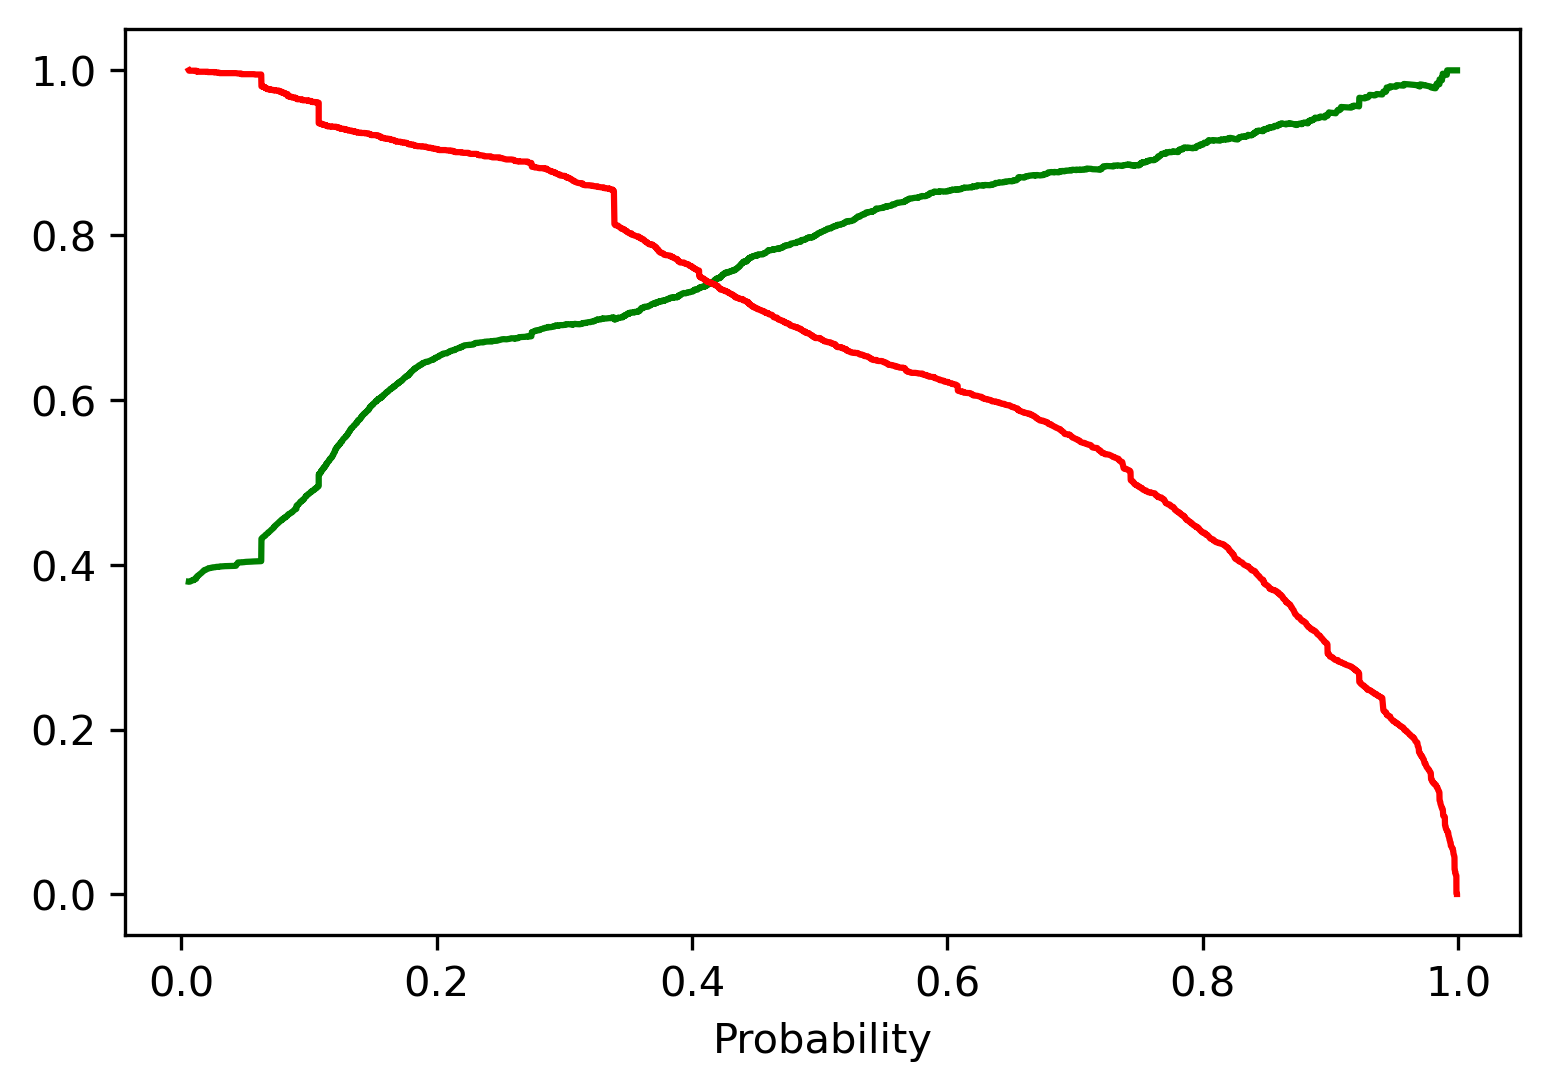

In [414]:
plt.plot(thresholds, P[:-1], "g-")
plt.plot(thresholds, R[:-1], "r-")
plt.xlabel("Probability")
plt.show()

### 10. Predictions on Test Data:

In [415]:
x_test[features]

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4949             0                         1295                          0   
5838             0                          485                          0   
2521             0                          837                          0   
1051             0                         1394                          0   
1924             0                           41                          0   
...            ...                          ...                        ...   
6245             0                            0                          0   
7769             0                         1148                          0   
5803             0                            0                          1   
903              0                           12                          0   
7670             0                          343                          0   

      Lead Source_Welingak Website  Last Activity_Had a Phone Conversation  \
4949                             0                                       0   
5838                             0                                       0   
2521                             0                                       0   
1051                             0                                       0   
1924                             0                                       0   
...                            ...                                     ...   
6245                             0                                       0   
7769                             0                                       0   
5803                             0                                       0   
903                              0                                       0   
7670                             0                                       0   

      What is your current occupation_Working Professional  \
4949                                                  0      
5838                                                  0      
2521                                                  0      
1051                                                  0      
1924                                                  0      
...                                                 ...      
6245                                                  0      
7769                                                  0      
5803                                                  1      
903                                                   0      
7670                                                  0      

      Lead Profile_Potential Lead  Lead Profile_Student of SomeSchool  \
4949                            0                                   0   
5838                            0                                   1   
2521                            1                                   0   
1051                            1                                   0   
1924                            0                                   0   
...                           ...                                 ...   
6245                            0                                   0   
7769                            0                                   0   
5803                            1                                   0   
903                             0                                   0   
7670                            0                                   1   

      Last Notable Activity_Email Link Clicked  \
4949                                         0   
5838                                         0   
2521                                         0   
1051                                         0   
1924                                         0   
...                                        ...   
6245                                         1   
7769                                         0   
5803                                         0   
903       

In [416]:
x_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(x_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [417]:
x_test[features]

Do Not Email  Total Time Spent on Website  Lead Origin_Lead Add Form  \
4949             0                     0.574789                          0   
5838             0                     0.215269                          0   
2521             0                     0.371505                          0   
1051             0                     0.618731                          0   
1924             0                     0.018198                          0   
...            ...                          ...                        ...   
6245             0                     0.000000                          0   
7769             0                     0.509543                          0   
5803             0                     0.000000                          1   
903              0                     0.005326                          0   
7670             0                     0.152241                          0   

      Lead Source_Welingak Website  Last Activity_Had a Phone Conversation  \
4949                             0                                       0   
5838                             0                                       0   
2521                             0                                       0   
1051                             0                                       0   
1924                             0                                       0   
...                            ...                                     ...   
6245                             0                                       0   
7769                             0                                       0   
5803                             0                                       0   
903                              0                                       0   
7670                             0                                       0   

      What is your current occupation_Working Professional  \
4949                                                  0      
5838                                                  0      
2521                                                  0      
1051                                                  0      
1924                                                  0      
...                                                 ...      
6245                                                  0      
7769                                                  0      
5803                                                  1      
903                                                   0      
7670                                                  0      

      Lead Profile_Potential Lead  Lead Profile_Student of SomeSchool  \
4949                            0                                   0   
5838                            0                                   1   
2521                            1                                   0   
1051                            1                                   0   
1924                            0                                   0   
...                           ...                                 ...   
6245                            0                                   0   
7769                            0                                   0   
5803                            1                                   0   
903                             0                                   0   
7670                            0                                   1   

      Last Notable Activity_Email Link Clicked  \
4949                                         0   
5838                                         0   
2521                                         0   
1051                                         0   
1924                                         0   
...                                        ...   
6245                                         1   
7769                                         0   
5803                                         0   
903       

In [418]:
x_test_sm = sm.add_constant(x_test[features])

In [419]:
x_test_sm

const  Do Not Email  Total Time Spent on Website  \
4949    1.0             0                     0.574789   
5838    1.0             0                     0.215269   
2521    1.0             0                     0.371505   
1051    1.0             0                     0.618731   
1924    1.0             0                     0.018198   
...     ...           ...                          ...   
6245    1.0             0                     0.000000   
7769    1.0             0                     0.509543   
5803    1.0             0                     0.000000   
903     1.0             0                     0.005326   
7670    1.0             0                     0.152241   

      Lead Origin_Lead Add Form  Lead Source_Welingak Website  \
4949                          0                             0   
5838                          0                             0   
2521                          0                             0   
1051                          0                             0   
1924                          0                             0   
...                         ...                           ...   
6245                          0                             0   
7769                          0                             0   
5803                          1                             0   
903                           0                             0   
7670                          0                             0   

      Last Activity_Had a Phone Conversation  \
4949                                       0   
5838                                       0   
2521                                       0   
1051                                       0   
1924                                       0   
...                                      ...   
6245                                       0   
7769                                       0   
5803                                       0   
903                                        0   
7670                                       0   

      What is your current occupation_Working Professional  \
4949                                                  0      
5838                                                  0      
2521                                                  0      
1051                                                  0      
1924                                                  0      
...                                                 ...      
6245                                                  0      
7769                                                  0      
5803                                                  1      
903                                                   0      
7670                                                  0      

      Lead Profile_Potential Lead  Lead Profile_Student of SomeSchool  \
4949                            0                                   0   
5838                            0                                   1   
2521                            1                                   0   
1051                            1                                   0   
1924                            0                                   0   
...                           ...                                 ...   
6245                            0                                   0   
7769                            0                                   0   
5803                            1                                   0   
903                             0                                   0   
7670                            0                                   1   

      Last Notable Activity_Email Link Clicked  \
4949                                         0   
5838                                         0   
2521                                         0   
1051                                         0   
1924                                         0   
...                          

In [420]:
y_test_pred = log_4.predict(x_test_sm)

In [421]:
y_test_pred

4949    0.822176
5838    0.012588
2521    0.738713
1051    0.879252
1924    0.114548
          ...   
6245    0.090196
7769    0.458882
5803    0.998632
903     0.063843
7670    0.017766
Length: 2698, dtype: float64

In [422]:
y_test_pred = pd.DataFrame(y_test_pred)

In [423]:
y_test_pred.head()

0
4949  0.822176
5838  0.012588
2521  0.738713
1051  0.879252
1924  0.114548

In [424]:
y_test_df = pd.DataFrame(y_test)

In [425]:
y_test_df.head()

Converted
4949          1
5838          0
2521          1
1051          1
1924          0

In [426]:
y_pred_final = pd.concat([y_test_df,y_test_pred],axis=1)

In [427]:
y_pred_final

Converted         0
4949          1  0.822176
5838          0  0.012588
2521          1  0.738713
1051          1  0.879252
1924          0  0.114548
...         ...       ...
6245          0  0.090196
7769          1  0.458882
5803          1  0.998632
903           0  0.063843
7670          0  0.017766

[2698 rows x 2 columns]

In [428]:
y_pred_final= y_pred_final.rename(columns = {0:"Probability"})

In [429]:
y_pred_final

Converted  Probability
4949          1     0.822176
5838          0     0.012588
2521          1     0.738713
1051          1     0.879252
1924          0     0.114548
...         ...          ...
6245          0     0.090196
7769          1     0.458882
5803          1     0.998632
903           0     0.063843
7670          0     0.017766

[2698 rows x 2 columns]

In [430]:
y_pred_final["Final Predicted"] = y_pred_final.Probability.map(lambda x: 1 if x>0.4 else 0)

In [431]:
y_pred_final.head()

Converted  Probability  Final Predicted
4949          1     0.822176                1
5838          0     0.012588                0
2521          1     0.738713                1
1051          1     0.879252                1
1924          0     0.114548                0

In [432]:
y_pred_final["Lead Score"] = y_pred_final["Probability"]*100

In [433]:
y_pred_final

Converted  Probability  Final Predicted  Lead Score
4949          1     0.822176                1   82.217555
5838          0     0.012588                0    1.258801
2521          1     0.738713                1   73.871251
1051          1     0.879252                1   87.925164
1924          0     0.114548                0   11.454811
...         ...          ...              ...         ...
6245          0     0.090196                0    9.019554
7769          1     0.458882                1   45.888229
5803          1     0.998632                1   99.863222
903           0     0.063843                0    6.384329
7670          0     0.017766                0    1.776603

[2698 rows x 4 columns]

In [434]:
y_pred_final.sort_values(by = "Lead Score", ascending=False)

Converted  Probability  Final Predicted  Lead Score
7219          1     0.999604                1   99.960421
7187          1     0.998819                1   99.881886
161           1     0.998695                1   99.869505
4782          1     0.998632                1   99.863222
8060          1     0.998632                1   99.863222
...         ...          ...              ...         ...
4950          0     0.001567                0    0.156748
8678          0     0.001436                0    0.143620
1212          0     0.001360                0    0.136033
5643          0     0.001097                0    0.109667
7890          0     0.001039                0    0.103871

[2698 rows x 4 columns]

In [435]:
#Accuracy:
metrics.accuracy_score(y_pred_final["Converted"],y_pred_final["Final Predicted"])

0.8072646404744255

In [436]:
#Confusion Matrix:
confusion_matrix = metrics.confusion_matrix(y_pred_final["Converted"], y_pred_final["Final Predicted"])

In [437]:
confusion_matrix

array([[1398,  266],
       [ 254,  780]], dtype=int64)

In [438]:
TN = confusion_matrix[0,0]
FP = confusion_matrix[0,1]
FN = confusion_matrix[1,0]
TP = confusion_matrix[1,1]

In [439]:
# sensitivity or True Posititve rate:
Sensitivity = TP/(TP+FN)
Sensitivity

0.7543520309477756

In [440]:
#SPecificity:
Specificity = TN/(TN+FP)
Specificity

0.8401442307692307

### Summary:



	Exploratory Data Analysis:

##### It is Observed that the Lead Source graph "Google", “direct traffic”, “Organic search”, and “olark chat” have higher Counts. It is observed that most of the customer is from INDIA. Major conversion in the lead source from google.
 
##### Most of the customers are unemployed, choose courses for “Better Career Prospects” and they are from "Mumbai".
 
##### The total conversion rate of customers is 37.82%
 
##### Leading Page Submission from Lead Origin are Having More Total Time Spent on Website, Total Visits and Page Views Per Visit compared to other Category Levels and Customers who took the Course spent more time on the website.

	Model Building and Evaluation:

##### Final Model with 13 Features. Features like Total time spent on the website, Lead source_welingal Website and Lead origin_lead Add form are positively related to the response variable. Features like Do not Email, Lead_profile Student of some school, Last Notable Activiti_Olark Chat Conversation, etc. are Negatively Correlated to Response Variable.
 
##### It is Observed that Sensitivity and Specificity intersected at a probability of 0.4 and Precision and Recall also tell that a probability of 0.4 is the Optimal cut-off for the model.
 
##### The area under the Curve (AUC) is 0.89 which is Obtained from Receiver Operating Characteristic Curve.
